<a href="https://colab.research.google.com/github/FranciscoMoralesActuary/Seguros-de-Auto/blob/main/seminario_curricular_pruebas_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Código elaborado por Morales Ramírez Ángel Franciso [LinkedIn](https://www.linkedin.com/in/francisco-morales-actuario/)**
---

 Fuente de los datos [Aseguradora de autos](https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification?select=sample_submission.csv)

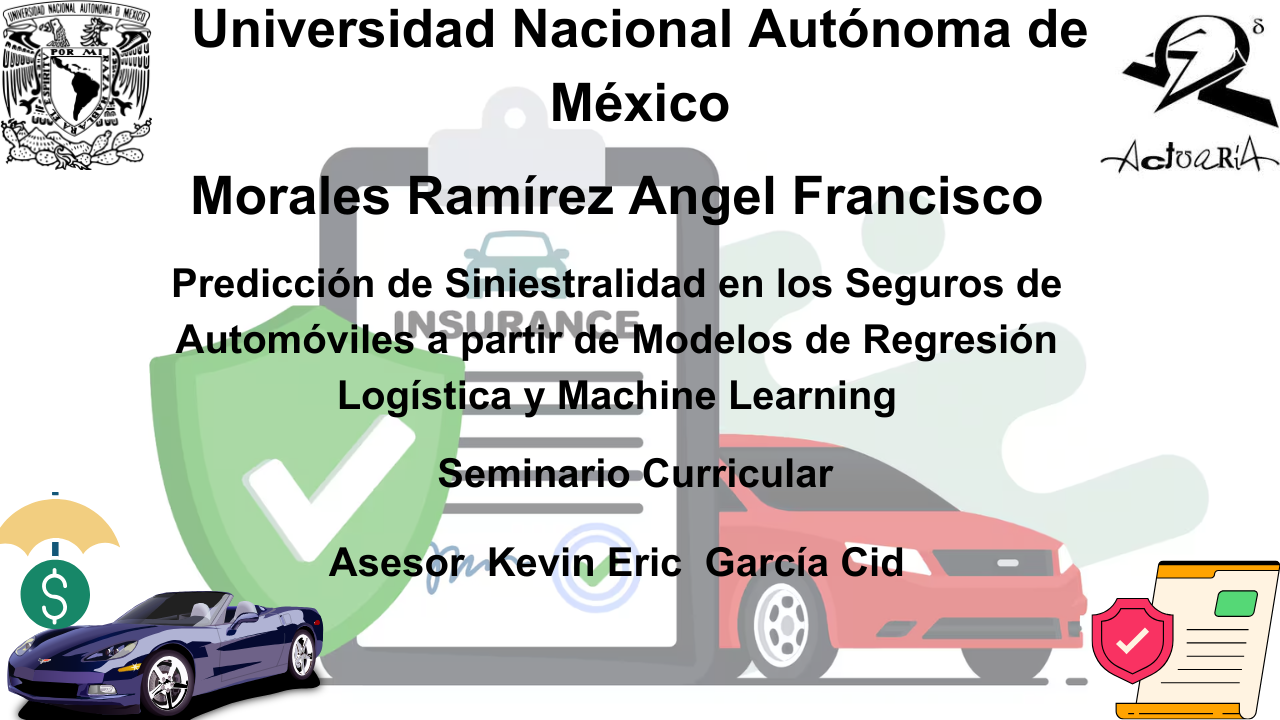

---
# **Predicción de siniestralidad en los seguros de autos usando un modelo de regresión logística** 🏎️
---

---
# **Importación de librerías**🐍
---

In [ ]:
#Imporar libreria pandas
#Trabajar los datos con dataframes
import pandas as pd
#Importar libreria numpy
#Cálculos matemáticos
import numpy as np
#Importar libreria seaborn
#Gráficos
import seaborn as sns
#Importar libreria matplotlib
#Gráficos
import matplotlib.pyplot as plt
#Texto en los gráficos
from matplotlib.font_manager import FontProperties
#Importar libreria statsmodels
#Regresión logística
import statsmodels.api as sm
#Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
#Modelo de regresión logística
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import (confusion_matrix, accuracy_score)
#Escalamiento de datos
from sklearn.preprocessing import StandardScaler
#Calcular curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#VIF para multicolinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Oversampling
from imblearn.over_sampling import SMOTE
#Bosques aleatorios
from sklearn.ensemble import RandomForestClassifier


---
# **Importación de datos**📋
---

In [ ]:
#Dirrección del repositorio con los datos
url_datos=('https://raw.githubusercontent.com/FranciscoMoralesActuary/Seguros-de-Auto/main/datos-aseguradora.xlsx')
#Leer el archico con la funcion de Pandas pd.read
df = pd.read_excel(url_datos)

In [ ]:
# Configuración de Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

#Mostrar las primeras 5 filas del dataset
df.head(5)

policy_id    policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001  515873589958172           5      644230769230769           C1   
1   ID00002  672618513547733           2                  375           C2   
2   ID00003  841110255796233           2      384615384615385           C3   
3   ID00004  900276558749967          11      432692307692308           C4   
4   ID00005  596402813108729          11      634615384615385           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power              46    3445   1515    1475          1185   
1         Power              46    3445   1515    1475          1185   
2         Power              46    3445   1515    1475          1185   
3      Electric              48    3995   1735    1515          1335   
4      Electric               5    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  
0                            No     No            Yes            0         0  
1                            No

In [ ]:
#Mostrar dimensiones de la base de datos
df.shape

(58592, 44)

---
# **Descripción de variables** 🗃️
---

Se agrega una breve descripción del dataset con el nombre , tipo y descripcion de cada variable

1.	**policy id**: Identificador único del contrato póliza
2.	**policy ternure**: Plazo de la póliza
3.	**age of car**: Edad del auto en años
4.	**age of policyholder**: Edad del asegurado en años
5.	**area cluster**: Clasificación del area donde vive el asegurado
6.	**population density**: Densidad de población de la ciudad del asegurado
7.	**make**: Fabricante del vehículo
8.	**segment**: Segmento del coche
9.	**model**: Nombre del modelo del auto
10.	**fuel type**: Tipo de combustible que utiliza el auto
11.	**max torque**: Torque máximo generado por el auto (Nm@rpm)
12.	**max power**: Potencia máxima generado por el auto (bhp@rpm)
13.	**engine type**: Tipo de motor utilizado por el auto
14.	**airbags**: Numero de bolsas de aire en el auto
15.	**is esc**: Valor booleano que indica si el auto cuanto con ESC (Control electrónico de estabilidad)
16.	**is adjustable steering**: Valor booleano que indica el auto cuenta con volante ajustable
17.	**is tpms**: Valor booleano que indica el automóvil cuenta con TPMS (Sistema de monitore de presión de neumáticos)
18.**is parking sensors**: Valor booleano que indica si el carro cuenta con sensores de estacionamiento
19.	**is parking camera**: Valor booleano que indica el auto cuante con cámara de estacionamiento
20.	**rear brakes type**: Tipo de frenos en la parte trasera del auto
21.	**displacement**: Cilindrada del motor del auto
22.	**cylinder**: Numero de cilindros presentes en el motor del auto
23.	**transmission type**: Tipo de transmisión del auto
24.	**gear box**: Numero de marchas / velocidades en el auto
25.	**steering type**: Tipo de dirección asistida en el auto
26.	**turning radius**: El espacio que necesita el auto para realizar un giro (metros)
27.	**length**: Longitud del auto (milímetros)
28.	**width**: Ancho del auto (milímetros)
29.	**height**: Altura del auto (milímetros)
30.	**gross weight**: Peso máximo permitido en el auto completamente cargado, es decir, incluido
pasajeros, carga y equipamiento (Kg)
31.	**is front fog lights**: Valor booleano que indica si el auto tiene luces antiniebla delanteras
32.	**is rear window wiper**: Valor booleano que indica si el auto tiene limpiaparabrisas trasero
33.	**is rear window washer**: Valor booleano que indica si el auto tiene lava parabrisas trasero
34.	**is rear window defogger**: Valor booleano que indica si el auto tiene desempañador de la
ventana trasera
35.	**is bake assist**: Valor booleano que indica si el auto tiene la función de asistencia de frenado
36.	**is power door lock**: Valor booleano que indica si el auto tiene cerradura eléctrica
37.	**is central locking**: Valor booleano que indica si el auto tiene función de cierre centralizado
38.	**is power steering**: Valor booleano que indica si el auto tiene dirección asistida
39.	**is driver seat height adjustable**: Valor booleano que indica si el auto tiene altura de
asiento ajustable
40.	**is day night rear view mirror**: Valor booleano que indica si el auto tiene el espejo retrovisor
diurno y nocturno
41.	**is ecw**: Valor booleano que indica si el auto tiene advertencia de verificación del motor
(Engine Check Warning)
42.	**is speed alert**: Valor booleano que indica si el auto tiene sistema de alerta de velocidad
43.	**ncap rating**: Calificación de seguridad otorgada por NCAP
44.	**is claim**: Valor booleano que indica si el asegurado sufrió un siniestro



In [ ]:
#Mostrar la infomación de las columas datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   policy_id                         58592 non-null  object
 1   policy_tenure                     58592 non-null  int64 
 2   age_of_car                        58592 non-null  int64 
 3   age_of_policyholder               58592 non-null  int64 
 4   area_cluster                      58592 non-null  object
 5   population_density                58592 non-null  int64 
 6   make                              58592 non-null  int64 
 7   segment                           58592 non-null  object
 8   model                             58592 non-null  object
 9   fuel_type                         58592 non-null  object
 10  max_torque                        58592 non-null  object
 11  max_power                         58592 non-null  object
 12  engine_type       

In [ ]:
#Eliminar valores duplicados
df.drop_duplicates(inplace = True)

---
#**EDA (Análisis Exploratorio de Datos)**📊
---

<ipython-input-7-02e4f6d6c30f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafica=sns.countplot(x='age_of_car',data=df,palette='spring',


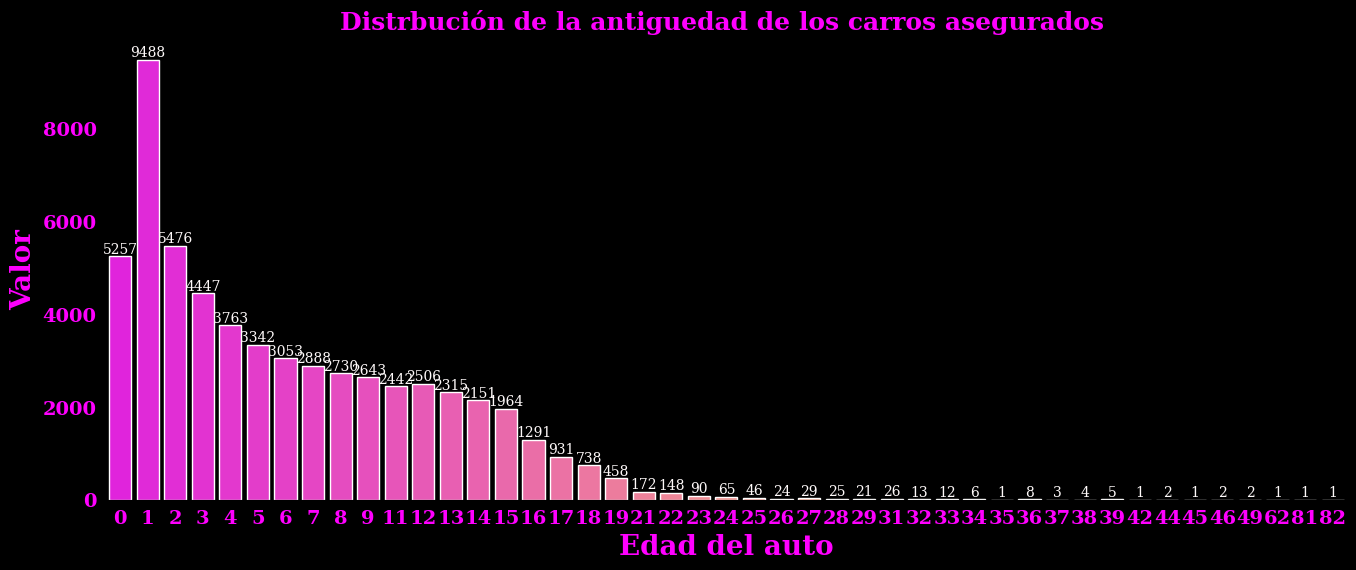

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16,6), facecolor="black")
#Tipo de letra
plt.rcParams['font.family'] = 'DejaVu Serif'
#Revisamos la proporción de reclamos
#x-->Variable a graficar
#data-->Dattos
#color-->Color de las barras
#edgecolor-->Color del borde de las barras
# Creamos una paleta de colores
colors = ['lime', 'red']
#Width-->Grosor de barras
grafica=sns.countplot(x='age_of_car',data=df,palette='spring',
                    edgecolor='white')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Edad del auto',fontsize = 20,
           color = 'magenta',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valor',fontsize = 20,
           color = 'magenta',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='magenta',fontweight='bold')
plt.yticks(fontsize=14, color='magenta',fontweight='bold')
#Agregar el titulo con tamaño y color personalizados
#fontweight='bold'-->Negritas
plt.title('Distrbución de la antiguedad de los carros asegurados ',
          fontsize = 18, color = 'magenta',fontweight='bold')
#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=10,
                      color='snow')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")
# Mostrar el gráfico
plt.show()

<ipython-input-8-199bd2bc9ea1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafica=sns.countplot(x='fuel_type',data=df,palette='ocean'


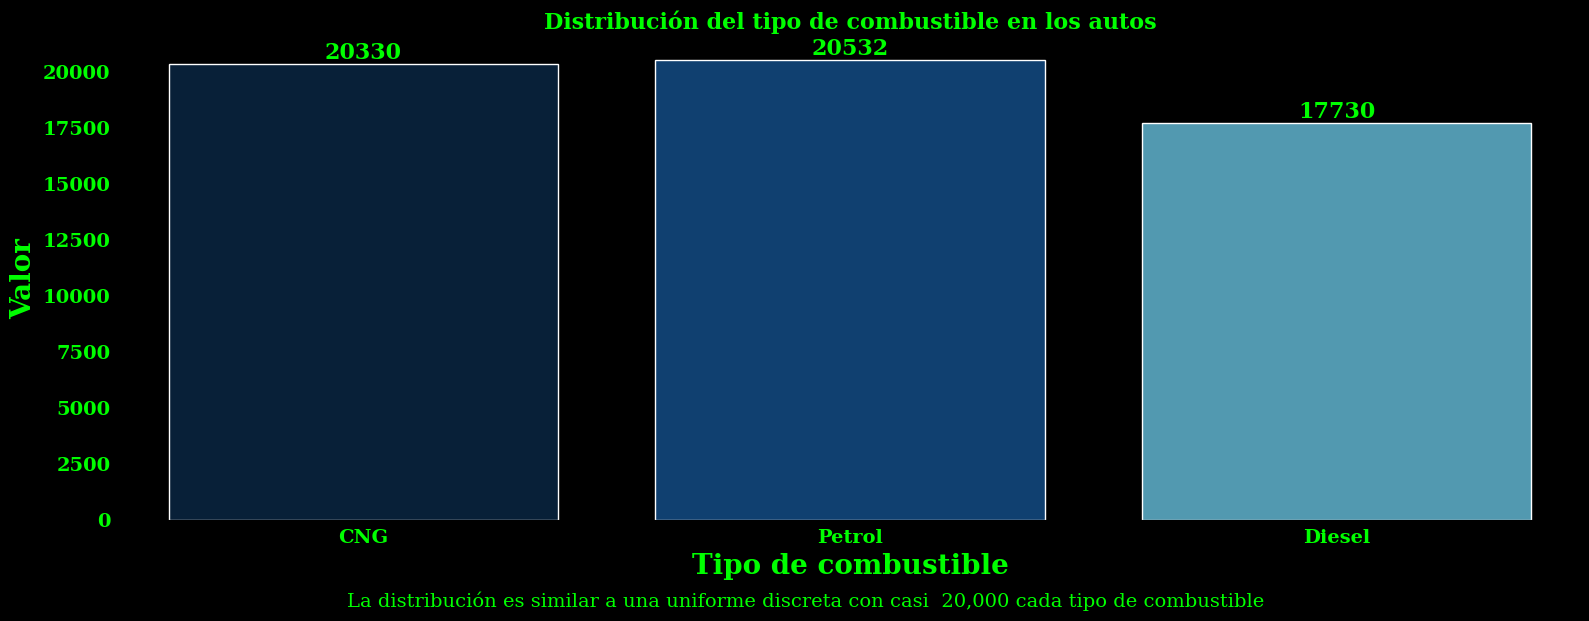

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16, 6), facecolor='black')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Histograma con densidad de Kernel
grafica=sns.countplot(x='fuel_type',data=df,palette='ocean'
                      ,edgecolor='white')

# Personalización del título
plt.title('Distribución del tipo de combustible en los autos',
          fontsize=16, color='lime', fontweight='bold')

# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Tipo de combustible',fontsize = 20,
           color = 'lime',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valor',fontsize = 20,
           color = 'lime',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='lime',fontweight='bold')
plt.yticks(fontsize=14, color='lime',fontweight='bold')

#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=16,
                      color='lime',fontweight='bold')
# facecolor --> Color  de fondo

# Interpretación debajo del gráfico
plt.figtext(0.22, -0.02,
            "La distribución es similar a una uniforme discreta con casi "
            " 20,000 cada tipo de combustible ",
            fontsize=14, color='lime')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")

# Ajustar todo el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<ipython-input-9-5dd65691dc81>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafica=sns.countplot(x='steering_type',data=df,palette='ocean'


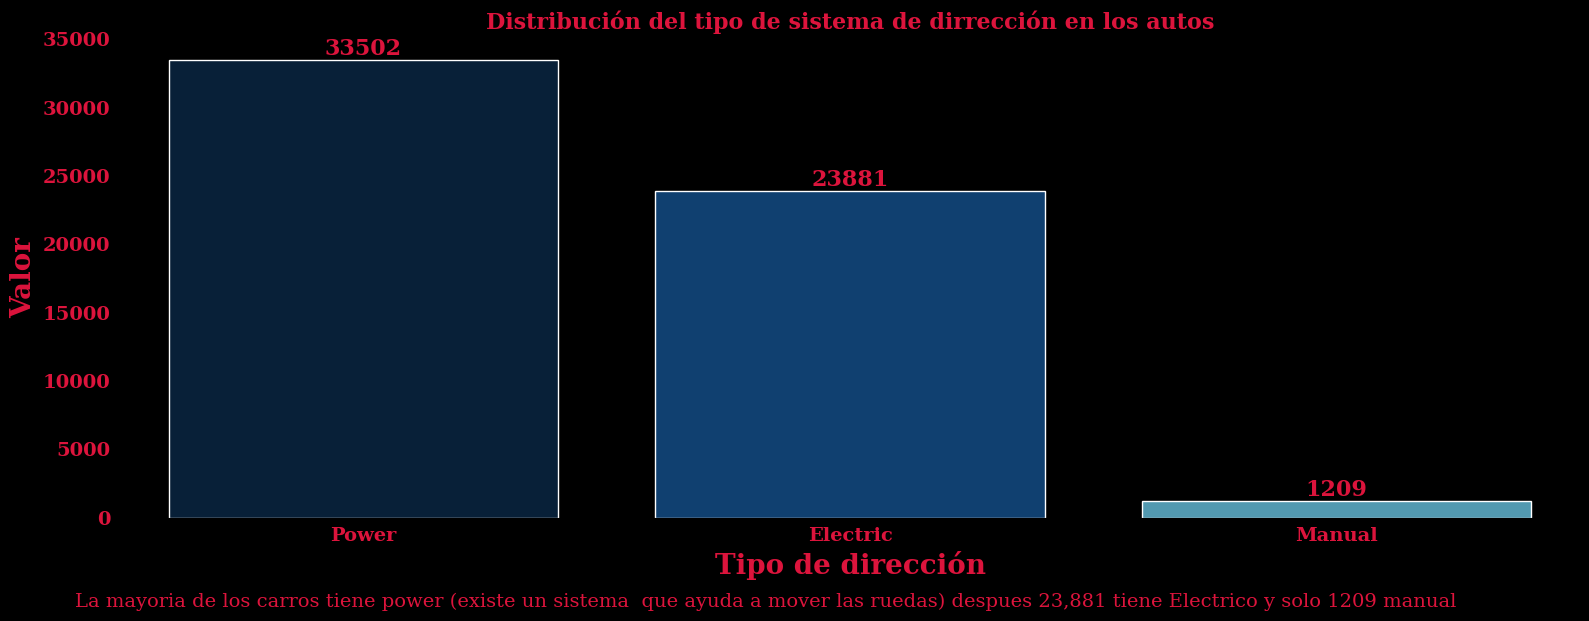

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16, 6), facecolor='black')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Histograma con densidad de Kernel
grafica=sns.countplot(x='steering_type',data=df,palette='ocean'
                      ,edgecolor='white')

# Personalización del título
plt.title('Distribución del tipo de sistema de dirrección en los autos',
          fontsize=16, color='crimson', fontweight='bold')

# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Tipo de dirección',fontsize = 20,
           color = 'crimson',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valor',fontsize = 20,
           color = 'crimson',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='crimson',fontweight='bold')
plt.yticks(fontsize=14, color='crimson',fontweight='bold')

#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=16,
                      color='crimson',fontweight='bold')
# facecolor --> Color  de fondo

# Interpretación debajo del gráfico
plt.figtext(0.05, -0.02,
            "La mayoria de los carros tiene power (existe un sistema "
            " que ayuda a mover las ruedas) despues 23,881 tiene "
            "Electrico y solo 1209 manual" ,
            fontsize=14, color='crimson')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")

# Ajustar todo el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<ipython-input-10-1a2c76392993>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafica=sns.countplot(x='ncap_rating',data=df,palette='autumn'


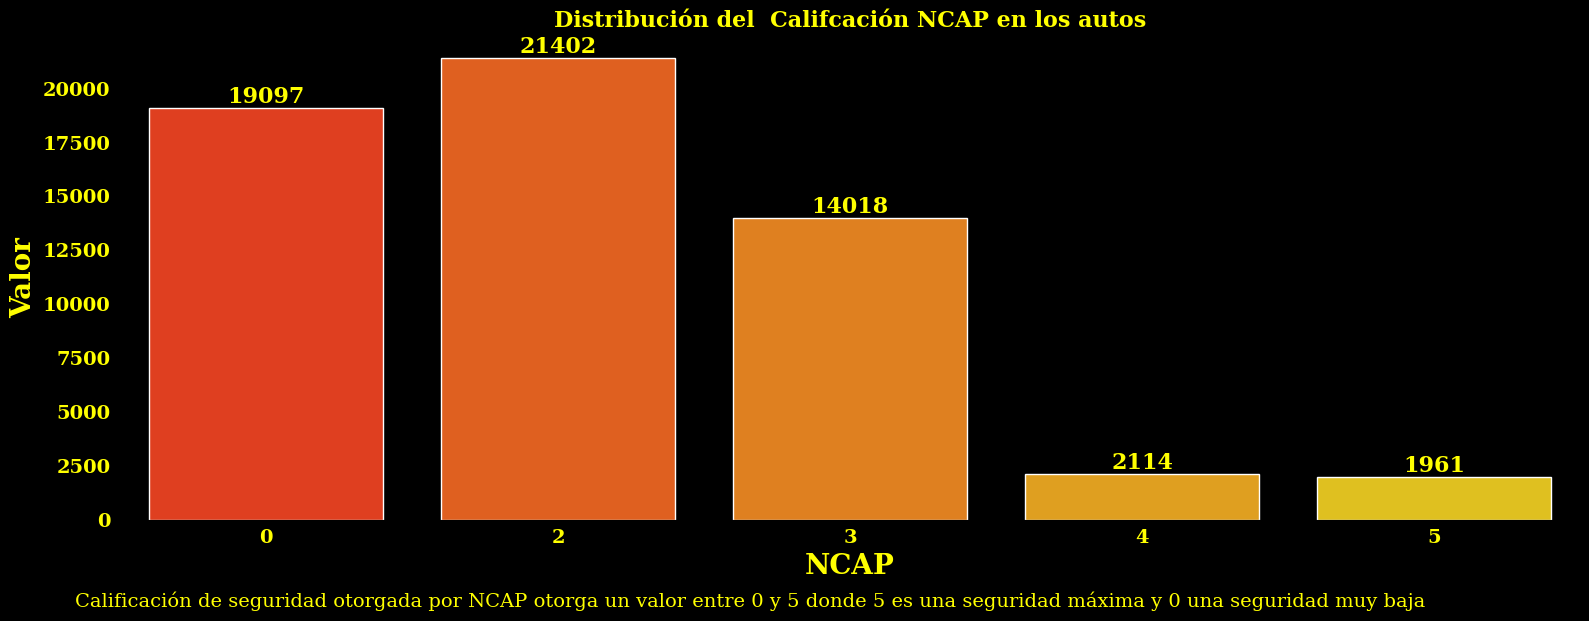

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16, 6), facecolor='black')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Histograma con densidad de Kernel
grafica=sns.countplot(x='ncap_rating',data=df,palette='autumn'
                      ,edgecolor='white')

# Personalización del título
plt.title('Distribución del  Califcación NCAP en los autos',
          fontsize=16, color='yellow', fontweight='bold')

# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('NCAP',fontsize = 20,
           color = 'yellow',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valor',fontsize = 20,
           color = 'yellow',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='yellow',fontweight='bold')
plt.yticks(fontsize=14, color='yellow',fontweight='bold')

#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=16,
                      color='yellow',fontweight='bold')
# facecolor --> Color  de fondo

# Interpretación debajo del gráfico
plt.figtext(0.05, -0.02,
            "Calificación de seguridad otorgada por NCAP "
            "otorga un valor entre 0 y 5 donde 5 es una seguridad "
            "máxima y 0 una seguridad muy baja ",
            fontsize=14, color='yellow')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")

# Ajustar todo el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

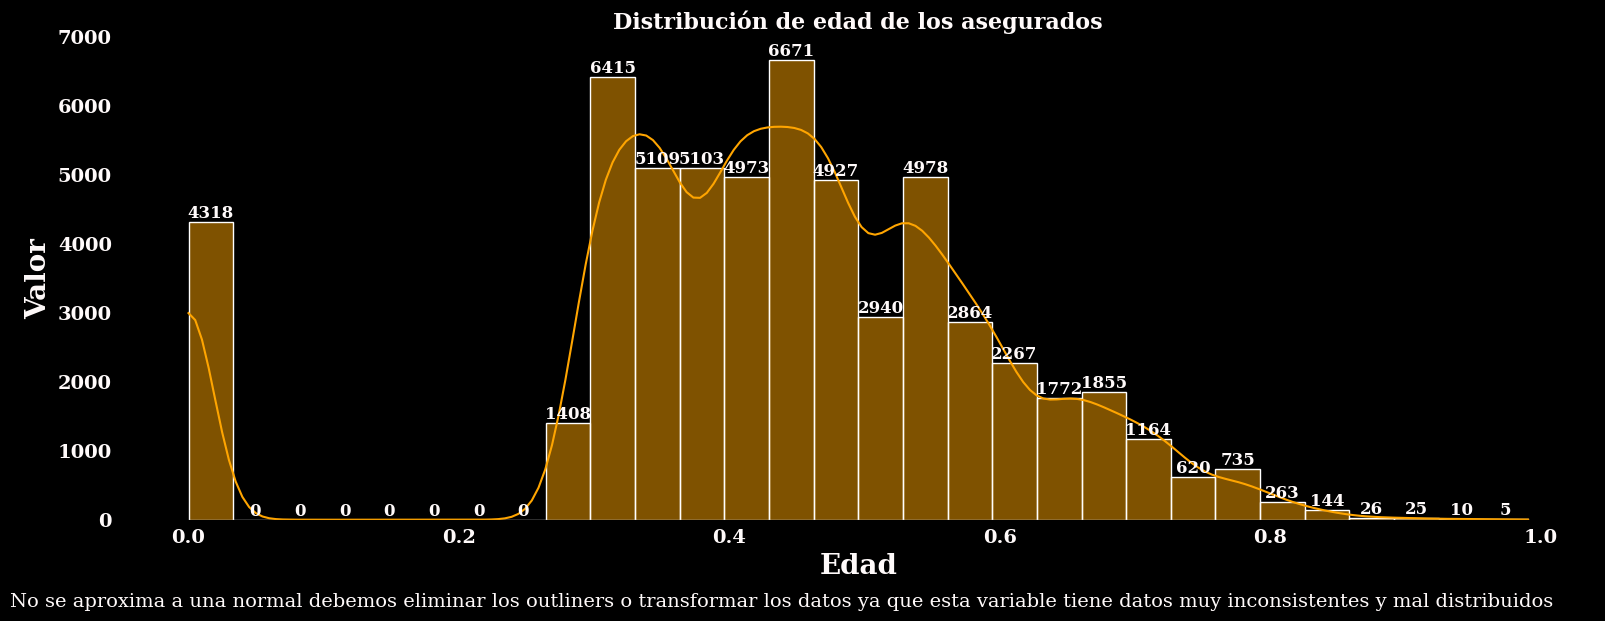

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16, 6), facecolor='black')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Histograma con densidad de Kernel
grafica=sns.histplot(df['age_of_policyholder'], kde=True,
                     bins=30, color='orange',edgecolor='white')

# Personalización del título
plt.title('Distribución de edad de los asegurados',
          fontsize=16, color='snow', fontweight='bold')

# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Edad',fontsize = 20,
           color = 'snow',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valor',fontsize = 20,
           color = 'snow',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='snow',fontweight='bold')
plt.yticks(fontsize=14, color='snow',fontweight='bold')

#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=12,
                      color='snow',fontweight='bold')
# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "No se aproxima a una normal "
            "debemos eliminar los outliners "
            "o transformar los datos ya que esta variable tiene datos "
            "muy inconsistentes y mal distribuidos",
            fontsize=14, color='snow')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")

# Ajustar todo el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

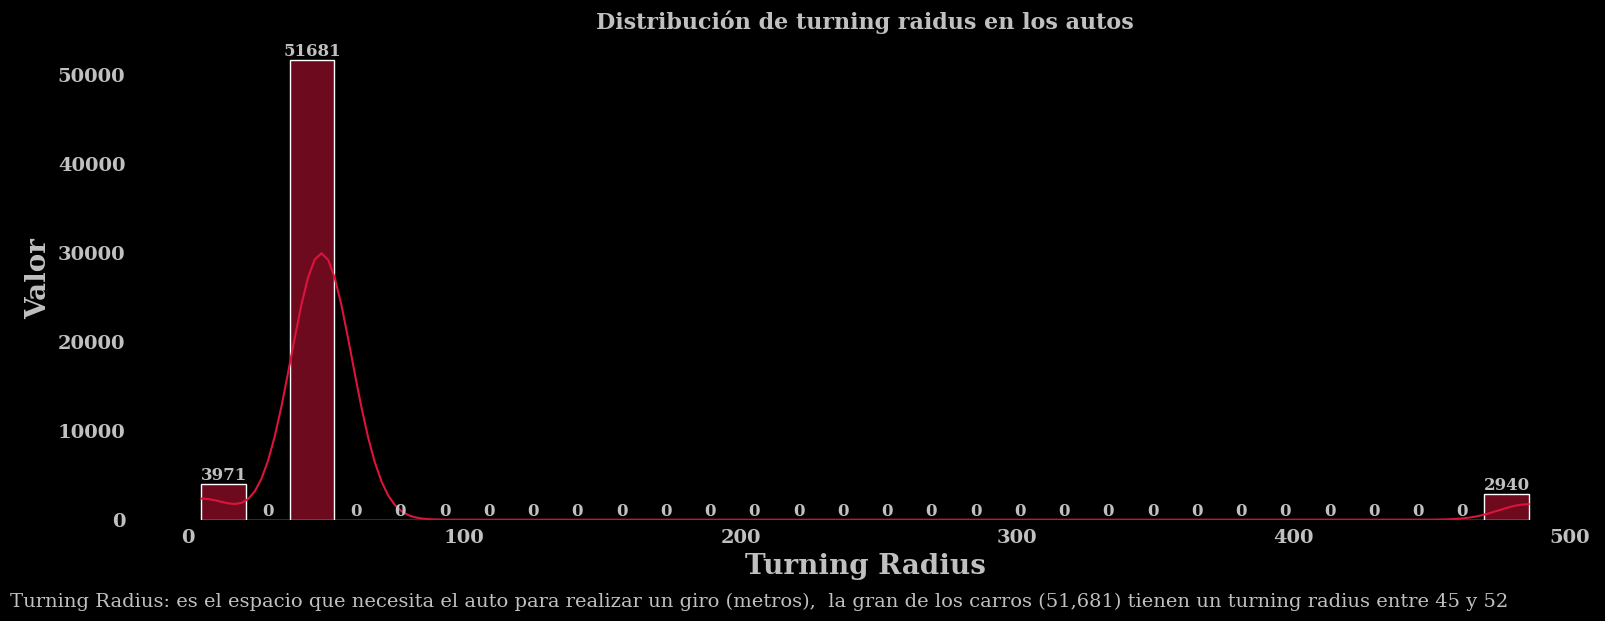

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16, 6), facecolor='black')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Histograma con densidad de Kernel
grafica=sns.histplot(df['turning_radius'], kde=True,
                     bins=30, color='crimson',edgecolor='white')

# Personalización del título
plt.title('Distribución de turning raidus en los autos',
          fontsize=16, color='silver', fontweight='bold')

# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Turning Radius',fontsize = 20,
           color = 'silver',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valor',fontsize = 20,
           color = 'silver',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='silver',fontweight='bold')
plt.yticks(fontsize=14, color='silver',fontweight='bold')

#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=12,
                      color='silver',fontweight='bold')
# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "Turning Radius: es el espacio "
            "que necesita el auto para realizar un giro (metros),  "
            "la gran de los carros (51,681) "
            "tienen un turning radius entre 45 y 52",
            fontsize=14, color='silver')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")

# Ajustar todo el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

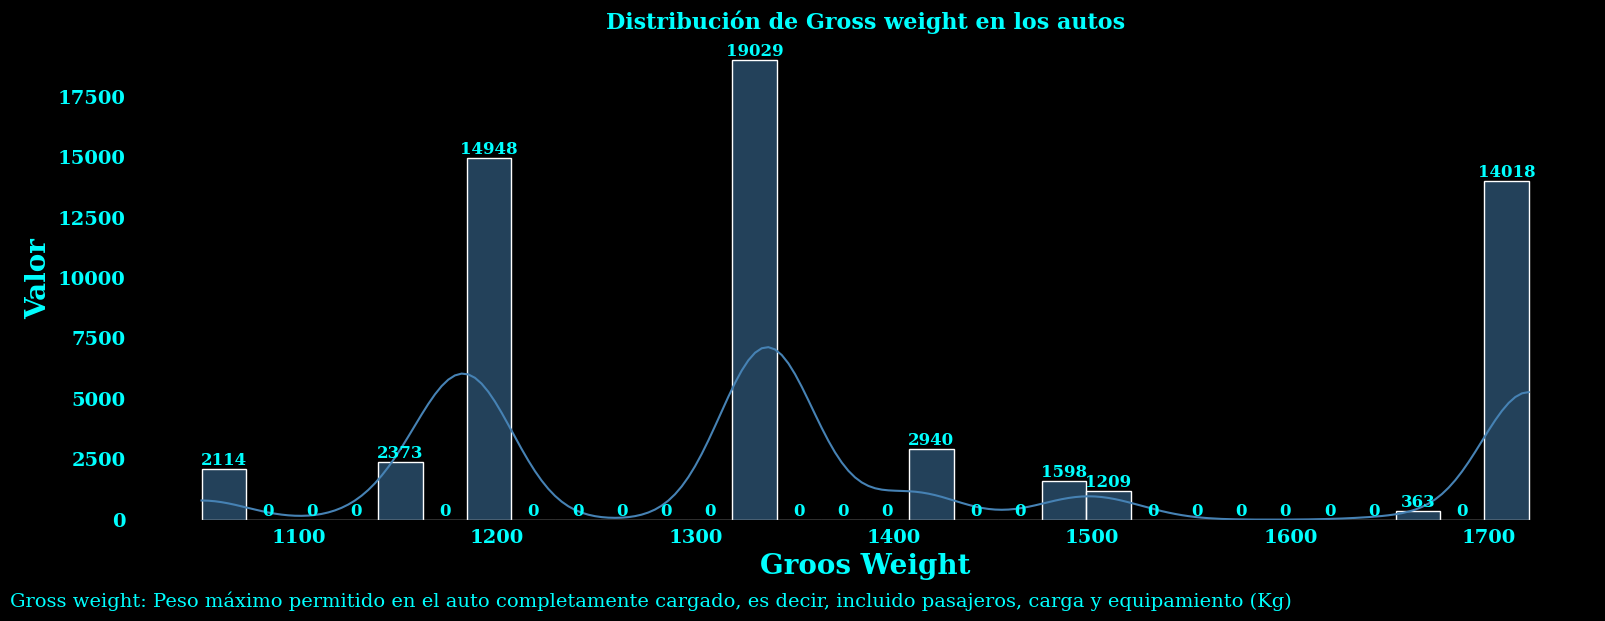

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16, 6), facecolor='black')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Histograma con densidad de Kernel
grafica=sns.histplot(df['gross_weight'], kde=True,
                     bins=30, color='steelblue',edgecolor='white')

# Personalización del título
plt.title('Distribución de Gross weight en los autos',
          fontsize=16, color='cyan', fontweight='bold')

# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Groos Weight',fontsize = 20,
           color = 'cyan',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valor',fontsize = 20,
           color = 'cyan',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='cyan',fontweight='bold')
plt.yticks(fontsize=14, color='cyan',fontweight='bold')

#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=12,
                      color='cyan',fontweight='bold')
# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "Gross weight: Peso máximo permitido en el "
            "auto completamente cargado, es decir, "
            "incluido pasajeros, carga y "
            "equipamiento (Kg) ",
            fontsize=14, color='cyan')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")

# Ajustar todo el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

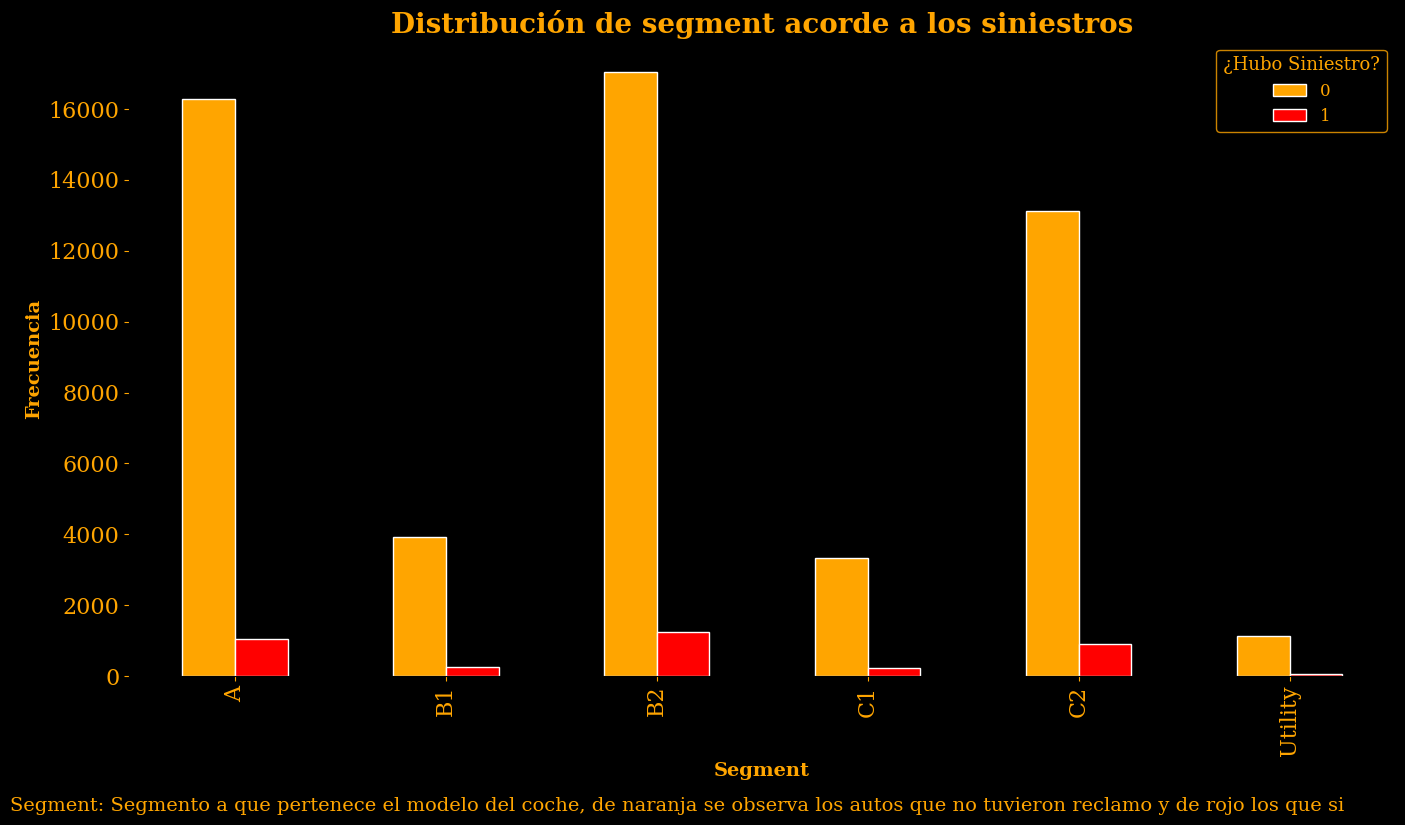

In [ ]:
#Grafica
grafica = pd.crosstab(df['segment'], df['is_claim'])

# Crear la gráfica y guardar el objeto de los ejes
ax = grafica.plot(kind='bar', color=['orange', 'red'], edgecolor='white',
                  figsize=(14,8), legend=True)

# Fondo negro en el área de los ejes y en toda la figura
ax.set_facecolor('black')
ax.figure.set_facecolor('black')

# Título y etiquetas
ax.set_title('Distribución de segment acorde a los siniestros',
             fontsize=20, color='orange', fontweight='bold')
ax.set_xlabel('Segment', fontsize=14, color='orange', fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=14, color='orange', fontweight='bold')

# Cambiar color de los ticks
ax.tick_params(axis='x',labelsize=16 ,colors='orange')
ax.tick_params(axis='y',labelsize=16 ,colors='orange')

# Cambiar colores de los bordes de la leyenda y el texto
legend = ax.legend(title='¿Hubo Siniestro?', title_fontsize=13,
                   fontsize=12, labelcolor='orange')
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('orange')
for text in legend.get_texts():
    text.set_color('orange')
legend.get_title().set_color('orange')

# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "Segment: Segmento a que pertenece el modelo "
            "del coche, "
            "de naranja se observa los autos que no tuvieron "
            "reclamo y de rojo los que si",
            fontsize=14, color='orange')

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()


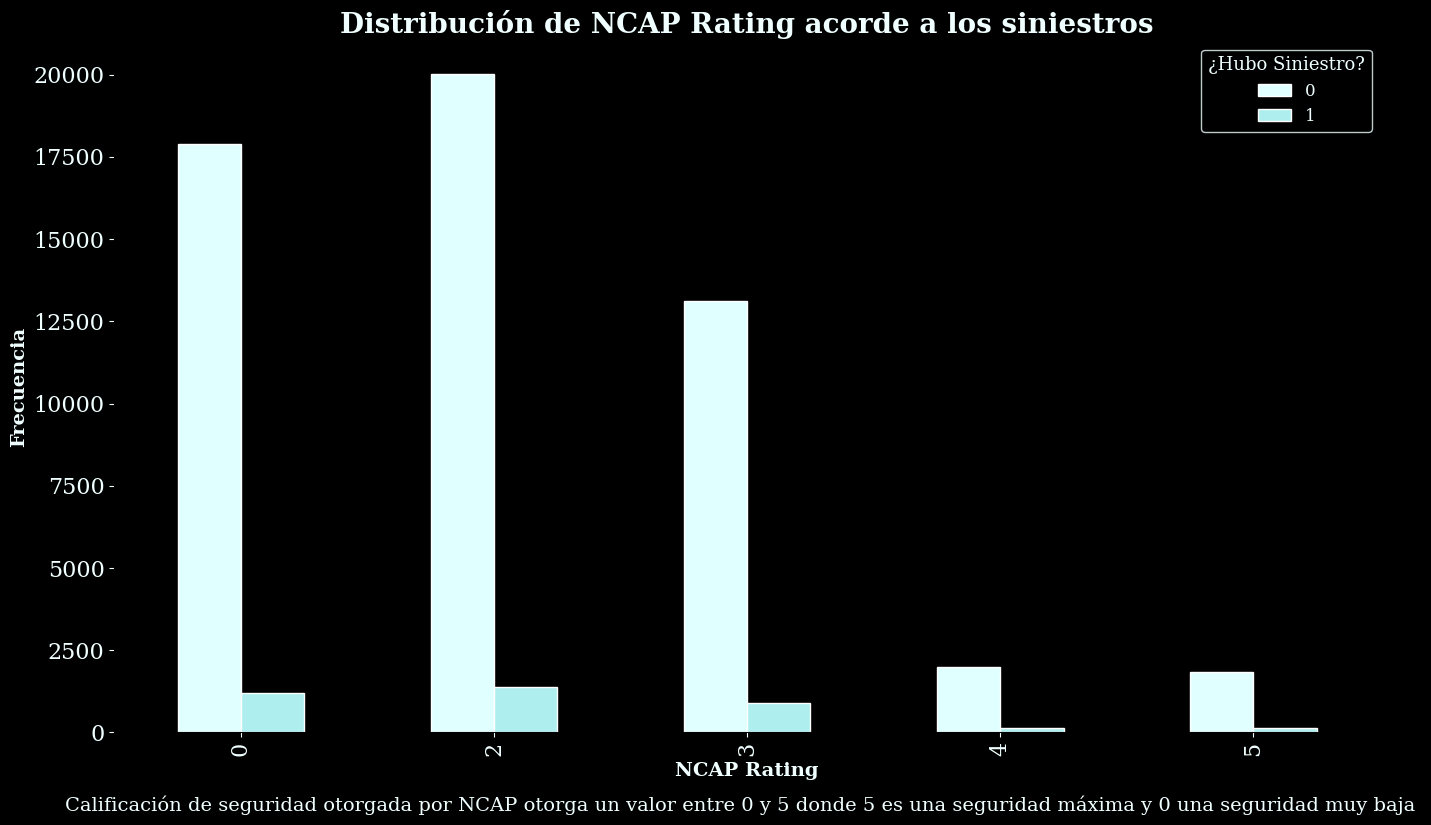

In [ ]:
# Grafica
grafica = pd.crosstab(df['ncap_rating'], df['is_claim'])

# Crear la gráfica y guardar el objeto de los ejes
ax = grafica.plot(kind='bar', color=['lightcyan','paleturquoise'],
                  edgecolor='white',
                  figsize=(14,8), legend=True)

# Fondo negro
ax.set_facecolor('black')
ax.figure.set_facecolor('black')
# Título y etiquetas
ax.set_title('Distribución de NCAP Rating acorde a los siniestros',
             fontsize=20, color='azure', fontweight='bold')
ax.set_xlabel('NCAP Rating', fontsize=14, color='azure', fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=14, color='azure', fontweight='bold')

# Cambiar color de los ticks
ax.tick_params(axis='x',labelsize=16 ,colors='azure')
ax.tick_params(axis='y',labelsize=16 ,colors='azure')

# Cambiar colores de los bordes de la leyenda y el texto
legend = ax.legend(title='¿Hubo Siniestro?', title_fontsize=13,
                   fontsize=12, labelcolor='azure')
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('azure')
for text in legend.get_texts():
    text.set_color('azure')
legend.get_title().set_color('azure')

# Interpretación debajo del gráfico
plt.figtext(0.05, -0.02,
            "Calificación de seguridad otorgada por NCAP "
            "otorga un valor entre 0 y 5 donde 5 es una seguridad "
            "máxima y 0 una seguridad muy baja ",
            fontsize=14, color='azure')

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

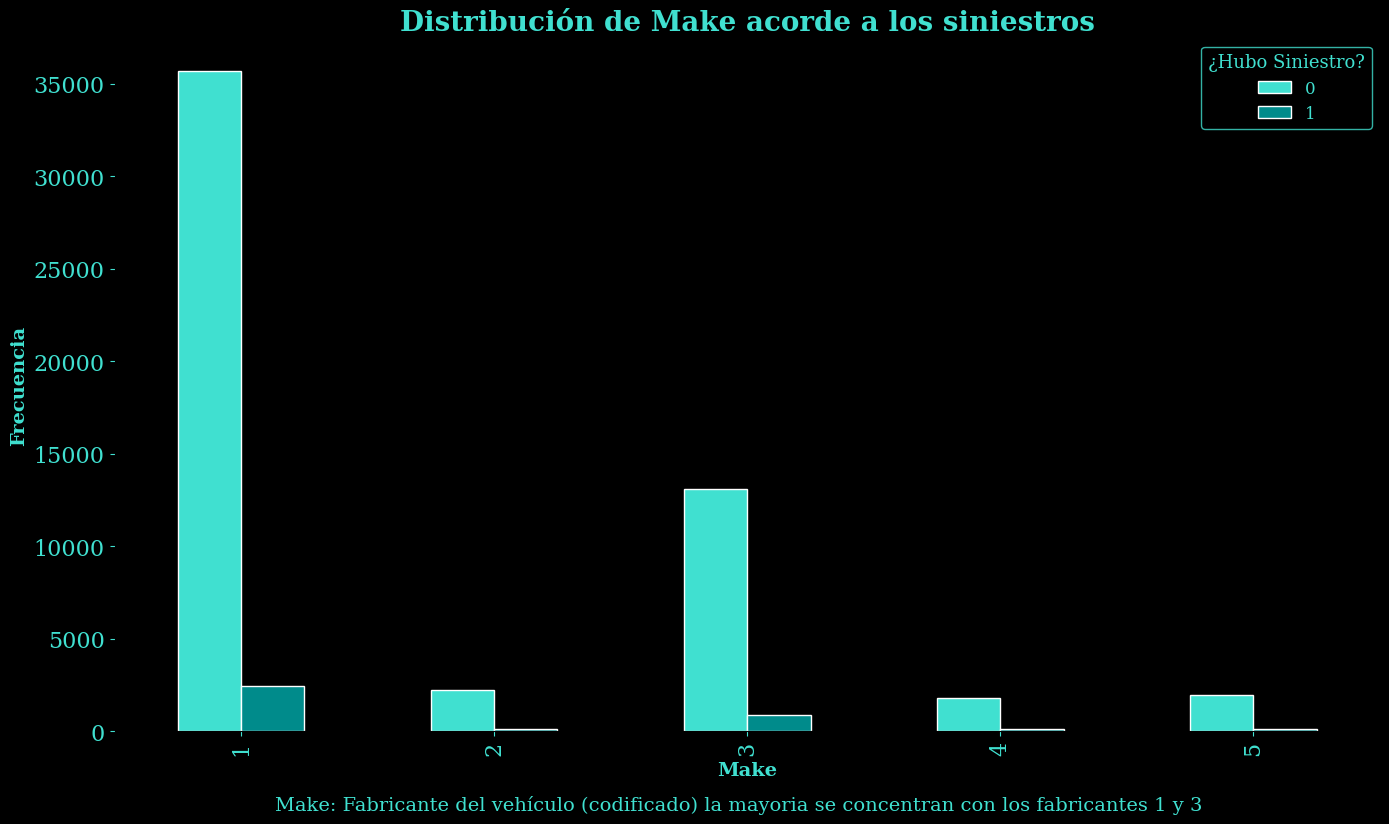

In [ ]:
# Grafica
grafica = pd.crosstab(df['make'], df['is_claim'])

# Crear la gráfica y guardar el objeto de los ejes
ax = grafica.plot(kind='bar', color=['turquoise','darkcyan'],
                  edgecolor='white',
                  figsize=(14,8), legend=True)

# Fondo negro
ax.set_facecolor('black')
ax.figure.set_facecolor('black')
# Título y etiquetas
ax.set_title('Distribución de Make acorde a los siniestros',
             fontsize=20, color='turquoise', fontweight='bold')
ax.set_xlabel('Make', fontsize=14, color='turquoise', fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=14, color='turquoise', fontweight='bold')

# Cambiar color de los ticks
ax.tick_params(axis='x',labelsize=16 ,colors='turquoise')
ax.tick_params(axis='y',labelsize=16 ,colors='turquoise')

# Cambiar colores de los bordes de la leyenda y el texto
legend = ax.legend(title='¿Hubo Siniestro?', title_fontsize=13,
                   fontsize=12, labelcolor='turquoise')
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('turquoise')
for text in legend.get_texts():
    text.set_color('turquoise')
legend.get_title().set_color('turquoise')

# Interpretación debajo del gráfico
plt.figtext(0.20, -0.02,
            "Make: Fabricante del vehículo (codificado) "
            "la mayoria se concentran con los "
            "fabricantes 1 y 3"
            ,
            fontsize=14, color='turquoise')

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

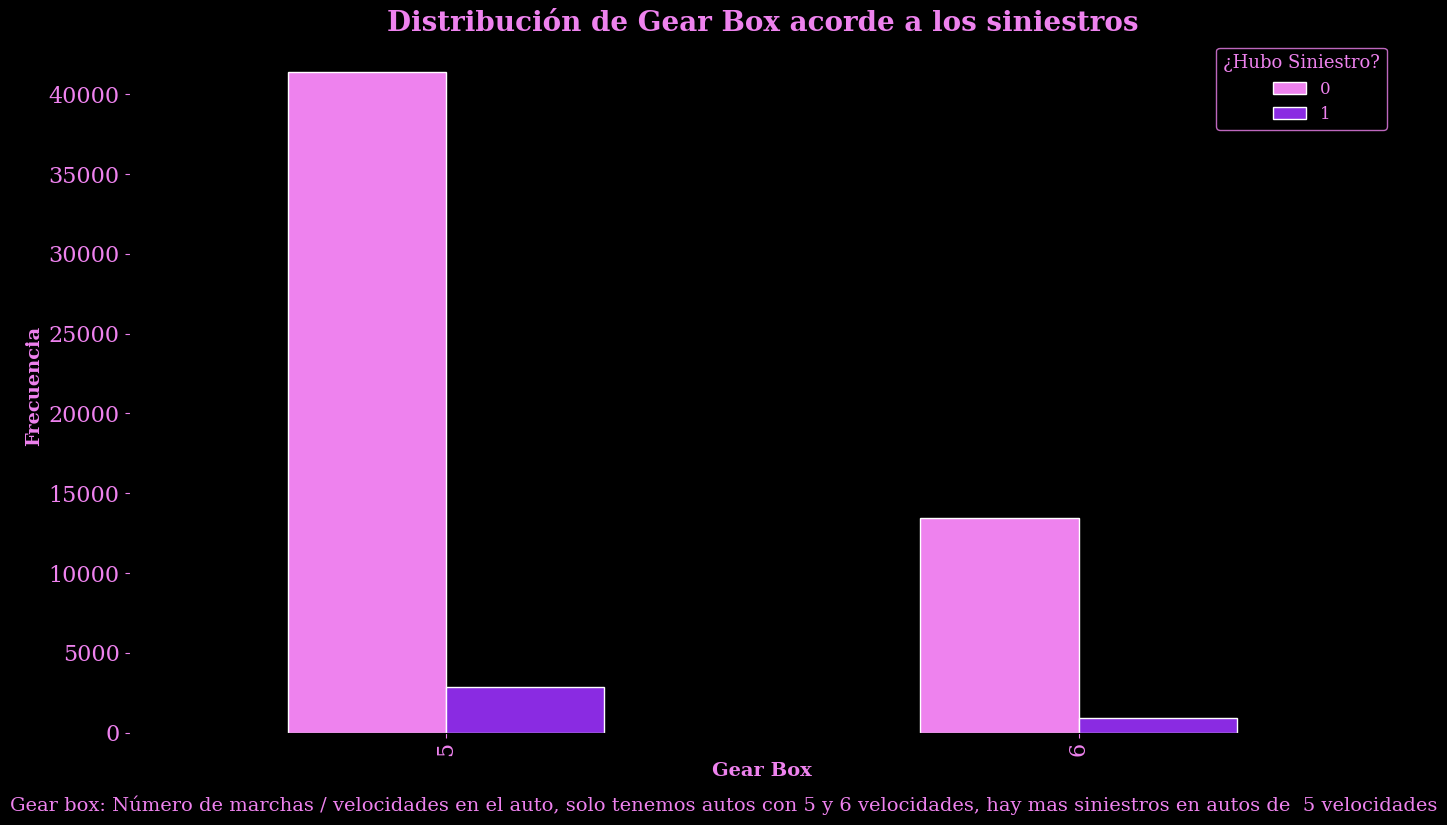

In [ ]:
# Grafica
grafica = pd.crosstab(df['gear_box'], df['is_claim'])

# Crear la gráfica y guardar el objeto de los ejes
ax = grafica.plot(kind='bar', color=['violet','blueviolet'],
                  edgecolor='white',
                  figsize=(14,8), legend=True)

# Fondo negro
ax.set_facecolor('black')
ax.figure.set_facecolor('black')
# Título y etiquetas
ax.set_title('Distribución de Gear Box acorde a los siniestros',
             fontsize=20, color='violet', fontweight='bold')
ax.set_xlabel('Gear Box', fontsize=14, color='violet', fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=14, color='violet', fontweight='bold')

# Cambiar color de los ticks
ax.tick_params(axis='x',labelsize=16 ,colors='violet')
ax.tick_params(axis='y',labelsize=16 ,colors='violet')

# Cambiar colores de los bordes de la leyenda y el texto
legend = ax.legend(title='¿Hubo Siniestro?', title_fontsize=13,
                   fontsize=12, labelcolor='violet')
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('violet')
for text in legend.get_texts():
    text.set_color('violet')
legend.get_title().set_color('violet')

# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "Gear box: Número de marchas / velocidades en "
            "el auto, solo tenemos autos con 5 y 6 "
            "velocidades, hay mas siniestros en autos de "
            " 5 velocidades",
            fontsize=14, color='violet')

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

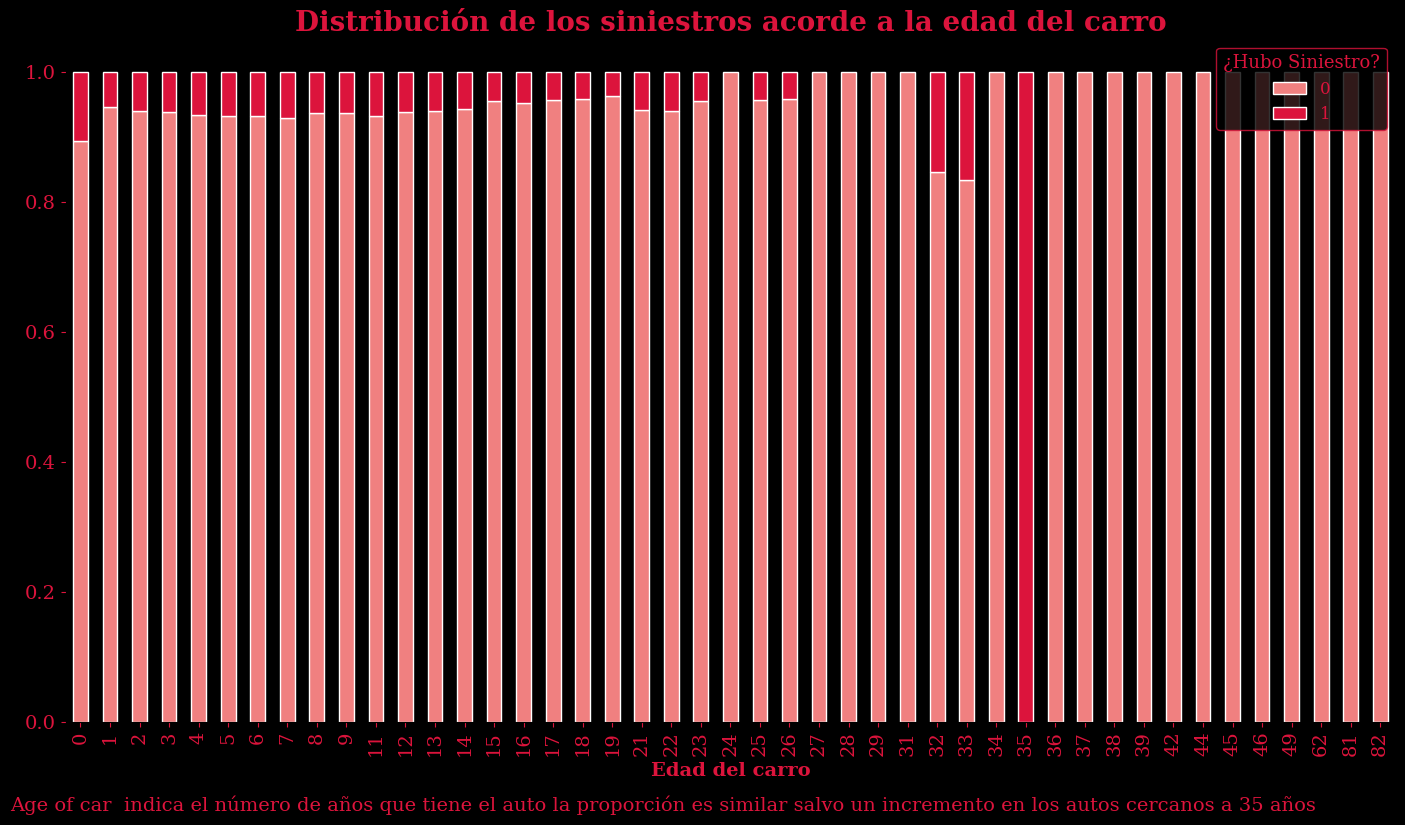

In [ ]:
#Grafica normalizada
grafica = pd.crosstab(df['age_of_car'], df['is_claim'])
grafica_normalizada = grafica.div(grafica.sum(1).astype(float), axis=0)

# Crear la gráfica y guardar el objeto de los ejes
ax = grafica_normalizada.plot(kind='bar', stacked=True,
                              color=['lightcoral', 'crimson'],
                              edgecolor='white', figsize=(14,8))

# Fondo negro
ax.set_facecolor('black')
ax.figure.set_facecolor('black')

# Título y etiquetas
ax.set_title('Distribución de los siniestros acorde a la edad del carro',
             fontsize=20, color='crimson', fontweight='bold')
ax.set_xlabel('Edad del carro', fontsize=14,
              color='crimson', fontweight='bold')
# Cambiar color de los ticks
ax.tick_params(axis='x', labelsize=14,colors='crimson')
ax.tick_params(axis='y', labelsize=14,colors='crimson')

# Cambiar colores de los bordes de la leyenda y el texto
legend = ax.legend(title='¿Hubo Siniestro?', title_fontsize=13,
                   fontsize=12, labelcolor='crimson')
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('crimson')
for text in legend.get_texts():
    text.set_color('crimson')
legend.get_title().set_color('crimson')

# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "Age of car  "
            "indica el número de años "
            "que tiene el auto "
            "la proporción es similar "
            "salvo un incremento en los autos cercanos a 35 años",
            fontsize=14, color='crimson')

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

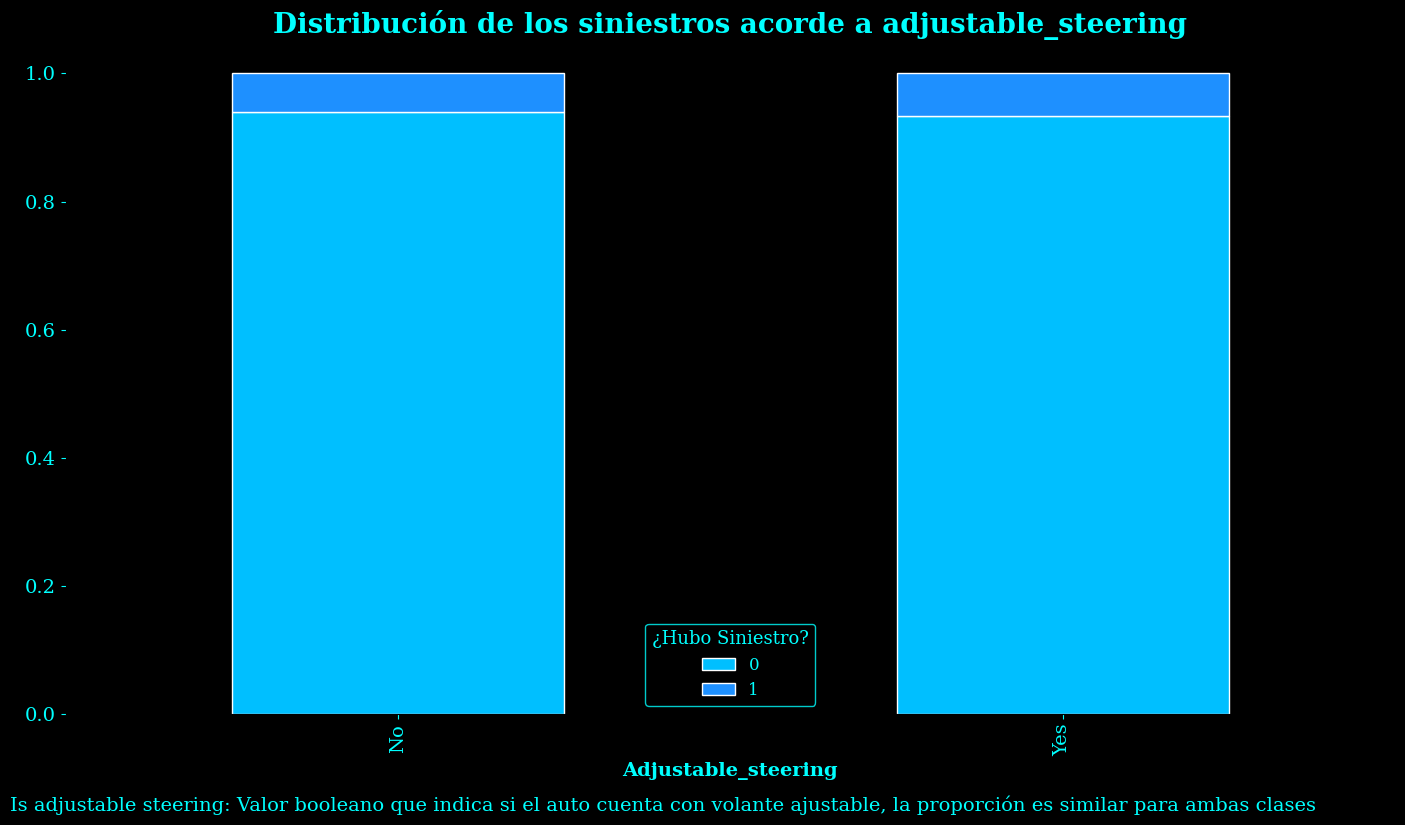

In [ ]:
# Grafica normalizada
grafica = pd.crosstab(df['is_adjustable_steering'], df['is_claim'])
grafica_normalizada = grafica.div(grafica.sum(1).astype(float), axis=0)

# Crear la gráfica y guardar el objeto de los ejes
ax = grafica_normalizada.plot(kind='bar', stacked=True,
                              color=['deepskyblue', 'dodgerblue'],
                              edgecolor='white', figsize=(14,8))

# Fondo negro
ax.set_facecolor('black')
ax.figure.set_facecolor('black')

# Título y etiquetas
ax.set_title('Distribución de los siniestros acorde a adjustable_steering',
             fontsize=20, color='cyan', fontweight='bold')
ax.set_xlabel('Adjustable_steering', fontsize=14,
              color='cyan', fontweight='bold')
# Cambiar color de los ticks
ax.tick_params(axis='x', labelsize=14,colors='cyan')
ax.tick_params(axis='y', labelsize=14,colors='cyan')

# Cambiar colores de los bordes de la leyenda y el texto
legend = ax.legend(title='¿Hubo Siniestro?', title_fontsize=13,
                   fontsize=12, labelcolor='cyan')
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('cyan')
for text in legend.get_texts():
    text.set_color('cyan')
legend.get_title().set_color('cyan')

# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "Is adjustable steering: Valor booleano "
            "que indica si el auto cuenta "
            "con volante ajustable, "
            "la proporción es similar "
            "para ambas clases ",
            fontsize=14, color='cyan')

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

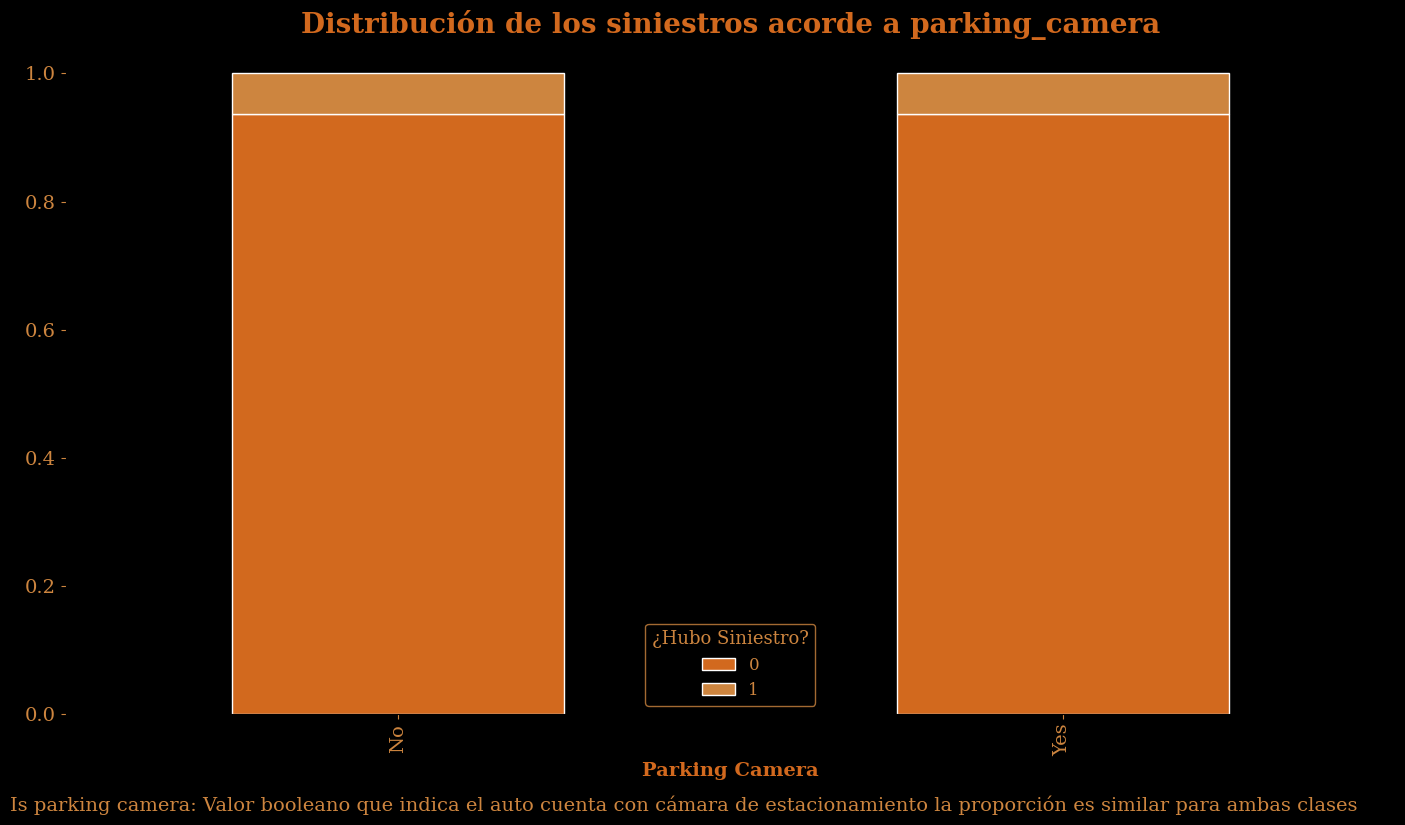

In [ ]:
# Grafica normalizada
grafica = pd.crosstab(df['is_parking_camera'], df['is_claim'])
grafica_normalizada = grafica.div(grafica.sum(1).astype(float), axis=0)

# Crear la gráfica y guardar el objeto de los ejes
ax = grafica_normalizada.plot(kind='bar', stacked=True,
                              color=['chocolate', 'peru'],
                              edgecolor='white', figsize=(14,8))

# Fondo negro
ax.set_facecolor('black')
ax.figure.set_facecolor('black')

# Título y etiquetas
ax.set_title('Distribución de los siniestros acorde a parking_camera',
             fontsize=20, color='chocolate', fontweight='bold')
ax.set_xlabel('Parking Camera', fontsize=14,
              color='chocolate', fontweight='bold')
# Cambiar color de los ticks
ax.tick_params(axis='x', labelsize=14,colors='peru')
ax.tick_params(axis='y', labelsize=14,colors='peru')

# Cambiar colores de los bordes de la leyenda y el texto
legend = ax.legend(title='¿Hubo Siniestro?', title_fontsize=13,
                   fontsize=12, labelcolor='peru')
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('peru')
for text in legend.get_texts():
    text.set_color('peru')
legend.get_title().set_color('peru')

# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "Is parking camera: Valor booleano que "
            "indica el auto cuenta con cámara de estacionamiento "
            "la proporción es similar "
            "para ambas clases ",
            fontsize=14, color='peru')

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

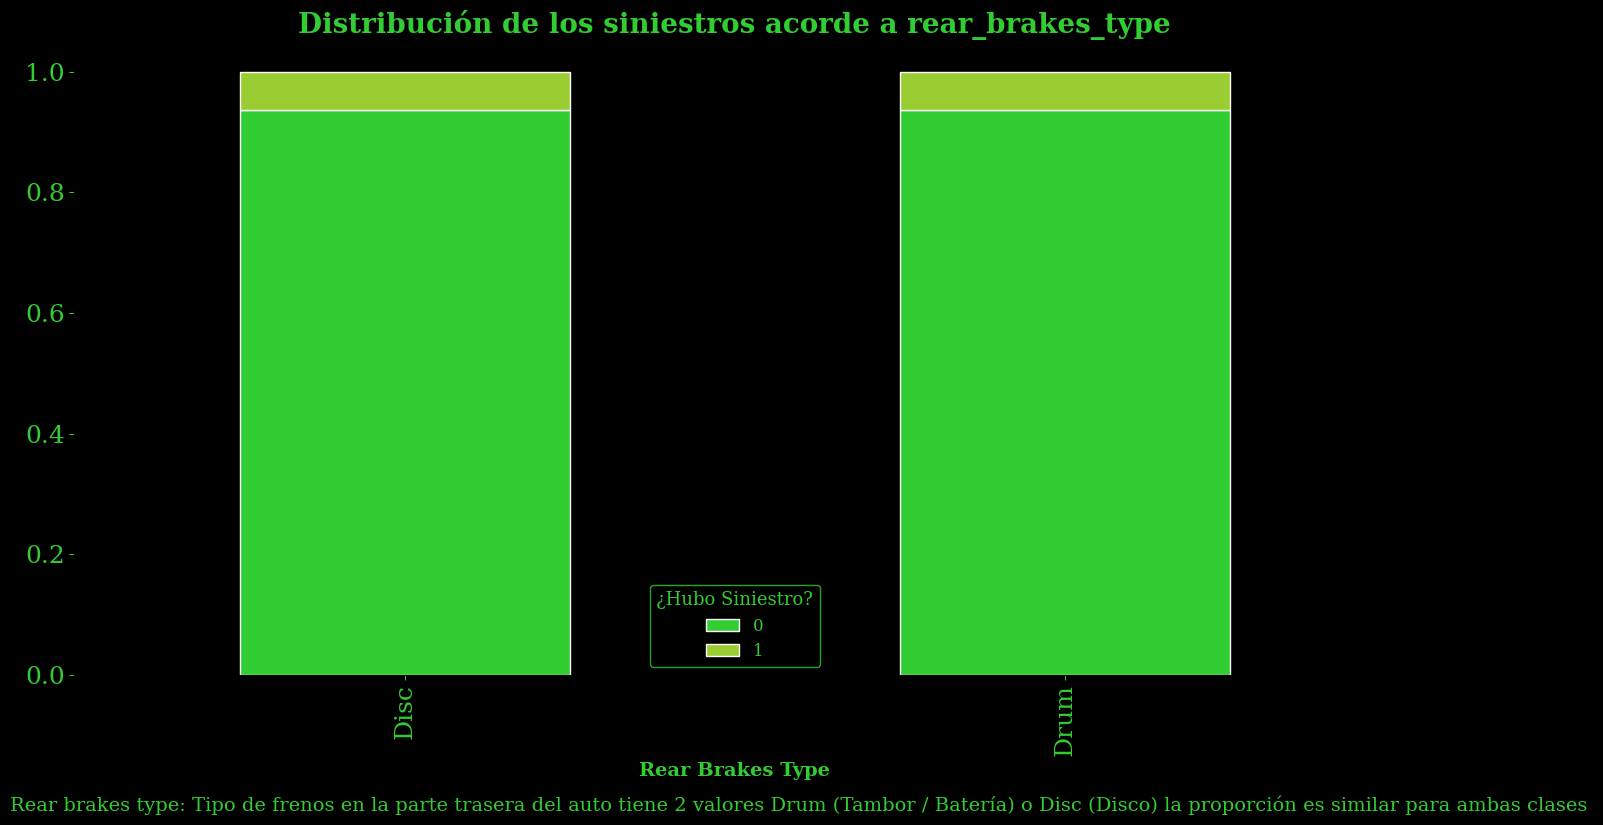

In [ ]:
# Grafica normalizada
grafica = pd.crosstab(df['rear_brakes_type'], df['is_claim'])
grafica_normalizada = grafica.div(grafica.sum(1).astype(float), axis=0)

# Crear la gráfica y guardar el objeto de los ejes
ax = grafica_normalizada.plot(kind='bar', stacked=True,
                              color=['limegreen', 'yellowgreen'],
                              edgecolor='white', figsize=(14,8))

# Fondo negro
ax.set_facecolor('black')
ax.figure.set_facecolor('black')

# Título y etiquetas
ax.set_title('Distribución de los siniestros acorde a rear_brakes_type',
             fontsize=20, color='limegreen', fontweight='bold')
ax.set_xlabel('Rear Brakes Type', fontsize=14,
              color='limegreen', fontweight='bold')
# Cambiar color de los ticks
ax.tick_params(axis='x',labelsize=18, colors='limegreen')
ax.tick_params(axis='y',labelsize=18, colors='limegreen')

# Cambiar colores de los bordes de la leyenda y el texto
legend = ax.legend(title='¿Hubo Siniestro?', title_fontsize=13,
                   fontsize=12, labelcolor='limegreen')
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('limegreen')
for text in legend.get_texts():
    text.set_color('limegreen')
legend.get_title().set_color('limegreen')

# Interpretación debajo del gráfico
plt.figtext(0.0, -0.02,
            "Rear brakes type: Tipo de frenos en "
            "la parte trasera del auto tiene 2 valores "
            "Drum (Tambor / Batería) o Disc (Disco) "
            "la proporción es similar "
            "para ambas clases ",
            fontsize=14, color='limegreen')

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

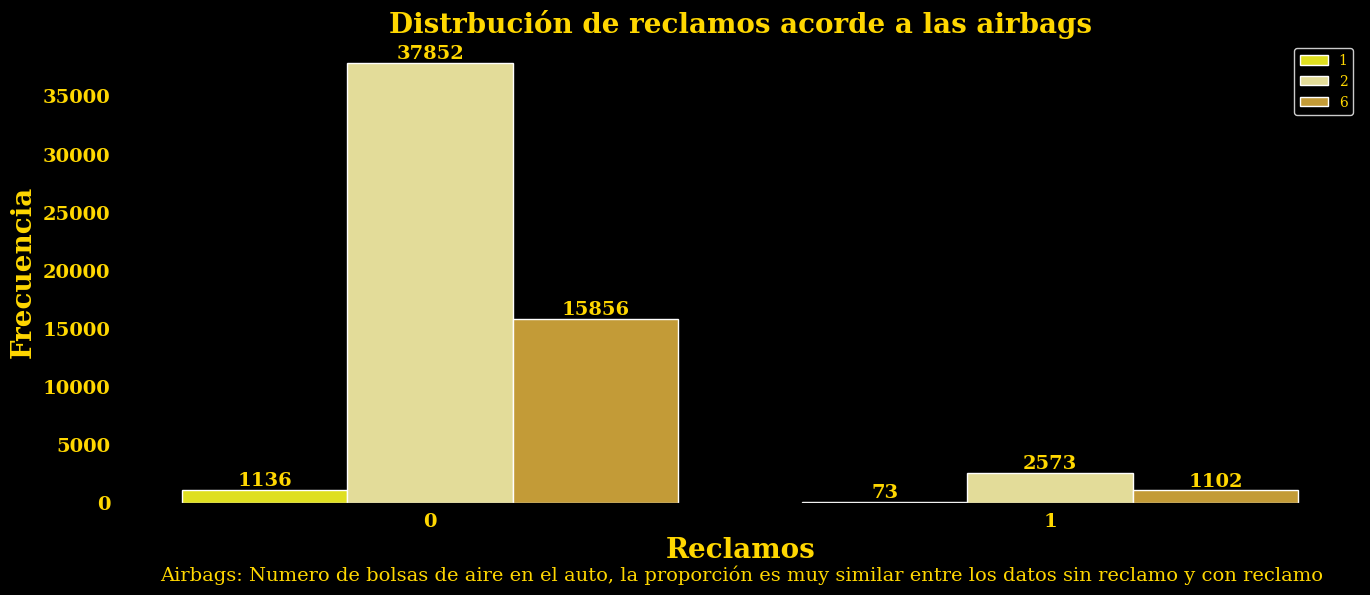

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16,6), facecolor="black")
#Tipo de letra
plt.rcParams['font.family'] = 'DejaVu Serif'
#Revisamos la proporción de reclamos
#x-->Variable a graficar
#data-->Dattos
#color-->Color de las barras
#edgecolor-->Color del borde de las barras
# Creamos una paleta de colores
colors = ['yellow', 'khaki','goldenrod']
#Width-->Grosor de barras
grafica=sns.countplot(x='is_claim',data=df, hue='airbags',
                      palette=colors,edgecolor='white')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Reclamos',fontsize = 20,
           color = 'gold',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Frecuencia',fontsize = 20,
           color = 'gold',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='gold',fontweight='bold')
plt.yticks(fontsize=14, color='gold',fontweight='bold')
#Agregar el titulo con tamaño y color personalizados
#fontweight='bold'-->Negritas
plt.title('Distrbución de reclamos acorde a las airbags',fontsize = 20,
          color = 'gold',fontweight='bold')
#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=14,
                      color='gold',fontweight='bold')
#Etiquetas para el parametro hue personalizados
plt.legend(
           facecolor='black',
           edgecolor='white',
           labelcolor='gold',
           title_fontsize=12)

# Interpretación debajo del gráfico
plt.figtext(0.15, -0.02,
            "Airbags: Numero de bolsas de aire en el auto, "
            "la proporción es muy similar entre los datos sin reclamo "
            "y con reclamo",
            fontsize=14, color='gold')

# facecolor --> Color  de fondo
grafica.set_facecolor("black")
# Mostrar el gráfico
plt.show()

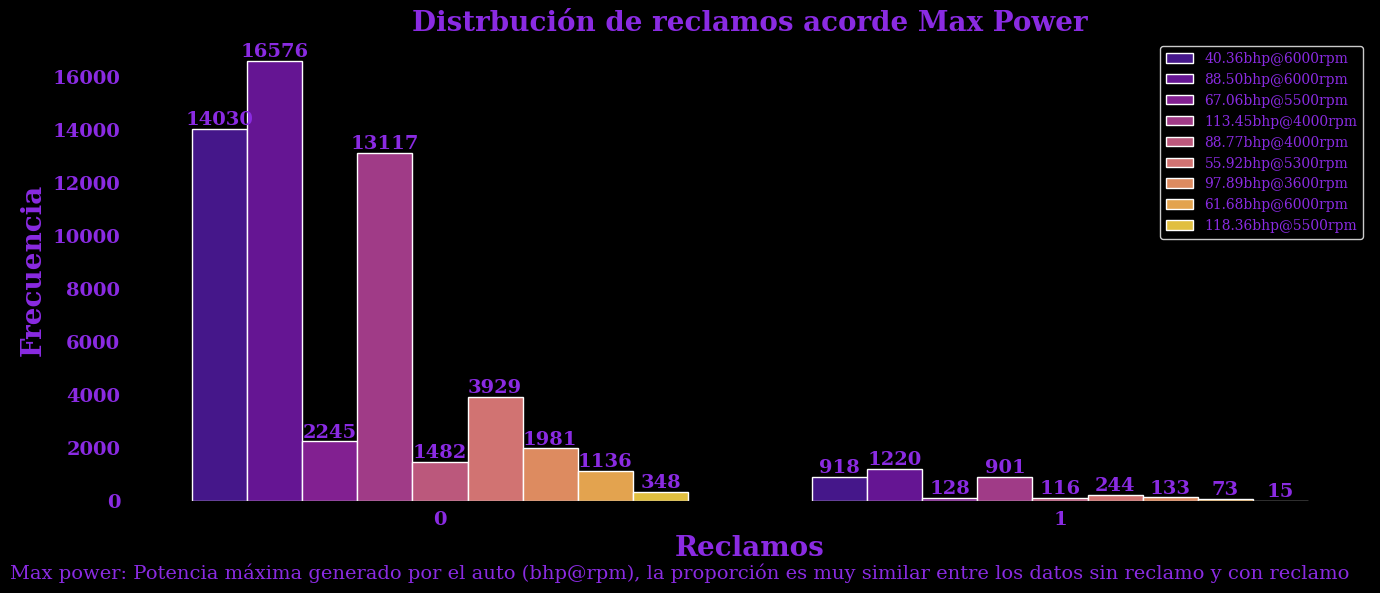

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16,6), facecolor="black")
#Tipo de letra
plt.rcParams['font.family'] = 'DejaVu Serif'
#Revisamos la proporción de reclamos
#x-->Variable a graficar
#data-->Dattos
#color-->Color de las barras
#edgecolor-->Color del borde de las barras
# Creamos una paleta de colores
colors = ['lime', 'red','orange']
#Width-->Grosor de barras
grafica=sns.countplot(x='is_claim',data=df, hue='max_power',
                      palette='plasma' ,edgecolor='white')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Reclamos',fontsize = 20,
           color = 'blueviolet',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Frecuencia',fontsize = 20,
           color = 'blueviolet',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='blueviolet',fontweight='bold')
plt.yticks(fontsize=14, color='blueviolet',fontweight='bold')
#Agregar el titulo con tamaño y color personalizados
#fontweight='bold'-->Negritas
plt.title('Distrbución de reclamos acorde Max Power',fontsize = 20,
          color = 'blueviolet',fontweight='bold')
#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=14,
                      color='blueviolet',fontweight='bold')
#Etiquetas para el parametro hue personalizados
plt.legend(
           facecolor='black',
           edgecolor='white',
           labelcolor='blueviolet',
           title_fontsize=12)

# Interpretación debajo del gráfico
plt.figtext(0.05, -0.02,
            "Max power: Potencia máxima generado por el auto (bhp@rpm), "
            "la proporción es muy similar entre los datos sin reclamo "
            "y con reclamo",
            fontsize=14, color='blueviolet')

# facecolor --> Color  de fondo
grafica.set_facecolor("black")
# Mostrar el gráfico
plt.show()

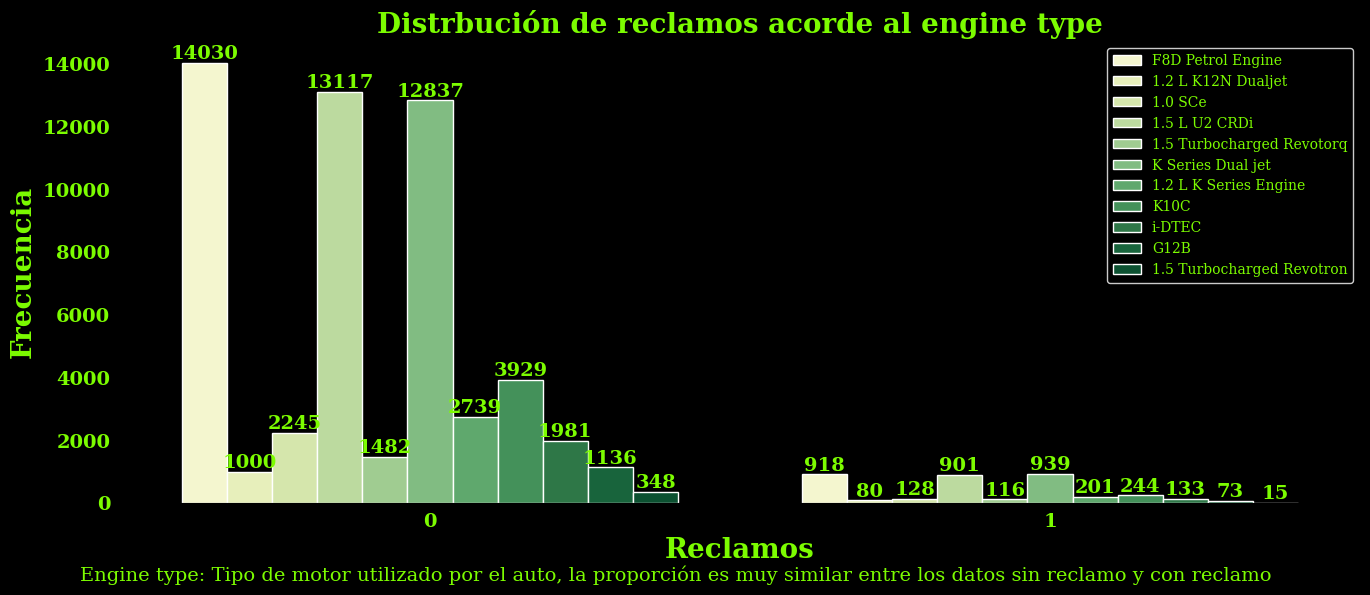

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16,6), facecolor="black")
#Tipo de letra
plt.rcParams['font.family'] = 'DejaVu Serif'
#Revisamos la proporción de reclamos
#x-->Variable a graficar
#data-->Dattos
#color-->Color de las barras
#edgecolor-->Color del borde de las barras
# Creamos una paleta de colores
colors = ['lime', 'red','orange']
#Width-->Grosor de barras
grafica=sns.countplot(x='is_claim',data=df, hue='engine_type',
                      palette='YlGn' ,edgecolor='white')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Reclamos',fontsize = 20,
           color = 'lawngreen',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Frecuencia',fontsize = 20,
           color = 'lawngreen',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='lawngreen',fontweight='bold')
plt.yticks(fontsize=14, color='lawngreen',fontweight='bold')
#Agregar el titulo con tamaño y color personalizados
#fontweight='bold'-->Negritas
plt.title('Distrbución de reclamos acorde al engine type',fontsize = 20,
          color = 'lawngreen',fontweight='bold')
#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=14,
                      color='lawngreen',fontweight='bold')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")
#Etiquetas para el parametro hue personalizados
plt.legend(
           facecolor='black',
           edgecolor='white',
           labelcolor='lawngreen',
           title_fontsize=12)

# Interpretación debajo del gráfico
plt.figtext(0.10, -0.02,
            "Engine type: Tipo de motor utilizado por el auto, "
            "la proporción es muy similar entre los datos sin reclamo "
            "y con reclamo",
            fontsize=14, color='lawngreen')

# Mostrar el gráfico
plt.show()

---
##**Definición de la variable objetivo (variable Y)**🚗💨
---

La variable objetivo es $Y=$ "is_claim" lo que se traduce como "es_reclamación" y se refiere a si el asegurado realizo una reclamación durante la vigencia de su póliza.

Esta variable es de vital importancia para la industria de los seguros en México, representa el riesgo que implica asegurar a un individuo o vehículo determinado,  una predicción correcta implica menos pérdidas económicas para la aseguradora


El evento que buscamos predecir es la probabilidad es que un auto sufra un siniestro, tiene una respuesta binaria (Si o no)

$$
Y= \begin{cases} 1 \ \text{Si el auto sufrió un siniestro} \\
   0 \ \text{Si el auto no sufrió un siniestro}
  \end{cases}
$$

In [ ]:
#Se define la variable objetivo como
Y=df.head(10).style.background_gradient(subset=['is_claim'], cmap='autumn')
Y

In [ ]:
#Variable Target
y = df['is_claim']
y

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: is_claim, Length: 58592, dtype: int64

In [ ]:
y.describe()

count    58592.000000
mean         0.063968
std          0.244698
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_claim, dtype: float64

In [ ]:
# Calcular el ratio de desequilibrio
r=df['is_claim'].value_counts()

ratio = r[0] / r[1]

round(ratio,4)

np.float64(14.6329)

<ipython-input-29-f217bd2589bf>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafica=sns.countplot(x='is_claim',data=df,palette=colors,edgecolor='white')


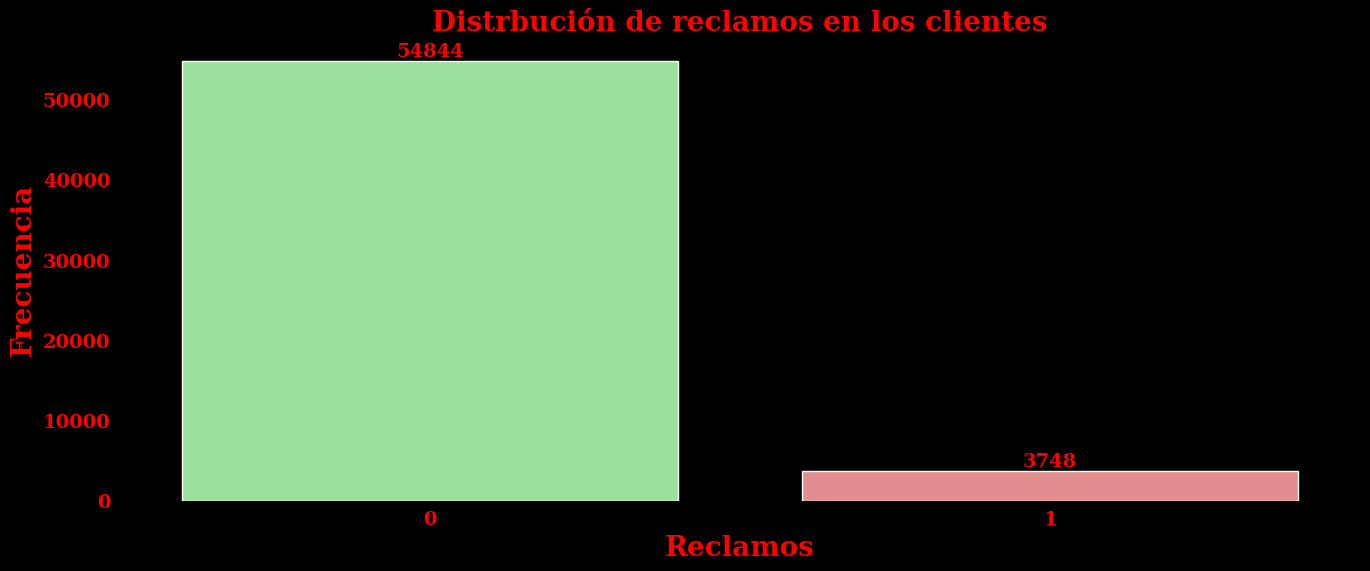

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16,6), facecolor="black")
#Tipo de letra
plt.rcParams['font.family'] = 'DejaVu Serif'
#Revisamos la proporción de reclamos
#x-->Variable a graficar
#data-->Dattos
#color-->Color de las barras
#edgecolor-->Color del borde de las barras
# Creamos una paleta de colores
colors = ['lightgreen', 'lightcoral']
#Width-->Grosor de barras
grafica=sns.countplot(x='is_claim',data=df,palette=colors,edgecolor='white')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Reclamos',fontsize = 20,
           color = 'red',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Frecuencia',fontsize = 20,
           color = 'red',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='red',fontweight='bold')
plt.yticks(fontsize=14, color='red',fontweight='bold')
#Agregar el titulo con tamaño y color personalizados
#fontweight='bold'-->Negritas
plt.title('Distrbución de reclamos en los clientes',fontsize = 20,
          color = 'red',fontweight='bold')
#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=14,
                      color='red',fontweight='bold')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")
# Eliminar bordes de la gráfica
#Borde superior
plt.gca().spines['top'].set_visible(False)
#Borde derecho
plt.gca().spines['right'].set_visible(False)
#Borde izquierdo
plt.gca().spines['left'].set_visible(False)
#Borde inferior
plt.gca().spines['bottom'].set_visible(False)
# Mostrar el gráfico
plt.show()

---
# **Limpieza de datos**🧼
---

---
## **Variables irrelevantes**🚓
---

In [ ]:
#Eliminar variables irrelevantes
df.drop('policy_id', axis=1, inplace=True)

In [ ]:
#Eliminar variables irrelevantes
df.drop('is_parking_sensors' ,axis=1,inplace=True)

In [ ]:
#Eliminar variables irrelevantes
df.drop('policy_tenure' ,axis=1,inplace=True)

In [ ]:
#Eliminar variables irrelevantes
df.drop('age_of_policyholder' ,axis=1,inplace=True)

---
## **Valores Nulos**🛠️
---

Representados por pandas como NaN (Not at Number) los **valores nulos** representan datos faltantes o indefinidos y requieren un manejo adecuado para evitar problemas en el análisis.

In [ ]:
# Cantidad de valores nulos que tenemos por columna
df.isnull().sum()
#No es necesario tratar los valores nulos por que no existen

age_of_car                          0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width                               0
height                              0
gross_weight                        0
is_front_fog_lights                 0
is_rear_window_wiper                0
is_rear_window_washer               0
is_rear_window_defogger             0
is_brake_assist                     0
is_power_door_locks                 0
is_central_locking                  0
is_power_steering                   0
is_driver_seat_height_adjustable    0
is_day_night_rear_view_mirror       0
is_ecw                              0
is_speed_alert                      0
ncap_rating                         0
is_claim                            0
dtype: int64

In [ ]:
# Cantidad de valores nulos que tenemos
df.isnull().sum().sum()
#No es necesario tratar los valores nulos por que no existen

np.int64(0)

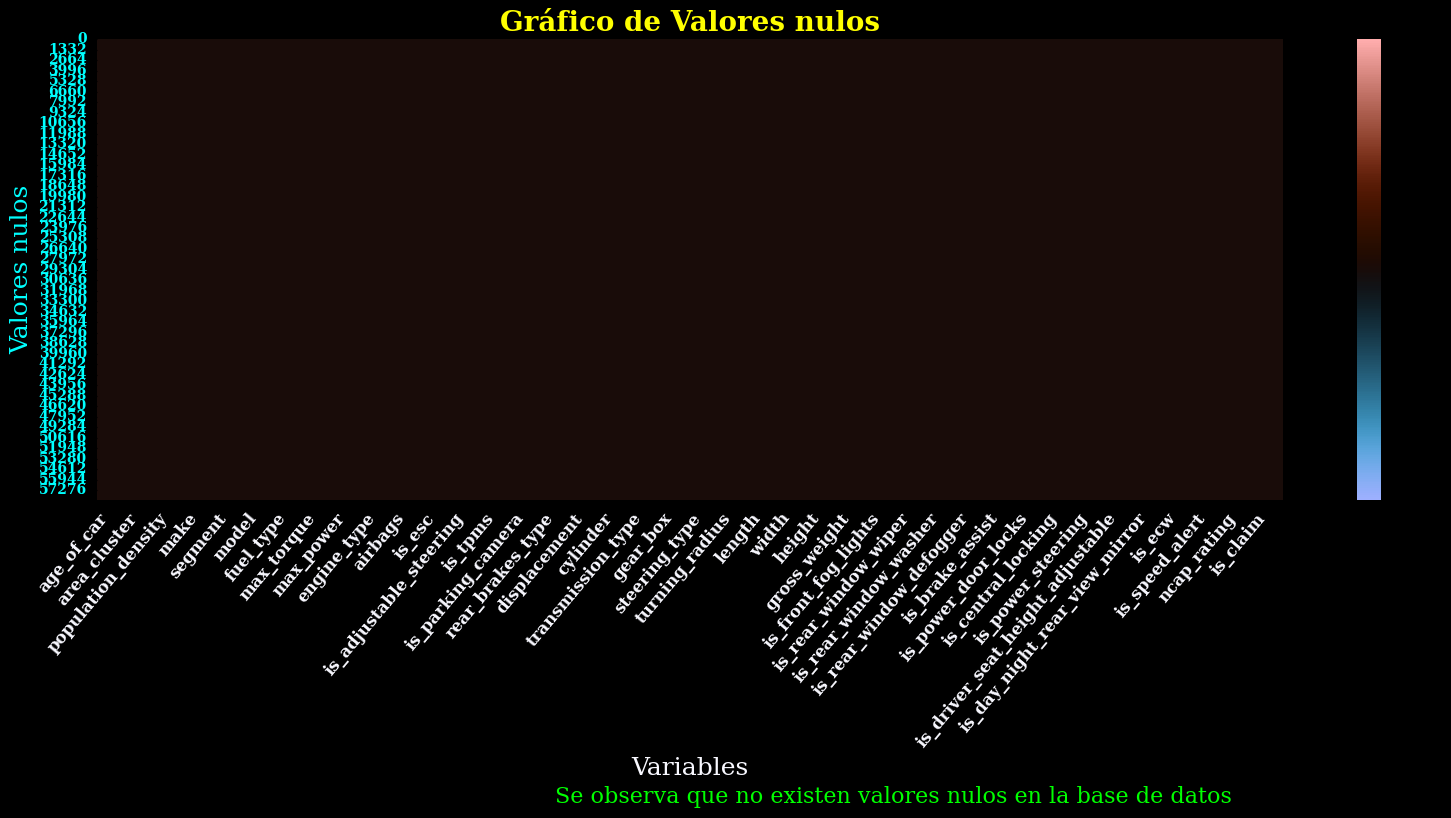

In [ ]:
#Gráfico para visualizar los valores nulos que hay en el dataset
#facecolor-->Color  de fondo
#figsize-->Tamaño del gráfico
plt.figure(figsize=(16,8), facecolor='black')
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Grafico para ver la proporción de valores nulos
sns.heatmap(df.isnull(), cmap='berlin')
# Agregr título
#fontweight='bold'-->Negritas
plt.title('Gráfico de Valores nulos',
          fontsize=20, color='yellow', fontweight='bold')
#Agregar etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='ghostwhite',
           rotation=50, ha='right',fontweight='bold')
plt.yticks(fontsize=10, color='cyan', fontweight='bold')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Variables',fontsize = 18, color = 'ghostwhite')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valores nulos',fontsize = 18, color = 'cyan')
#Agregar la interpretacion de la grafica
plt.figtext(0.35, -0.01, "Se observa que no existen valores nulos "
            "en la base de datos",
            fontsize = 16, color='lime')
# Mostrar  gráfico
plt.tight_layout()
plt.show()

---
## **Outliners**🚨
---

Un **valor atípico (outliner)** es un valor de datos que se desvía significativamente del resto de los valores, es decir, una observación con un valor mucho más grande o pequeño que el resto de los valores en el conjunto de datos

Los outliners influyen a que los modelos de regresión no generalicen bien y tengan conclusiones erróneas por eso deben de ser tratados en el conjunto de datos

In [ ]:
#Variables numéricas
df_numericas= df.select_dtypes(include=['int64','float64']).columns.tolist()
df_numericas

['age_of_car',
 'population_density',
 'make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'is_claim']

In [ ]:
#Cardinalidad de la lista
len(df_numericas)

14

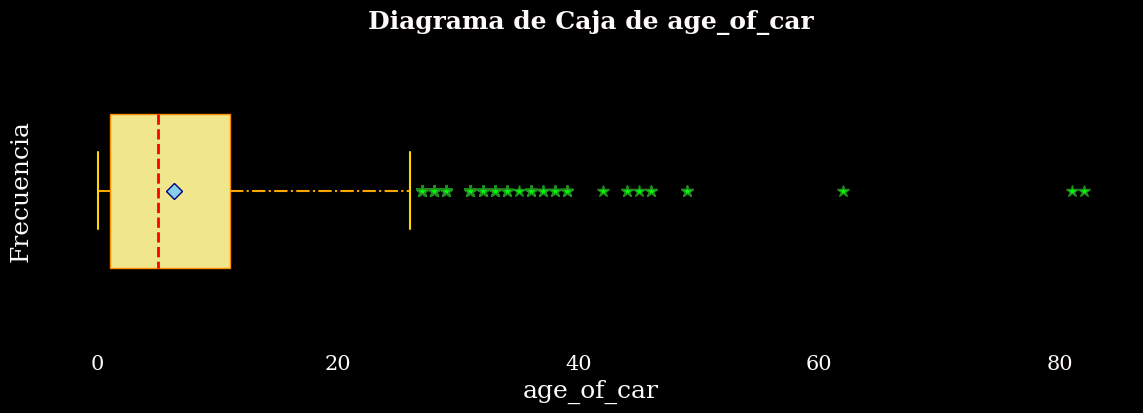

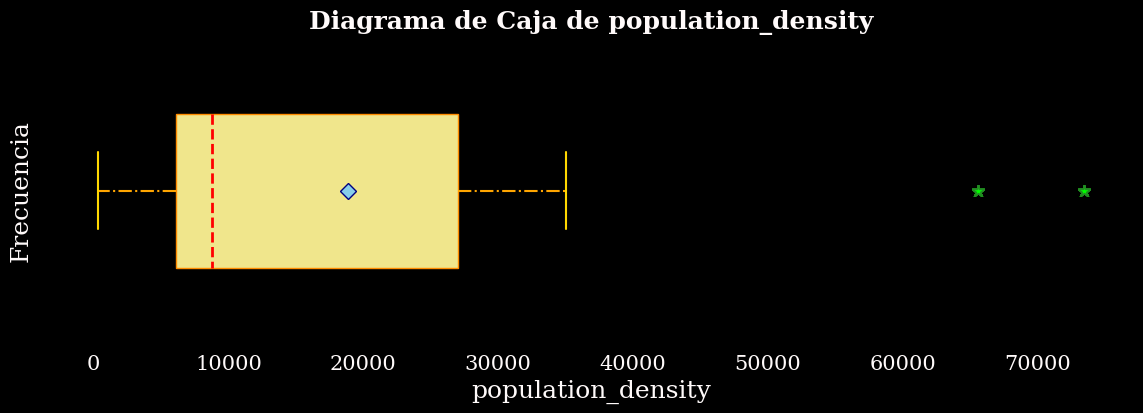

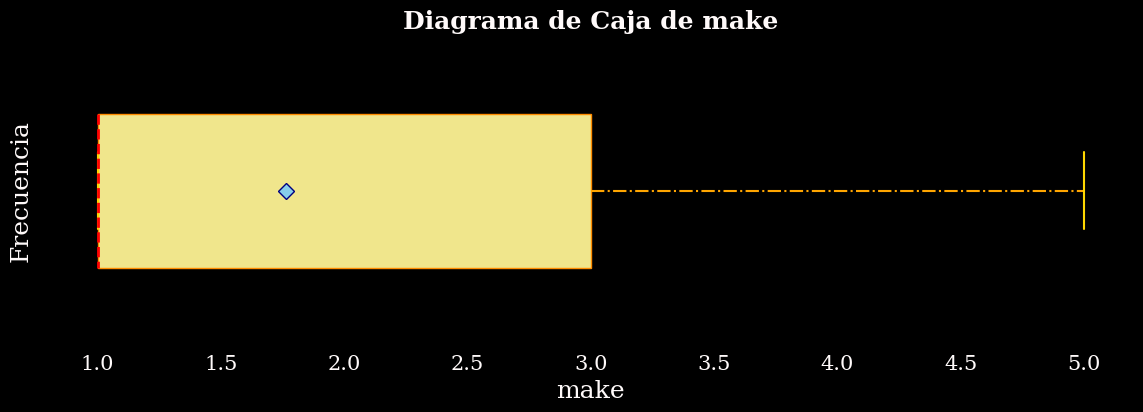

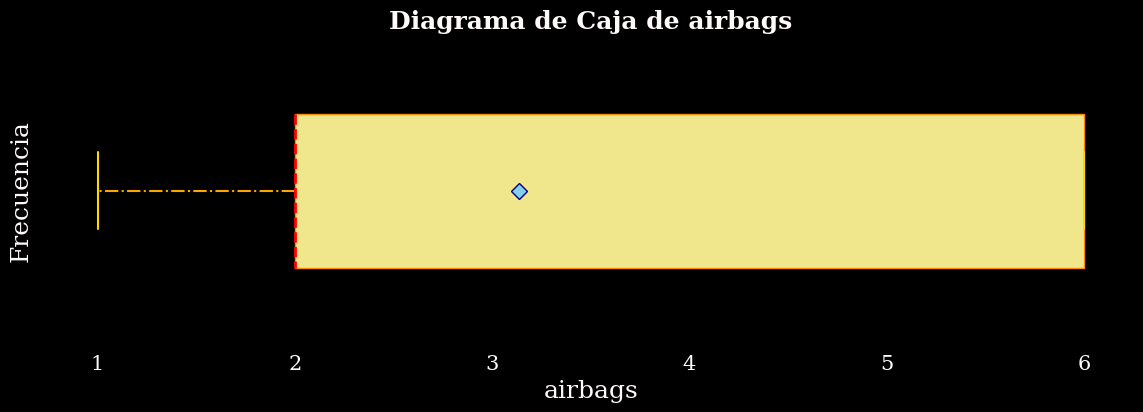

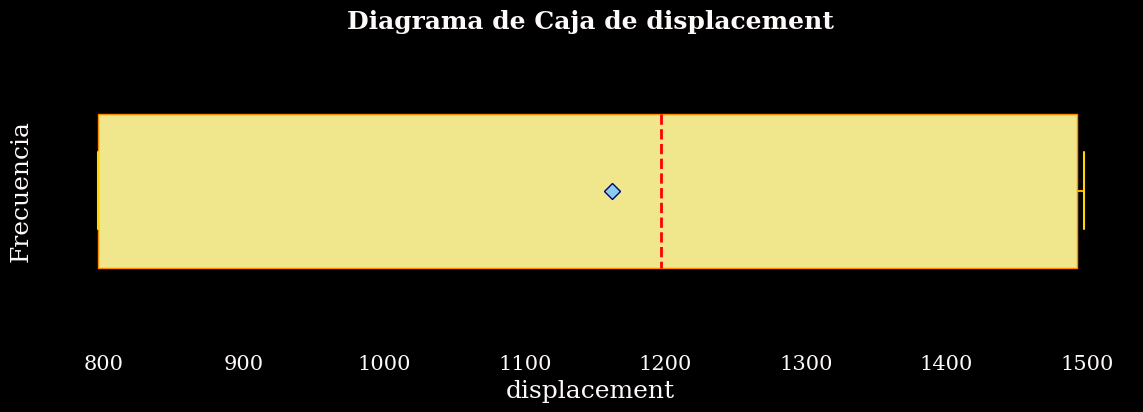

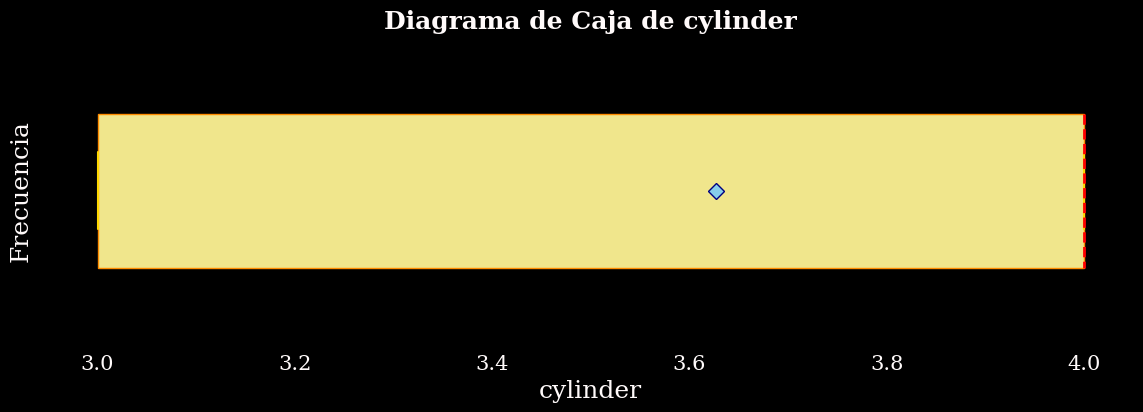

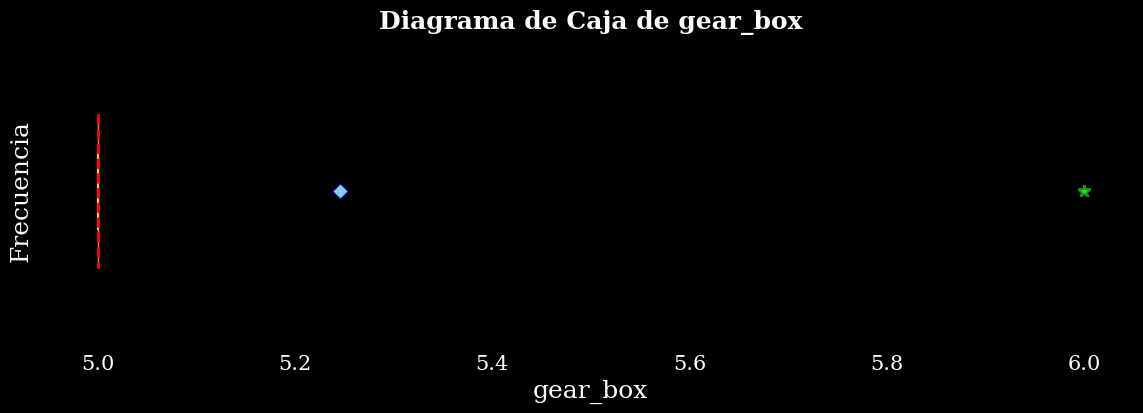

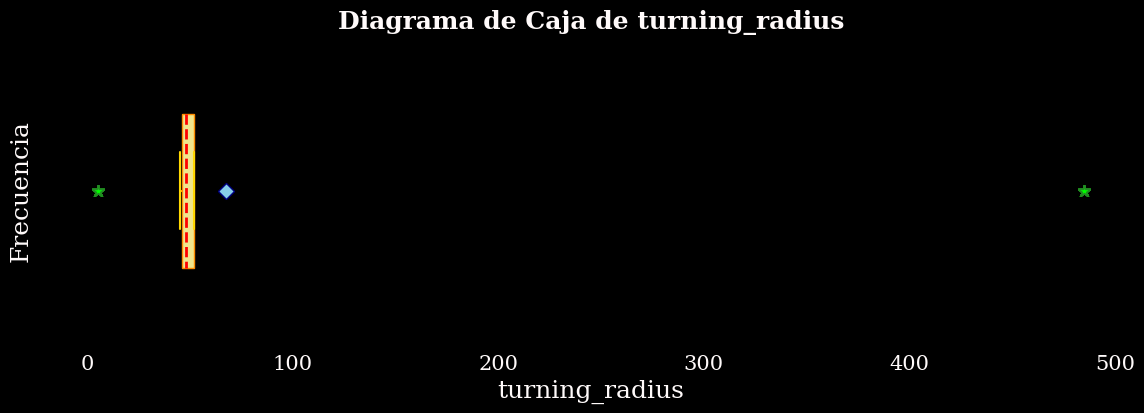

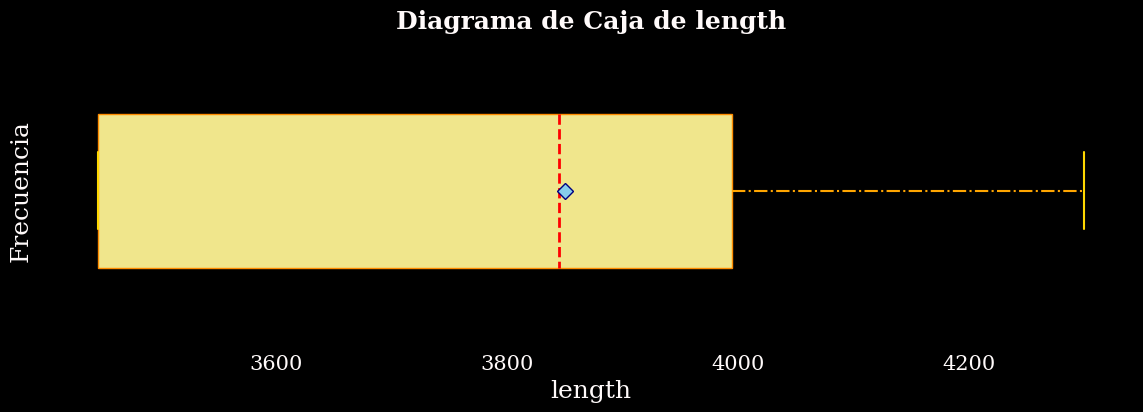

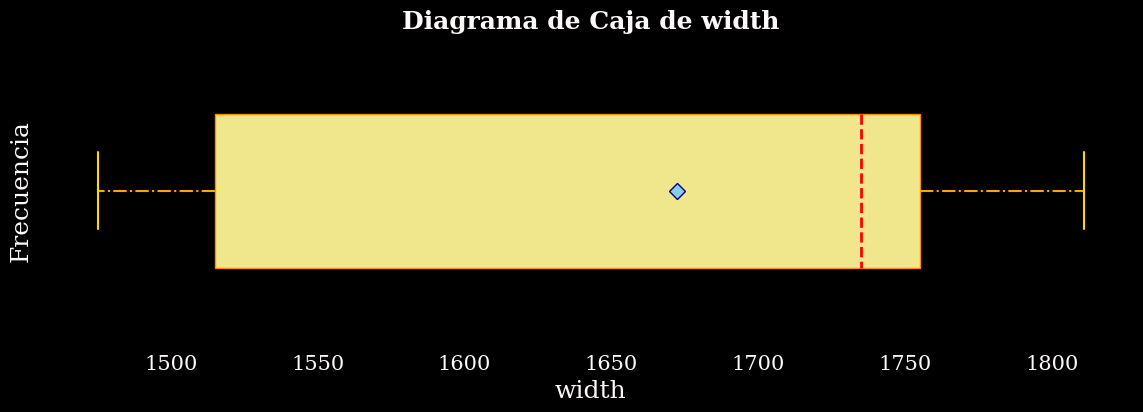

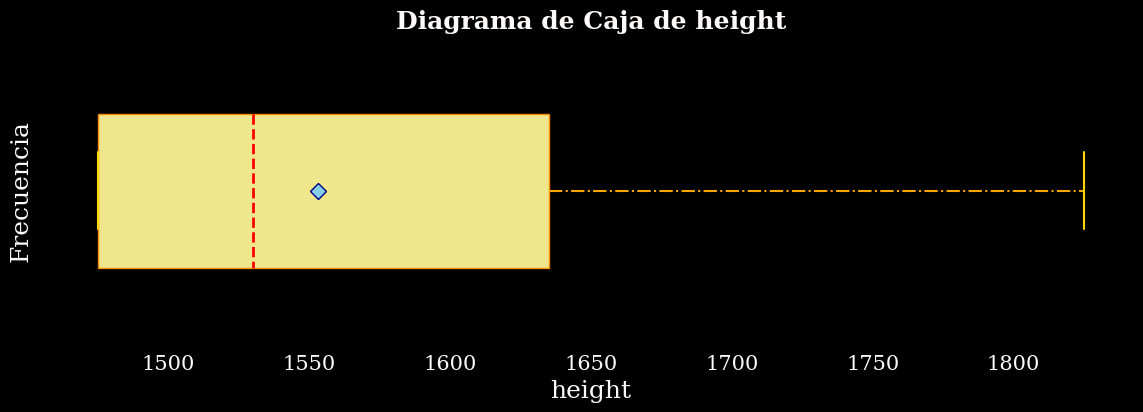

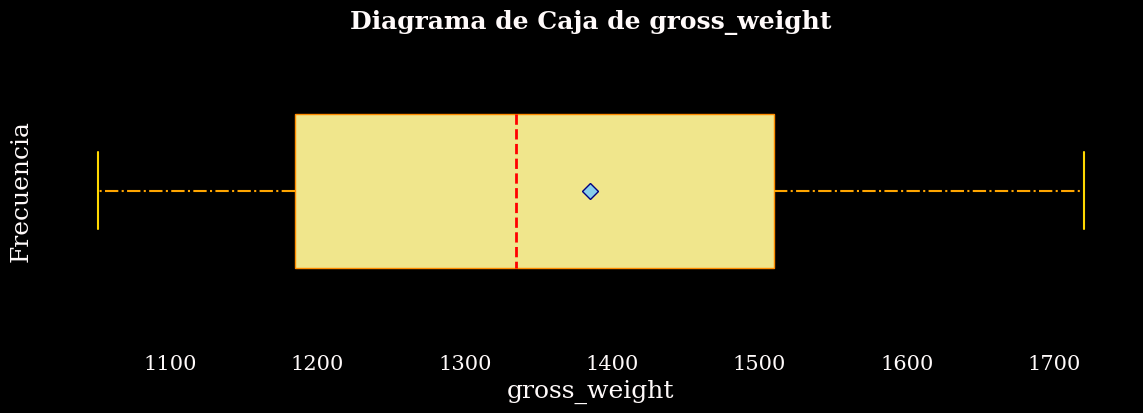

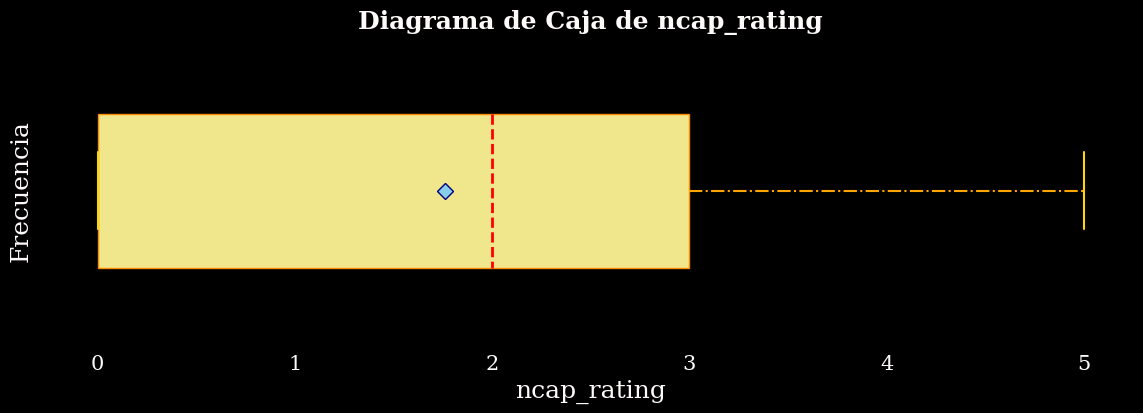

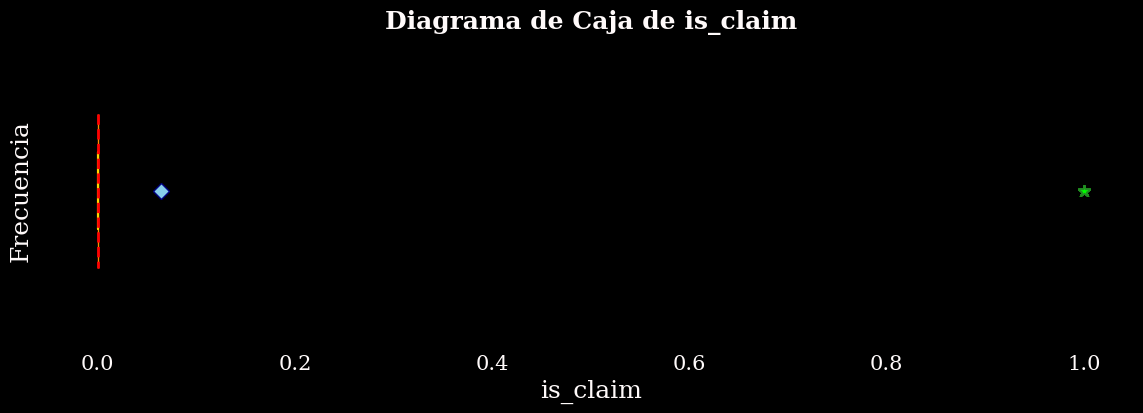

In [ ]:
for i in df_numericas:
  #2)Dataframe del asegurado
  # Creaamos la figura y ajustar el tamaño
  # facecolor--> color  de fondo
  plt.figure(figsize=(14,4), facecolor='black')
  #Ajustamos el estilo del gráfico
  sns.set_style("white")
  #plt.rcParams['font.family']-->Tipo de letra para el gráfico
  plt.rcParams['font.family'] = 'DejaVu Serif'
  # Creamos el diagrama de caja
  #datos=df_ci--> datos para hacer el diagrama
  #x='population_density'-->variable sobre la que se hace el diagrama de caja
  #dict(facecolor='red', color='khaki'), -->  color de la caja
  #whiskerprops=dict(color='navy'),--> Lineas horizontales
  #capprops=dict(color='black'),--> Lineas verticales
  #flierprops=dict(markerfacecolor='lime', markeredgecolor='forestgreen'--> Valores atípicos
  #width=0.5 -->Largo de la caja
  #showmeans=True-->Muestra la media
  #medianprops=dict(color='red')--> Mediana
  #meanprops=dict(marker='D', markersize=8,)-->Media
  grafica= sns.boxplot(data=df, x=df[i],showmeans=True, width=0.5,
  #Colores dela caja
              boxprops=dict(facecolor='khaki', edgecolor='darkorange'),
  #Lineas verticales
              whiskerprops=dict(color='orange',linewidth=1.5,linestyle='dashdot'),
  #Lineas horizontales
              capprops=dict(color='gold',linewidth=1.5,linestyle='solid'),
  #Valores atípicos
              flierprops=dict(marker='*', markersize=9,markerfacecolor='lime',
                              markeredgecolor='forestgreen'),
  #Mostrar la mediana
              medianprops=dict(color='red', linewidth=2,linestyle="dashed"),
  #Mostrar la media
              meanprops=dict(marker='D', markersize=8,
                            markerfacecolor='skyblue', markeredgecolor='navy')
              )
  # Eliminar bordes de la gráfica
  #Borde superior
  plt.gca().spines['top'].set_visible(False)
  #Borde derecho
  plt.gca().spines['right'].set_visible(False)
  #Borde izquierdo
  plt.gca().spines['left'].set_visible(False)
  #Borde inferior
  plt.gca().spines['bottom'].set_visible(False)

  # facecolor-->' color  de fondo
  grafica.set_facecolor('black')
  # Agregamos el título
  #fontweight='bold'-->Negritas
  plt.title(f'Diagrama de Caja de {i}',
            fontsize=18, color='snow', fontweight='bold')
  #Agregamos las etiquetas de los valores del eje X
  plt.xticks(fontsize=15, color='snow')
  # Etiquetamos los ejes
  plt.xlabel(i, fontsize=18, color='snow')
  plt.ylabel('Frecuencia', fontsize=18, color='snow')
  # Mostramos el gráfico
  plt.show()

In [ ]:
#Se eliminan los outliners
df = df[(df['turning_radius'] >= 40) & (df['turning_radius'] <= 60)]
df = df[(df['age_of_car'] >= 0) & (df['age_of_car'] <= 20)]
#df = df[(df['age_of_policyholder'] >= 1000) & (df['age_of_policyholder'] <= 800000000000000)]
df = df[df['population_density']<=40000]

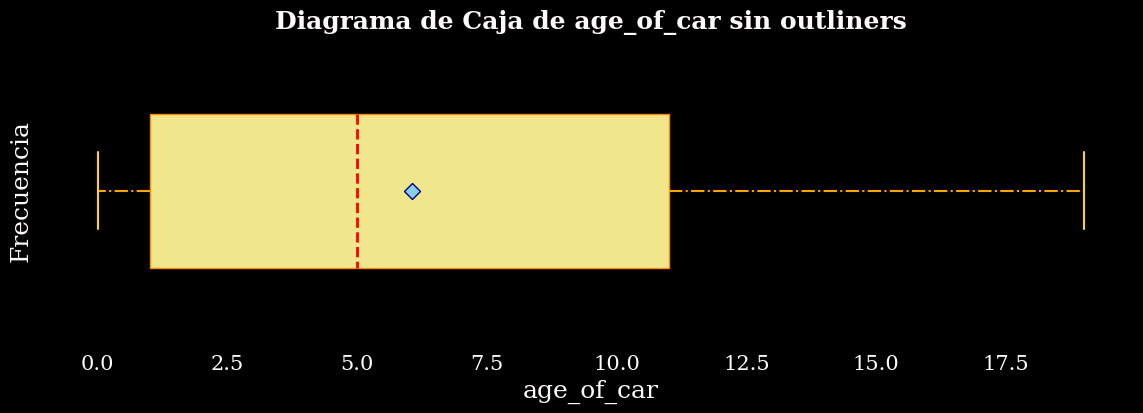

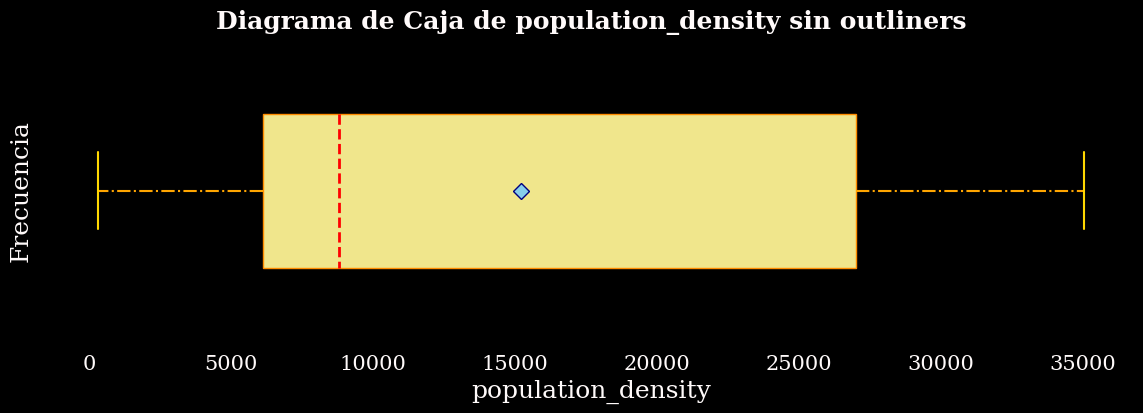

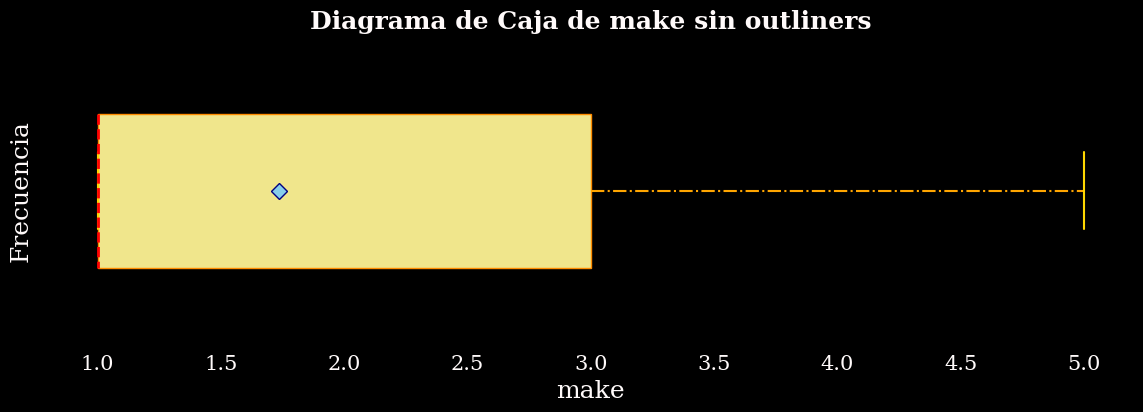

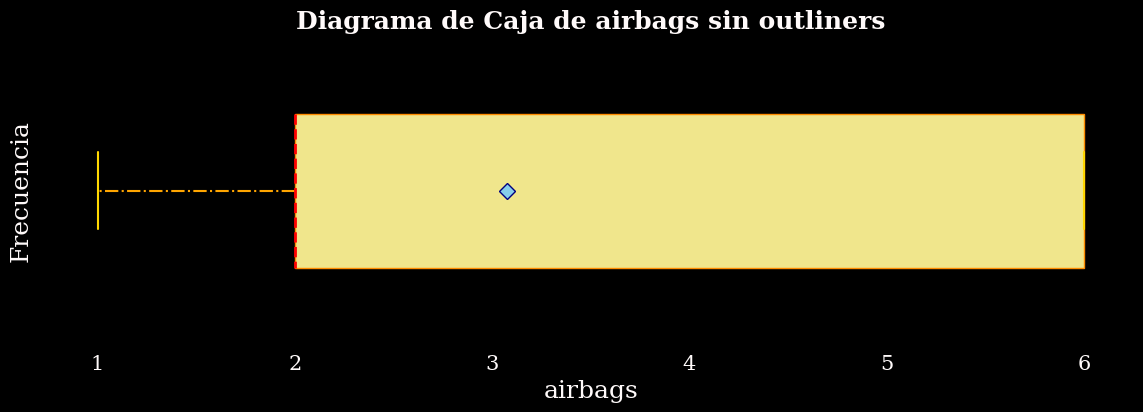

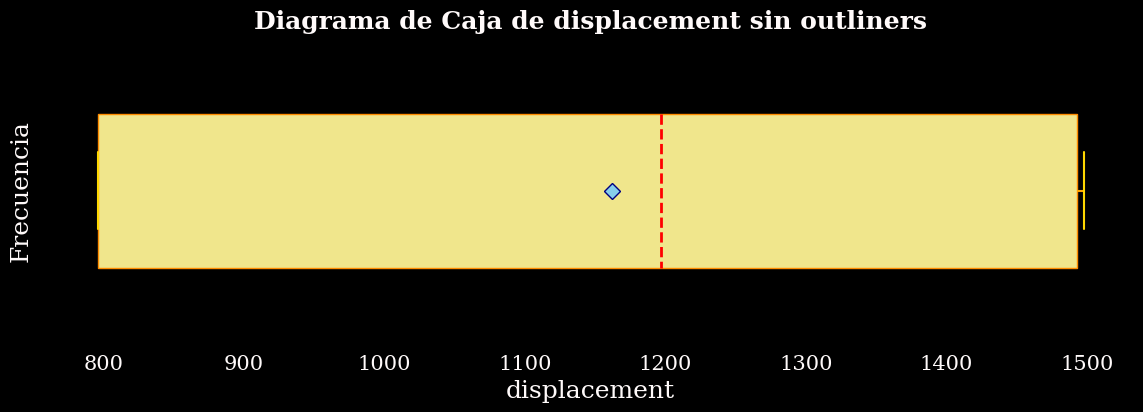

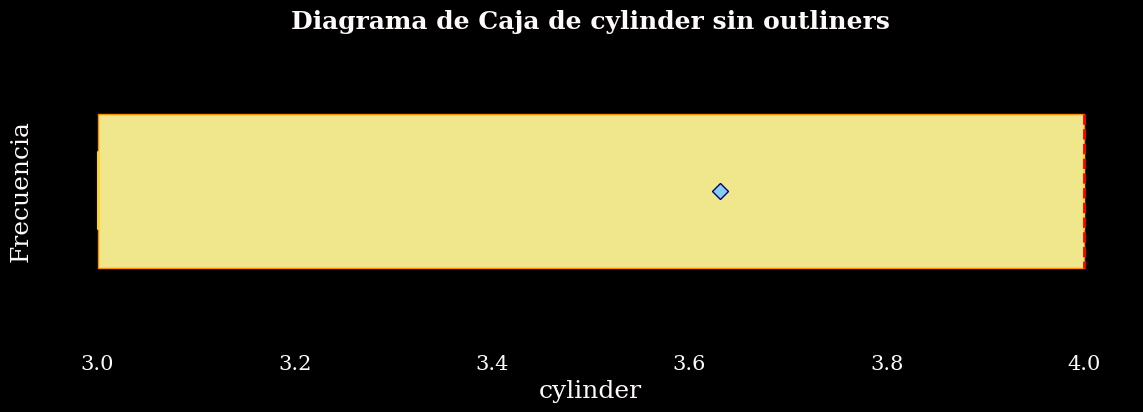

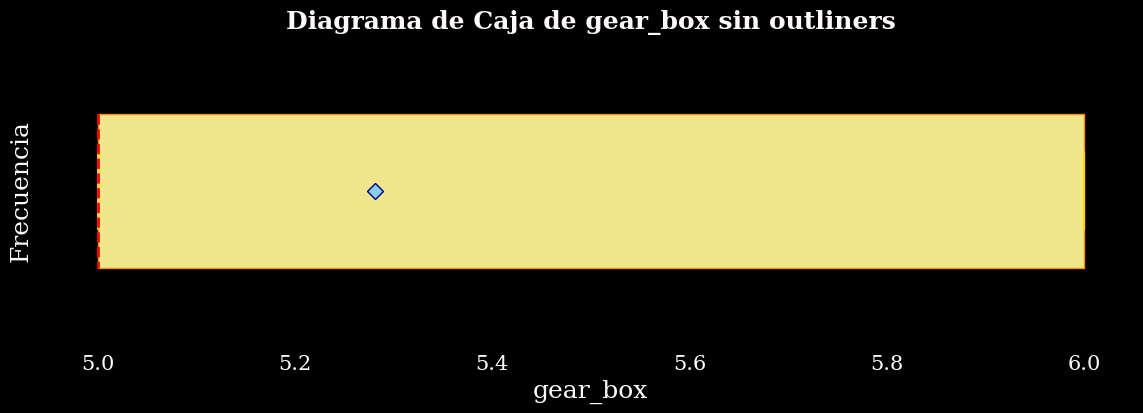

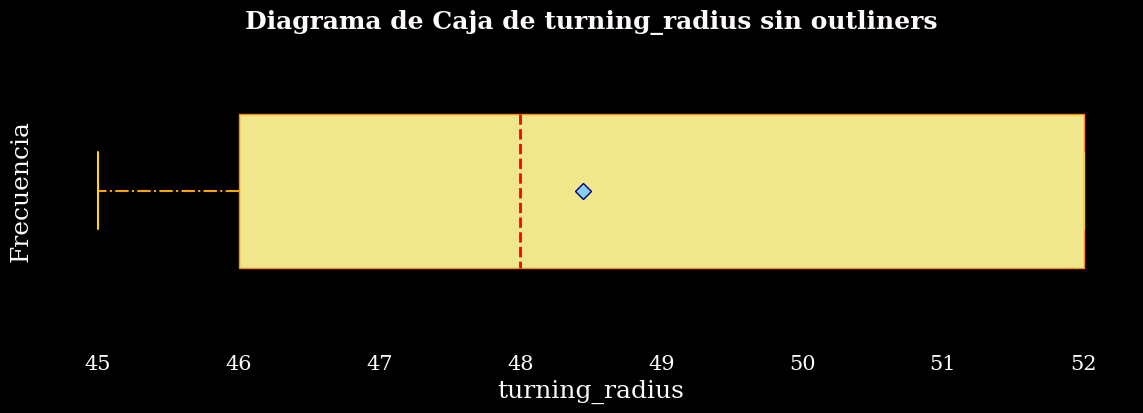

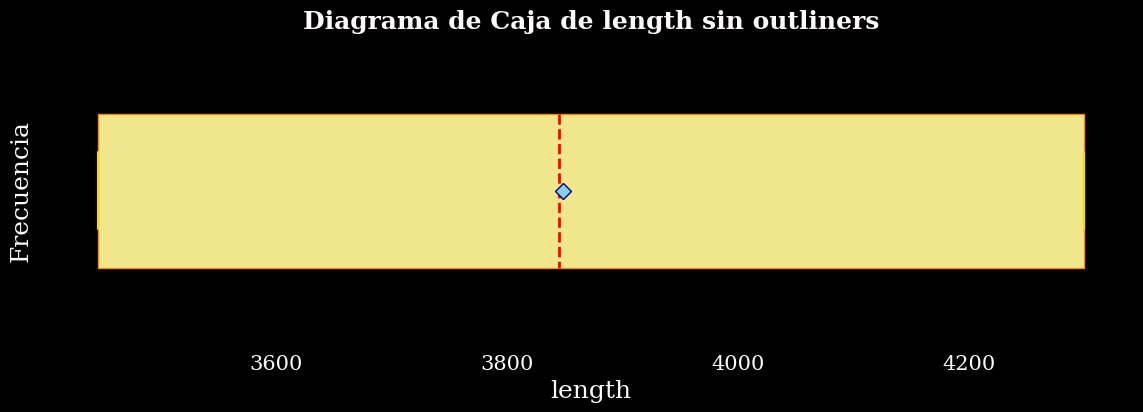

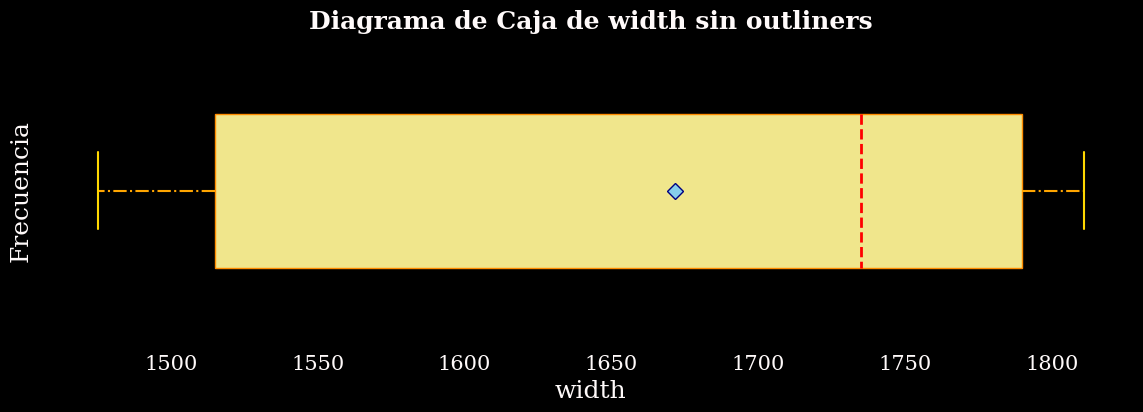

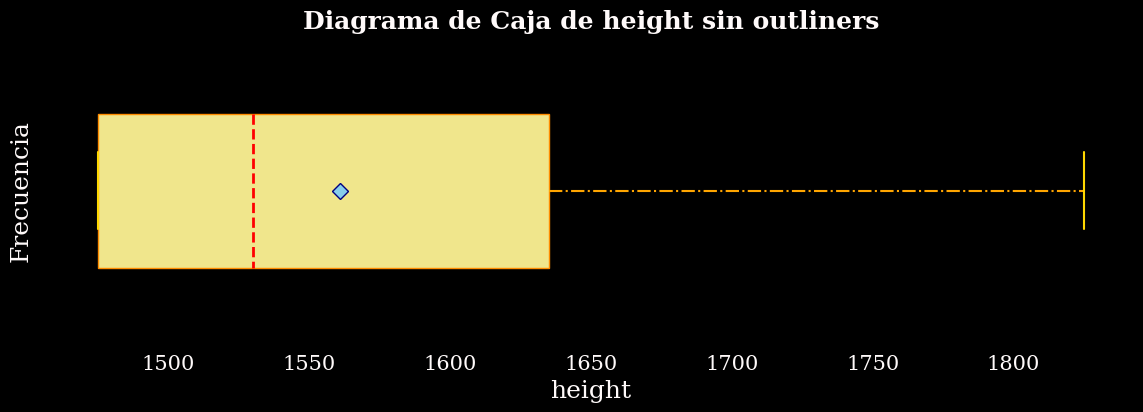

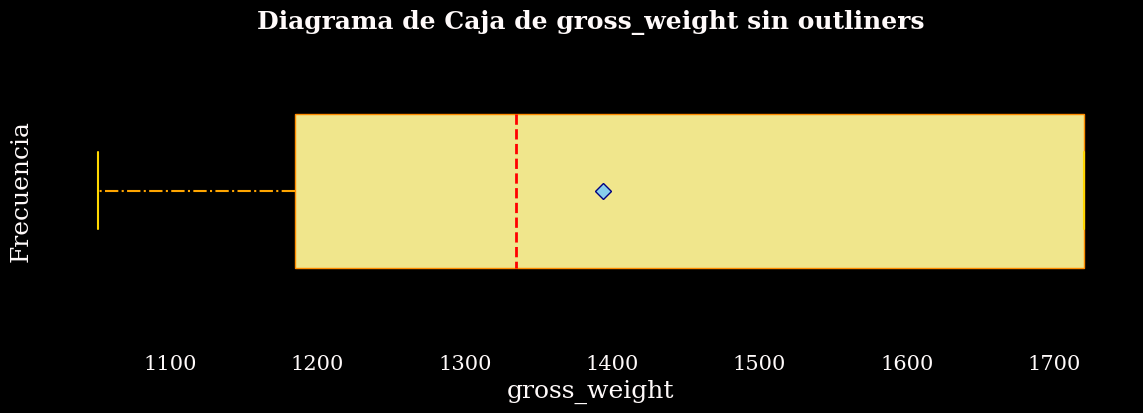

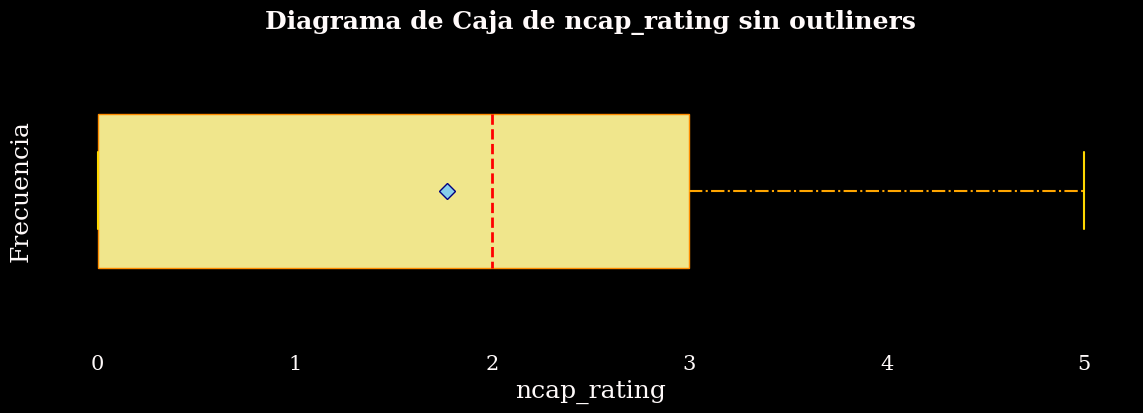

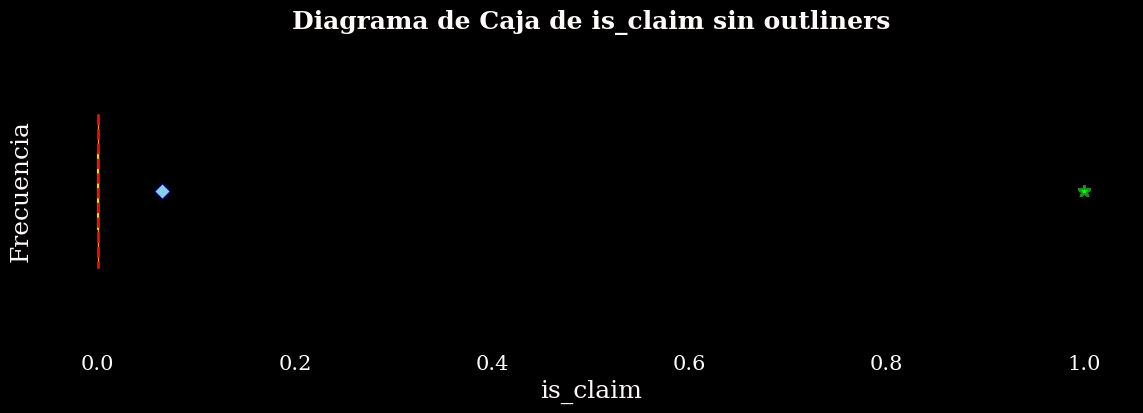

In [ ]:
#Se comprueba que se eliminaron los outliners
for i in df_numericas:
  #2)Dataframe del asegurado
  # Creaamos la figura y ajustar el tamaño
  # facecolor--> color  de fondo
  plt.figure(figsize=(14,4), facecolor='black')
  #Ajustamos el estilo del gráfico
  sns.set_style("white")
  #plt.rcParams['font.family']-->Tipo de letra para el gráfico
  plt.rcParams['font.family'] = 'DejaVu Serif'
  # Creamos el diagrama de caja
  #datos=df_ci--> datos para hacer el diagrama
  #x='population_density'-->variable sobre la que se hace el diagrama de caja
  #dict(facecolor='red', color='khaki'), -->  color de la caja
  #whiskerprops=dict(color='navy'),--> Lineas horizontales
  #capprops=dict(color='black'),--> Lineas verticales
  #flierprops=dict(markerfacecolor='lime', markeredgecolor='forestgreen'--> Valores atípicos
  #width=0.5 -->Largo de la caja
  #showmeans=True-->Muestra la media
  #medianprops=dict(color='red')--> Mediana
  #meanprops=dict(marker='D', markersize=8,)-->Media
  grafica= sns.boxplot(data=df, x=df[i],showmeans=True, width=0.5,
  #Colores dela caja
              boxprops=dict(facecolor='khaki', edgecolor='darkorange'),
  #Lineas verticales
              whiskerprops=dict(color='orange',linewidth=1.5,linestyle='dashdot'),
  #Lineas horizontales
              capprops=dict(color='gold',linewidth=1.5,linestyle='solid'),
  #Valores atípicos
              flierprops=dict(marker='*', markersize=9,markerfacecolor='lime',
                              markeredgecolor='forestgreen'),
  #Mostrar la mediana
              medianprops=dict(color='red', linewidth=2,linestyle="dashed"),
  #Mostrar la media
              meanprops=dict(marker='D', markersize=8,
                            markerfacecolor='skyblue', markeredgecolor='navy')
              )
  # Eliminar bordes de la gráfica
  #Borde superior
  plt.gca().spines['top'].set_visible(False)
  #Borde derecho
  plt.gca().spines['right'].set_visible(False)
  #Borde izquierdo
  plt.gca().spines['left'].set_visible(False)
  #Borde inferior
  plt.gca().spines['bottom'].set_visible(False)

  # facecolor-->' color  de fondo
  grafica.set_facecolor('black')
  # Agregamos el título
  #fontweight='bold'-->Negritas
  plt.title(f'Diagrama de Caja de {i} sin outliners',
            fontsize=18, color='snow', fontweight='bold')
  #Agregamos las etiquetas de los valores del eje X
  plt.xticks(fontsize=15, color='snow')
  # Etiquetamos los ejes
  plt.xlabel(i, fontsize=18, color='snow')
  plt.ylabel('Frecuencia', fontsize=18, color='snow')
  # Mostramos el gráfico
  plt.show()

In [ ]:
#Registros sin outliners
df.shape

(47863, 40)

In [ ]:
#Data frame con variables numéricas
dflg= df.select_dtypes(include=['int64','float64'])
dflg

age_of_car  population_density  make  airbags  displacement  cylinder  \
0               5                4990     1        2           796         3   
1               2               27003     1        2           796         3   
2               2                4076     1        2           796         3   
3              11               21622     1        2          1197         4   
5               7               13051     3        6          1493         4   
...           ...                 ...   ...      ...           ...       ...   
58586           7                4076     3        6          1493         4   
58588           2                7788     1        2           796         3   
58589           5               34738     1        2           796         3   
58590          14                8794     1        2          1197         4   
58591           2                8794     3        6          1493         4   

       gear_box  turning_radius  length  width  height  gross_weight  \
0             5              46    3445   1515    1475          1185   
1             5              46    3445   1515    1475          1185   
2             5              46    3445   1515    1475          1185   
3             5              48    3995   1735    1515          1335   
5             6              52    4300   1790    1635          1720   
...         ...             ...     ...    ...     ...           ...   
58586         6              52    4300   1790    1635          1720   
58588         5              46    3445   1515    1475          1185   
58589         5              46    3445   1515    1475          1185   
58590         5              48    3845   1735    1530          1335   
58591         6              52    4300   1790    1635          1720   

       ncap_rating  is_claim  
0                0         0  
1                0         0  
2                0         0  
3                2         0  
5                3         0  
...            ...       ...  
58586            3         0  
58588            0         0  
58589            0         0  
58590            2         0  
58591            3         0  

[47863 rows x 14 columns]

In [ ]:
#Dimension de los datos logísticos
dflg.shape

(47863, 14)

---
## **Conversión a variables númericas** 🔢
---

In [ ]:
#Reemplazar los valores de "No" por 0 y de "Yes" por 1
df = df.replace({'No': 0, 'Yes': 1})

<ipython-input-45-b7effa1741d0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'No': 0, 'Yes': 1})


In [ ]:
#Mostrar los datos
df.head(5)

age_of_car area_cluster  population_density  make segment model fuel_type  \
0           5           C1                4990     1       A    M1       CNG   
1           2           C2               27003     1       A    M1       CNG   
2           2           C3                4076     1       A    M1       CNG   
3          11           C4               21622     1      C1    M2    Petrol   
5           7           C6               13051     3      C2    M4    Diesel   

      max_torque          max_power         engine_type  airbags  is_esc  \
0   60Nm@3500rpm   40.36bhp@6000rpm   F8D Petrol Engine        2       0   
1   60Nm@3500rpm   40.36bhp@6000rpm   F8D Petrol Engine        2       0   
2   60Nm@3500rpm   40.36bhp@6000rpm   F8D Petrol Engine        2       0   
3  113Nm@4400rpm   88.50bhp@6000rpm  1.2 L K12N Dualjet        2       1   
5  250Nm@2750rpm  113.45bhp@4000rpm       1.5 L U2 CRDi        6       1   

   is_adjustable_steering  is_tpms  is_parking_camera rear_brakes_type  \
0                       0        0                  0             Drum   
1                       0        0                  0             Drum   
2                       0        0                  0             Drum   
3                       1        0                  1             Drum   
5                       1        1                  1             Disc   

   displacement  cylinder transmission_type  gear_box steering_type  \
0           796         3            Manual         5         Power   
1           796         3            Manual         5         Power   
2           796         3            Manual         5         Power   
3          1197         4         Automatic         5      Electric   
5          1493         4         Automatic         6         Power   

   turning_radius  length  width  height  gross_weight  is_front_fog_lights  \
0              46    3445   1515    1475          1185                    0   
1              46    3445   1515    1475          1185                    0   
2              46    3445   1515    1475          1185                    0   
3              48    3995   1735    1515          1335                    1   
5              52    4300   1790    1635          1720                    1   

   is_rear_window_wiper  is_rear_window_washer  is_rear_window_defogger  \
0                     0                      0                        0   
1                     0                      0                        0   
2                     0                      0                        0   
3                     0                      0                        1   
5                     1                      1                        1   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0                0                    0                   0   
1                0                    0                   0   
2                0                    0                   0   
3                1                    1                   1   
5                1                    1                   1   

   is_power_steering  is_driver_seat_height_adjustable  \
0                  1                                 0   
1                  1                                 0   
2                  1                                 0   
3                  1                                 1   
5                  1                                 1   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1            0   
1                              0       0               1            0   
2                              0       0               1            0   
3                              1       1               1            2   
5                              0       1               1            3   

   is_claim  
0         0  
1         0  
2         0  
3         0  
5         0

In [ ]:
#Corroborar las variables se conviriteron en numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47863 entries, 0 to 58591
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   age_of_car                        47863 non-null  int64 
 1   area_cluster                      47863 non-null  object
 2   population_density                47863 non-null  int64 
 3   make                              47863 non-null  int64 
 4   segment                           47863 non-null  object
 5   model                             47863 non-null  object
 6   fuel_type                         47863 non-null  object
 7   max_torque                        47863 non-null  object
 8   max_power                         47863 non-null  object
 9   engine_type                       47863 non-null  object
 10  airbags                           47863 non-null  int64 
 11  is_esc                            47863 non-null  int64 
 12  is_adjustable_steering 

In [ ]:
#Crear un dataframe con las variables que aún no son numéricas
df_o=df.select_dtypes(include=['object']).columns.tolist()
#Mostrar las 5 primeras filas del dataframe
df_o


['area_cluster',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'rear_brakes_type',
 'transmission_type',
 'steering_type']

In [ ]:
len(df_o)

10

---
### **Variables categóricas a variables númericas mediante variables dummies**💎
---

**pd.get_dummies(df, columns=[$x$], drop_first=True)** Convierte en variables dummies la columna $x$ del dataframe 'df' y elimina la colinealidad con drop_first=True

In [ ]:
#Convertir las variables categóricas en variables dummy
#pd.get_dummies <--lo convierte con variables dummies
#df, -->Datos
#columns=->Columnas que se convertiran en dummies
#drop_first=True-->Elimina la colinealidad
df = pd.get_dummies(df, columns=df_o, drop_first=True)
#Mortrar las 5 filas del dataframe nuevo
df.head(5)

age_of_car  population_density  make  airbags  is_esc  \
0           5                4990     1        2       0   
1           2               27003     1        2       0   
2           2                4076     1        2       0   
3          11               21622     1        2       1   
5           7               13051     3        6       1   

   is_adjustable_steering  is_tpms  is_parking_camera  displacement  cylinder  \
0                       0        0                  0           796         3   
1                       0        0                  0           796         3   
2                       0        0                  0           796         3   
3                       1        0                  1          1197         4   
5                       1        1                  1          1493         4   

   gear_box  turning_radius  length  width  height  gross_weight  \
0         5              46    3445   1515    1475          1185   
1         5              46    3445   1515    1475          1185   
2         5              46    3445   1515    1475          1185   
3         5              48    3995   1735    1515          1335   
5         6              52    4300   1790    1635          1720   

   is_front_fog_lights  is_rear_window_wiper  is_rear_window_washer  \
0                    0                     0                      0   
1                    0                     0                      0   
2                    0                     0                      0   
3                    1                     0                      0   
5                    1                     1                      1   

   is_rear_window_defogger  is_brake_assist  is_power_door_locks  \
0                        0                0                    0   
1                        0                0                    0   
2                        0                0                    0   
3                        1                1                    1   
5                        1                1                    1   

   is_central_locking  is_power_steering  is_driver_seat_height_adjustable  \
0                   0                  1                                 0   
1                   0                  1                                 0   
2                   0                  1                                 0   
3                   1                  1                                 1   
5                   1                  1                                 1   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1            0   
1                              0       0               1            0   
2                              0       0               1            0   
3                              1       1               1            2   
5                              0       1               1            3   

   is_claim  area_cluster_C11  area_cluster_C12  area_cluster_C13  \
0         0             False             False             False   
1         0             False             False             False   
2         0             False             False             False   
3         0             False             False             False   
5         0             False             False             False   

   area_cluster_C14  area_cluster_C15  area_cluster_C16  area_cluster_C18  \
0             False             False             False             False   
1             False             False             False             False   
2             False             False             False             False   
3             False             False             False             False   
5             False             False             False             False   

   area_cluster_C19  area_cluster_C2  area_cluster_C20  area_cluster_C21  \
0             False            False            

In [ ]:
#Reemplazamos los valores de False por 0 y de True por 1
#Nota se eliminan las comillas ('') por que son valores booleanos no string
df = df.replace({False: 0, True: 1})
#Muestra las 5 filas del dataframe nuevo
df.head(5)


<ipython-input-51-7840cb1d1c62>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({False: 0, True: 1})


age_of_car  population_density  make  airbags  is_esc  \
0           5                4990     1        2       0   
1           2               27003     1        2       0   
2           2                4076     1        2       0   
3          11               21622     1        2       1   
5           7               13051     3        6       1   

   is_adjustable_steering  is_tpms  is_parking_camera  displacement  cylinder  \
0                       0        0                  0           796         3   
1                       0        0                  0           796         3   
2                       0        0                  0           796         3   
3                       1        0                  1          1197         4   
5                       1        1                  1          1493         4   

   gear_box  turning_radius  length  width  height  gross_weight  \
0         5              46    3445   1515    1475          1185   
1         5              46    3445   1515    1475          1185   
2         5              46    3445   1515    1475          1185   
3         5              48    3995   1735    1515          1335   
5         6              52    4300   1790    1635          1720   

   is_front_fog_lights  is_rear_window_wiper  is_rear_window_washer  \
0                    0                     0                      0   
1                    0                     0                      0   
2                    0                     0                      0   
3                    1                     0                      0   
5                    1                     1                      1   

   is_rear_window_defogger  is_brake_assist  is_power_door_locks  \
0                        0                0                    0   
1                        0                0                    0   
2                        0                0                    0   
3                        1                1                    1   
5                        1                1                    1   

   is_central_locking  is_power_steering  is_driver_seat_height_adjustable  \
0                   0                  1                                 0   
1                   0                  1                                 0   
2                   0                  1                                 0   
3                   1                  1                                 1   
5                   1                  1                                 1   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1            0   
1                              0       0               1            0   
2                              0       0               1            0   
3                              1       1               1            2   
5                              0       1               1            3   

   is_claim  area_cluster_C11  area_cluster_C12  area_cluster_C13  \
0         0                 0                 0                 0   
1         0                 0                 0                 0   
2         0                 0                 0                 0   
3         0                 0                 0                 0   
5         0                 0                 0                 0   

   area_cluster_C14  area_cluster_C15  area_cluster_C16  area_cluster_C18  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
5                 0                 0                 0                 0   

   area_cluster_C19  area_cluster_C2  area_cluster_C20  area_cluster_C21  \
0                 0                0            

In [ ]:
#Comprobar que todas las variables son numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47863 entries, 0 to 58591
Data columns (total 86 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   age_of_car                             47863 non-null  int64
 1   population_density                     47863 non-null  int64
 2   make                                   47863 non-null  int64
 3   airbags                                47863 non-null  int64
 4   is_esc                                 47863 non-null  int64
 5   is_adjustable_steering                 47863 non-null  int64
 6   is_tpms                                47863 non-null  int64
 7   is_parking_camera                      47863 non-null  int64
 8   displacement                           47863 non-null  int64
 9   cylinder                               47863 non-null  int64
 10  gear_box                               47863 non-null  int64
 11  turning_radius                   

In [ ]:
#Base de datos para el modelo de machine learning
dml=df.copy()

In [ ]:
#Base de datos para el modelo de machine learning
#dflg=df.copy()

---
#**Análisis bivariado**:🔗
---

El análisis bivariado examina la relación entre dos variables a la vez. El principal objetivo es detectar correlaciones altas entre variables independientes para evitar la multicolinealidad, que puede aumentar de manera ficticia varianzas y hacer impreciso modelo.


In [ ]:
#Mostrar las 5 primeras filas del dataframe
dflg.head(5)


age_of_car  population_density  make  airbags  displacement  cylinder  \
0           5                4990     1        2           796         3   
1           2               27003     1        2           796         3   
2           2                4076     1        2           796         3   
3          11               21622     1        2          1197         4   
5           7               13051     3        6          1493         4   

   gear_box  turning_radius  length  width  height  gross_weight  ncap_rating  \
0         5              46    3445   1515    1475          1185            0   
1         5              46    3445   1515    1475          1185            0   
2         5              46    3445   1515    1475          1185            0   
3         5              48    3995   1735    1515          1335            2   
5         6              52    4300   1790    1635          1720            3   

   is_claim  
0         0  
1         0  
2         0  
3         0  
5         0

In [ ]:
#Información del dataset
dflg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47863 entries, 0 to 58591
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age_of_car          47863 non-null  int64
 1   population_density  47863 non-null  int64
 2   make                47863 non-null  int64
 3   airbags             47863 non-null  int64
 4   displacement        47863 non-null  int64
 5   cylinder            47863 non-null  int64
 6   gear_box            47863 non-null  int64
 7   turning_radius      47863 non-null  int64
 8   length              47863 non-null  int64
 9   width               47863 non-null  int64
 10  height              47863 non-null  int64
 11  gross_weight        47863 non-null  int64
 12  ncap_rating         47863 non-null  int64
 13  is_claim            47863 non-null  int64
dtypes: int64(14)
memory usage: 5.5 MB


In [ ]:
#Confirmar que no existen valores nulos
dflg.isnull().sum().sum()

np.int64(0)

In [ ]:
#Mostrarlas medidas estadísticas del dataframe de
dflg.describe()

age_of_car  population_density          make       airbags  \
count  47863.000000        47863.000000  47863.000000  47863.000000   
mean       6.062324        15214.987443      1.736038      3.074964   
std        5.260577        11377.990219      1.132919      1.806189   
min        0.000000          290.000000      1.000000      1.000000   
25%        1.000000         6112.000000      1.000000      2.000000   
50%        5.000000         8794.000000      1.000000      2.000000   
75%       11.000000        27003.000000      3.000000      6.000000   
max       19.000000        35036.000000      5.000000      6.000000   

       displacement      cylinder      gear_box  turning_radius        length  \
count  47863.000000  47863.000000  47863.000000    47863.000000  47863.000000   
mean    1161.933226      3.630696      5.281428       48.446399   3848.505526   
std      273.856800      0.482621      0.449701        2.390628    327.064653   
min      796.000000      3.000000      5.000000       45.000000   3445.000000   
25%      796.000000      3.000000      5.000000       46.000000   3445.000000   
50%     1197.000000      4.000000      5.000000       48.000000   3845.000000   
75%     1493.000000      4.000000      6.000000       52.000000   4300.000000   
max     1498.000000      4.000000      6.000000       52.000000   4300.000000   

              width        height  gross_weight   ncap_rating      is_claim  
count  47863.000000  47863.000000  47863.000000  47863.000000  47863.000000  
mean    1671.646679   1561.184548   1393.538454      1.769342      0.065458  
std      114.850578     82.182334    219.995956      1.291007      0.247334  
min     1475.000000   1475.000000   1051.000000      0.000000      0.000000  
25%     1515.000000   1475.000000   1185.000000      0.000000      0.000000  
50%     1735.000000   1530.000000   1335.000000      2.000000      0.000000  
75%     1790.000000   1635.000000   1720.000000      3.000000      0.000000  
max     1811.000000   1825.000000   1720.000000      5.000000      1.000000

In [ ]:
# Matriz de correlación
dflg.corr()


age_of_car  population_density      make   airbags  \
age_of_car            1.000000           -0.031685  0.188847  0.203726   
population_density   -0.031685            1.000000 -0.020068 -0.040889   
make                  0.188847           -0.020068  1.000000  0.687066   
airbags               0.203726           -0.040889  0.687066  1.000000   
displacement          0.387664           -0.055205  0.768799  0.733665   
cylinder              0.386311           -0.059512  0.459894  0.455426   
gear_box              0.214407           -0.039624  0.711542  0.980055   
turning_radius        0.319927           -0.052275  0.773924  0.922942   
length                0.369514           -0.056004  0.743028  0.846553   
width                 0.409278           -0.063117  0.551312  0.649139   
height                0.269841           -0.031116  0.337728  0.504381   
gross_weight          0.297859           -0.051397  0.512574  0.895663   
ncap_rating           0.386929           -0.048611  0.760949  0.597695   
is_claim             -0.026355           -0.002627 -0.001044  0.000614   

                    displacement  cylinder  gear_box  turning_radius  \
age_of_car              0.387664  0.386311  0.214407        0.319927   
population_density     -0.055205 -0.059512 -0.039624       -0.052275   
make                    0.768799  0.459894  0.711542        0.773924   
airbags                 0.733665  0.455426  0.980055        0.922942   
displacement            1.000000  0.876976  0.740353        0.908765   
cylinder                0.876976  1.000000  0.447598        0.682858   
gear_box                0.740353  0.447598  1.000000        0.923956   
turning_radius          0.908765  0.682858  0.923956        1.000000   
length                  0.972798  0.811836  0.849744        0.971708   
width                   0.902992  0.852724  0.647673        0.873937   
height                  0.581970  0.368227  0.556783        0.508716   
gross_weight            0.773598  0.575759  0.924572        0.880516   
ncap_rating             0.915221  0.732091  0.619963        0.845921   
is_claim                0.007683  0.013483 -0.000886        0.004150   

                      length     width    height  gross_weight  ncap_rating  \
age_of_car          0.369514  0.409278  0.269841      0.297859     0.386929   
population_density -0.056004 -0.063117 -0.031116     -0.051397    -0.048611   
make                0.743028  0.551312  0.337728      0.512574     0.760949   
airbags             0.846553  0.649139  0.504381      0.895663     0.597695   
displacement        0.972798  0.902992  0.581970      0.773598     0.915221   
cylinder            0.811836  0.852724  0.368227      0.575759     0.732091   
gear_box            0.849744  0.647673  0.556783      0.924572     0.619963   
turning_radius      0.971708  0.873937  0.508716      0.880516     0.845921   
length              1.000000  0.917477  0.580580      0.869063     0.885665   
width               0.917477  1.000000  0.410689      0.724762     0.907463   
height              0.580580  0.410689  1.000000      0.740122     0.491454   
gross_weight        0.869063  0.724762  0.740122      1.000000     0.627540   
ncap_rating         0.885665  0.907463  0.491454      0.627540     1.000000   
is_claim            0.006765  0.009985 -0.001517      0.002037     0.005735   

                    is_claim  
age_of_car         -0.026355  
population_density -0.002627  
make               -0.001044  
airbags             0.000614  
displacement        0.007683  
cylinder            0.013483  
gear_box           -0.000886  
turning_radius      0.004150  
length              0.006765  
width               0.009985  
height             -0.001517  
gross_weight        0.002037  
ncap_rating         0.005735  
is_claim            1.000000

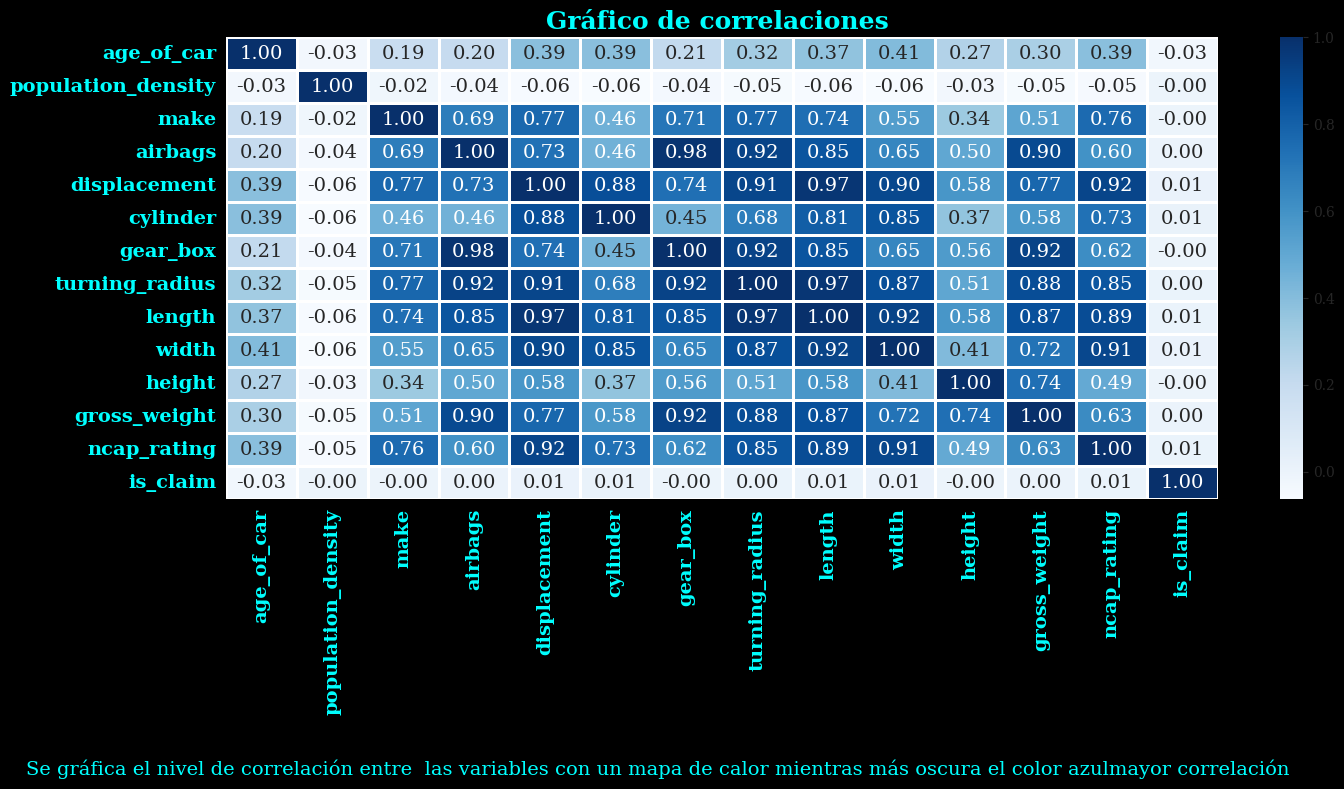

In [ ]:
# Gráfico de correlación
plt.figure(figsize=(16,6), facecolor="black")
plt.rcParams['font.family'] = 'DejaVu Serif'
#Ejes
plt.xticks(fontsize=14, color='cyan',fontweight='bold')
plt.yticks(fontsize=14, color='cyan',fontweight='bold')
#Titulo
plt.title('Gráfico de correlaciones ',
          fontsize = 18, color = 'cyan',fontweight='bold')
#Gráfico
grafica.set_facecolor("black")
sns.heatmap(
    dflg.corr(),
    annot=True,
    fmt=".2f",
    cmap='Blues',
    linewidths=1,
    annot_kws={"size": 14}
    )
#Texto
plt.figtext(0.0, -0.35,
            "Se gráfica el nivel de correlación entre "
            " las variables con un mapa de calor "
            "mientras más oscura el color azul"
            "mayor correlación",
            fontsize=14, color='cyan')
plt.show()

In [ ]:
#Eliminar la columna "is_claim" para hacer el análisis de multicolinealidad
d_VIF = dflg.drop(columns=['is_claim'])

In [ ]:
#Se crea un dataframe vacio
vif_data = pd.DataFrame()
#Columnas variables con los encabezados de d_VIF
vif_data["variables"] = d_VIF.columns
#Calculo del VIF para cada variable
vif_data["VIF"] = [variance_inflation_factor(d_VIF.values, i) for i in range(d_VIF.shape[1])]
#Ordenar de manera ascente el valor de VIF
eliminar=vif_data.sort_values(by='VIF', ascending=True)
eliminar

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


variables       VIF
1   population_density  1.005014
0           age_of_car  1.246017
2                 make       inf
3              airbags       inf
4         displacement       inf
5             cylinder       inf
6             gear_box       inf
7       turning_radius       inf
8               length       inf
9                width       inf
10              height       inf
11        gross_weight       inf
12         ncap_rating       inf

In [ ]:
#Clasificamos las variables según su VIF
vif_mayor_5 = vif_data[vif_data["VIF"] > 5]

In [ ]:
#Variables a eliminiar
var=vif_mayor_5['variables'].tolist()
var

['make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating']

In [ ]:
len(var)

11

In [ ]:
#Eliminar variables
dflogit=dflg.drop(columns=var)

In [ ]:
#Dimension de los datos
dflogit.shape

(47863, 3)

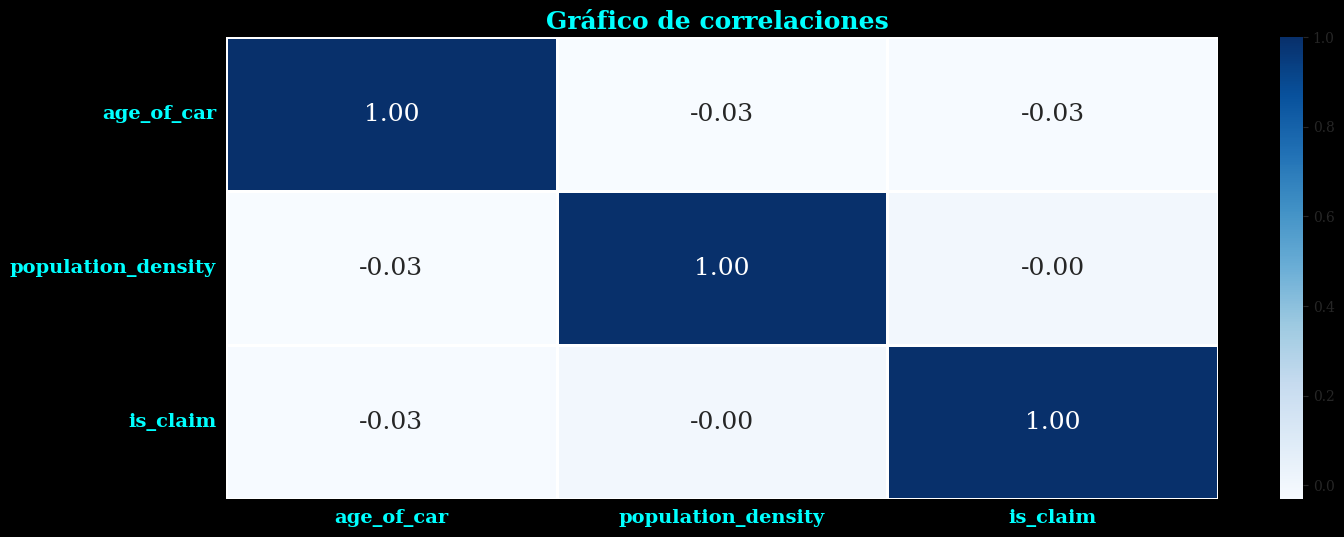

In [ ]:
# Gráfico de correlación
plt.figure(figsize=(16,6), facecolor="black")
plt.rcParams['font.family'] = 'DejaVu Serif'
#Ejes
plt.xticks(fontsize=14, color='cyan',fontweight='bold')
plt.yticks(fontsize=14, color='cyan',fontweight='bold')
#Titulo
plt.title('Gráfico de correlaciones ',
          fontsize = 18, color = 'cyan',fontweight='bold')
#Gráfico
grafica.set_facecolor("black")
sns.heatmap(
    dflogit.corr(),
    annot=True,
    fmt=".2f",
    cmap='Blues',
    linewidths=1,
    annot_kws={"size": 18}
    )
#Texto

plt.show()

In [ ]:
dflogit

age_of_car  population_density  is_claim
0               5                4990         0
1               2               27003         0
2               2                4076         0
3              11               21622         0
5               7               13051         0
...           ...                 ...       ...
58586           7                4076         0
58588           2                7788         0
58589           5               34738         0
58590          14                8794         0
58591           2                8794         0

[47863 rows x 3 columns]

In [ ]:
x_p = dflogit.iloc[:, :-1]
x_p

age_of_car  population_density
0               5                4990
1               2               27003
2               2                4076
3              11               21622
5               7               13051
...           ...                 ...
58586           7                4076
58588           2                7788
58589           5               34738
58590          14                8794
58591           2                8794

[47863 rows x 2 columns]

In [ ]:
y_p = df.loc[:, 'is_claim']

In [ ]:
x_p_train, x_p_test, y_p_train, y_p_test = train_test_split(x_p, y_p, test_size=0.3, random_state=24)

In [ ]:
columns_scale = x_p.columns
columns_scale

Index(['age_of_car', 'population_density'], dtype='object')

In [ ]:
scaler = StandardScaler()

In [ ]:
x_p_train_scaled = scaler.fit_transform(x_p_train[columns_scale])


In [ ]:
x_p_test_scaled = scaler.transform(x_p_test[columns_scale])


In [ ]:
x_p_train[columns_scale] = x_p_train_scaled
x_p_test[columns_scale] = x_p_test_scaled


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring='f1', cv=5)
grid.fit(x_p_train, y_p_train)

print(grid.best_params_)


{'C': 0.01, 'class_weight': 'balanced'}


In [ ]:
m_p= LogisticRegression(penalty='l2', C=1, class_weight='balanced', random_state=42)
m_p.fit(x_p_train, y_p_train)

LogisticRegression(C=1, class_weight='balanced', random_state=42)

In [ ]:
p_p = m_p.predict(x_p_test)

In [ ]:
y_p_1=m_p.predict_proba(x_p_test)[:,1]

In [ ]:
# Probar un nuevo umbral
umbral = 0.6  # Puedes probar con 0.4, 0.6, 0.7, etc.
p_p_custom = (y_p_1 >= umbral).astype(int)

In [ ]:
accuracy_score(y_p_test, p_p_custom)

0.9350233303154816

In [ ]:
print(classification_report(y_p_test,p_p_custom))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13426
           1       0.00      0.00      0.00       933

    accuracy                           0.94     14359
   macro avg       0.47      0.50      0.48     14359
weighted avg       0.87      0.94      0.90     14359



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


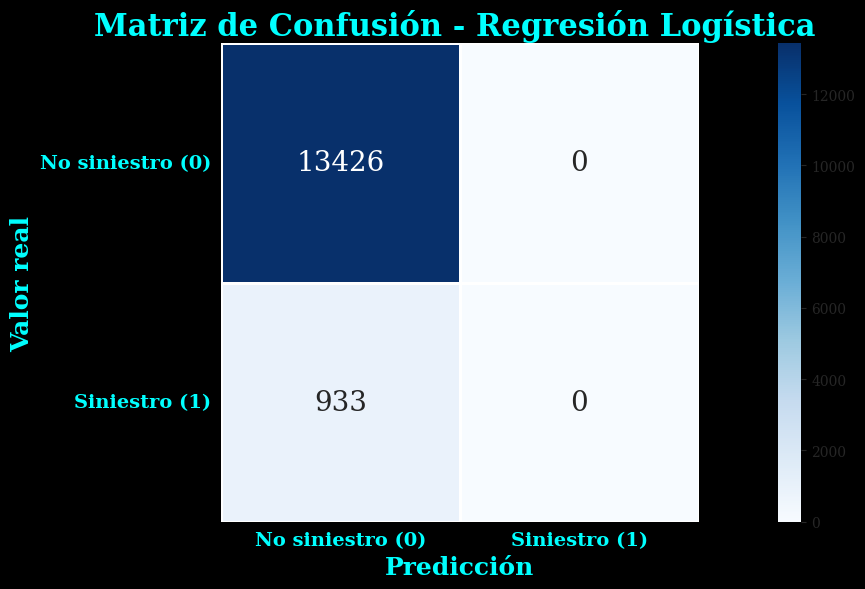

In [ ]:
# Calcular matriz de confusión
cm = confusion_matrix(y_p_test,p_p_custom)

# Crear el heatmap con mejor formato
plt.figure(figsize=(16,6), facecolor="black")
plt.rcParams['font.family'] = 'DejaVu Serif'
#Matriz de confusión
sns.heatmap(
    cm,
    annot=True,
    fmt="g",
    cmap='Blues',
    linewidths=1,
    linecolor='white',
    square=True,
    annot_kws={"size": 20}
    )

#Ejes
plt.xticks(fontsize=14, color='cyan',fontweight='bold')
plt.yticks(fontsize=14, color='cyan',fontweight='bold')

plt.xticks([0.5, 1.5], ['No siniestro (0)', 'Siniestro (1)'])
plt.yticks([0.5, 1.5], ['No siniestro (0)', 'Siniestro (1)'], rotation=0)
#Titulo
plt.title('Matriz de Confusión - Regresión Logística ',
          fontsize = 22, color = 'cyan',fontweight='bold')

plt.xlabel('Predicción', fontsize=18,
           color='cyan',fontweight='bold')
plt.ylabel('Valor real', fontsize=18,
           color='cyan',fontweight='bold')

#Mostrar gráfico
plt.tight_layout()
plt.show()

*prueba e intentos de mejorar el modelo de regresion logistico*

In [ ]:
x= dflogit.drop('is_claim', axis=1)
y= dflogit['is_claim']

In [ ]:
x_entrenar, x_test, y_entrenar, y_test = train_test_split(x, y, test_size=0.3, random_state=24)

In [ ]:
modelo= LogisticRegression()
modelo.fit(x_entrenar, y_entrenar)

LogisticRegression()

In [ ]:
predicciones = modelo.predict(x_test)

In [ ]:
confusion_matrix(y_test, predicciones)

array([[13426,     0],
       [  933,     0]])

In [ ]:
accuracy_score(y_test, predicciones)

0.9350233303154816

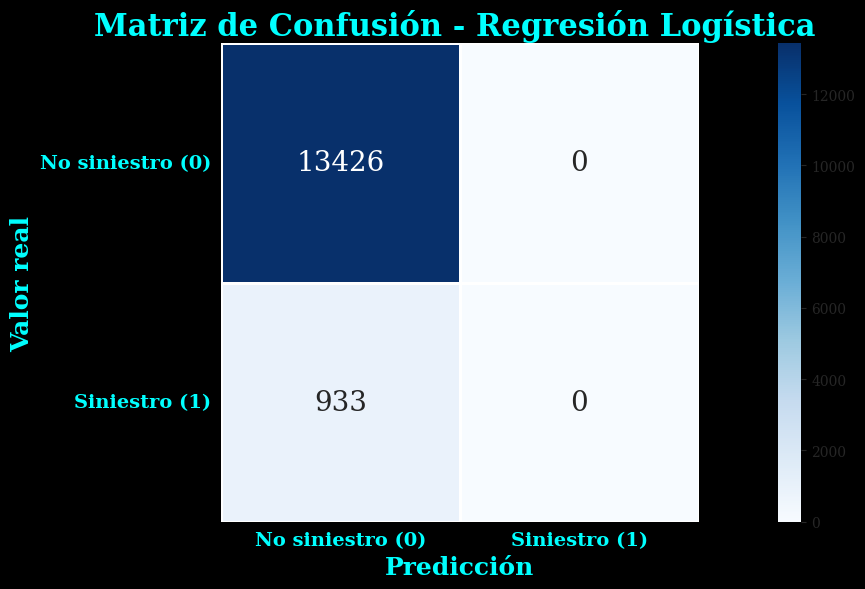

In [ ]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test,predicciones)

# Crear el heatmap con mejor formato
plt.figure(figsize=(16,6), facecolor="black")
plt.rcParams['font.family'] = 'DejaVu Serif'
#Matriz de confusión
sns.heatmap(
    cm,
    annot=True,
    fmt="g",
    cmap='Blues',
    linewidths=1,
    linecolor='white',
    square=True,
    annot_kws={"size": 20}
    )

#Ejes
plt.xticks(fontsize=14, color='cyan',fontweight='bold')
plt.yticks(fontsize=14, color='cyan',fontweight='bold')

plt.xticks([0.5, 1.5], ['No siniestro (0)', 'Siniestro (1)'])
plt.yticks([0.5, 1.5], ['No siniestro (0)', 'Siniestro (1)'], rotation=0)
#Titulo
plt.title('Matriz de Confusión - Regresión Logística ',
          fontsize = 22, color = 'cyan',fontweight='bold')

plt.xlabel('Predicción', fontsize=18,
           color='cyan',fontweight='bold')
plt.ylabel('Valor real', fontsize=18,
           color='cyan',fontweight='bold')

#Mostrar gráfico
plt.tight_layout()
plt.show()

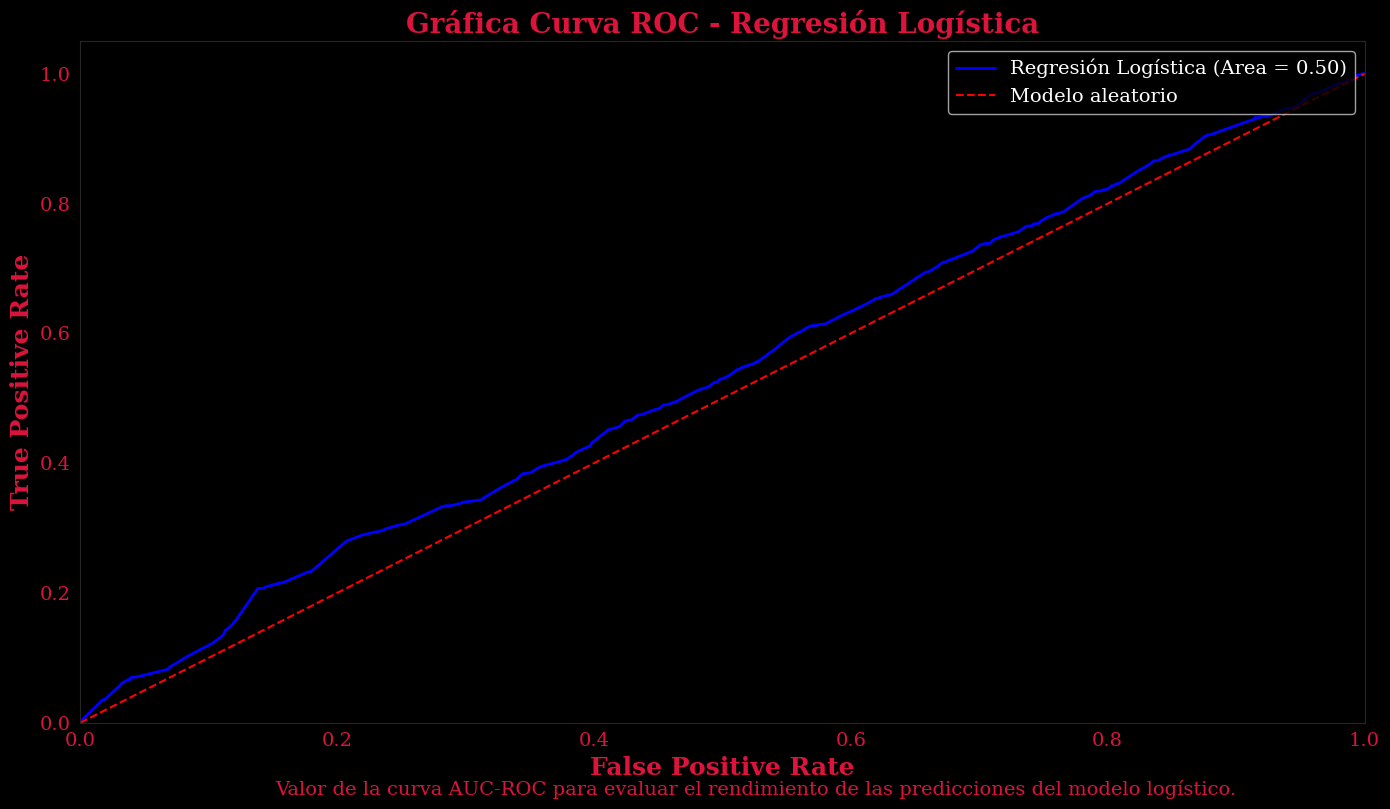

In [ ]:
#Area bajo la curva
logit_roc_auc = roc_auc_score(y_test, predicciones)

#Cálculo de FPR (False Positive Rate) y TPR (True Positive Rate)
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, modelo.predict_proba(x_test)[:,1])

# Gráfica con fondo negro completo
fig, ax = plt.subplots(figsize=(14, 8), facecolor='black')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Fondo del área de la gráfica también negro
ax.set_facecolor('black')

# Curva ROC
ax.plot(fpr_lr, tpr_lr,
        color='blue', linewidth=2,
        linestyle='solid',
         label='Regresión Logística (Area = %0.2f)' % logit_roc_auc)

# Línea base aleatoria
ax.plot([0, 1], [0, 1], 'r--', label='Modelo aleatorio')

# Límites de los ejes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# Leyenda con estilo
ax.legend(loc="upper right", fontsize=14,
          facecolor='black', labelcolor='white')

# Título y etiquetas con color crimson (rojito elegante)
ax.set_title('Gráfica Curva ROC - Regresión Logística',
             fontsize=20, color='crimson', fontweight='bold')
ax.set_xlabel('False Positive Rate', fontsize=18,
              color='crimson', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=18,
              color='crimson', fontweight='bold')

# Ejes
ax.tick_params(axis='x', colors='crimson', labelsize=14)
ax.tick_params(axis='y', colors='crimson', labelsize=14)

# Texto interpretativo debajo
fig.text(0.2, 0.0,
         "Valor de la curva AUC-ROC para evaluar "
         "el rendimiento de las predicciones del modelo logístico.",
         fontsize=14, color='crimson')
#Mostrar gráfico
plt.tight_layout()
plt.show()

---
# **Modelo de regresión logística** 🧠
---

---
## **Oversampling**📈
---

In [ ]:
x = dflogit.loc[:, dflogit.columns != "is_claim"]
y = dflogit["is_claim"]

os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
columns = x_train.columns

In [ ]:
os_data_x, os_data_y = os.fit_resample(x_train, y_train)
os_data_x = pd.DataFrame(data = os_data_x, columns = columns)
os_data_y = pd.DataFrame(data = os_data_y, columns = ["is_claim"])

In [ ]:
os_data_x.shape

(71552, 2)

<ipython-input-97-d0628ed9d96e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafica=sns.countplot(x='is_claim',data=os_data_y,palette=colors,edgecolor='white')


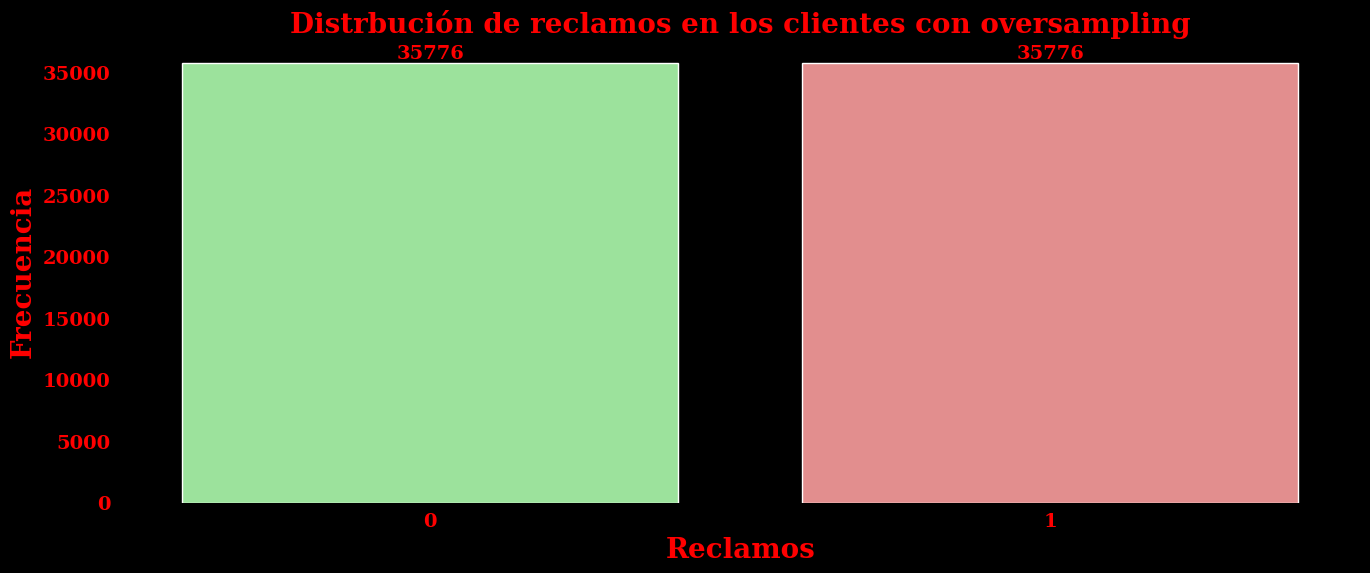

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16,6), facecolor="black")
#Tipo de letra
plt.rcParams['font.family'] = 'DejaVu Serif'
#Revisamos la proporción de reclamos
#x-->Variable a graficar
#data-->Dattos
#color-->Color de las barras
#edgecolor-->Color del borde de las barras
# Creamos una paleta de colores
colors = ['lightgreen', 'lightcoral']
#Width-->Grosor de barras
grafica=sns.countplot(x='is_claim',data=os_data_y,palette=colors,edgecolor='white')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Reclamos',fontsize = 20,
           color = 'red',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Frecuencia',fontsize = 20,
           color = 'red',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='red',fontweight='bold')
plt.yticks(fontsize=14, color='red',fontweight='bold')
#Agregar el titulo con tamaño y color personalizados
#fontweight='bold'-->Negritas
plt.title('Distrbución de reclamos en los clientes con oversampling',
          fontsize = 20,
          color = 'red',fontweight='bold')
#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=14,
                      color='red',fontweight='bold')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")
# Eliminar bordes de la gráfica
#Borde superior
plt.gca().spines['top'].set_visible(False)
#Borde derecho
plt.gca().spines['right'].set_visible(False)
#Borde izquierdo
plt.gca().spines['left'].set_visible(False)
#Borde inferior
plt.gca().spines['bottom'].set_visible(False)
# Mostrar el gráfico
plt.show()

In [ ]:
dflogit = dflogit.columns.values.tolist()
y = ["is_claim"]
x = [i for i in dflogit if i not in y]
print(y, x)

['is_claim'] ['age_of_car', 'population_density']


In [ ]:
x = os_data_x
y = os_data_y

---
## **Entrenamiento del modelo** 💪
---

In [ ]:
x_m = sm.add_constant(x)

In [ ]:
x_m.corr()

const  age_of_car  population_density
const                 NaN         NaN                 NaN
age_of_car            NaN    1.000000           -0.033694
population_density    NaN   -0.033694            1.000000

In [ ]:
log_reg = sm.Logit(y, x_m).fit()

Optimization terminated successfully.
         Current function value: 0.691343
         Iterations 3


In [ ]:
print(log_reg.summary2())

                          Results: Logit
Model:                Logit            Method:           MLE       
Dependent Variable:   is_claim         Pseudo R-squared: 0.003     
Date:                 2025-06-08 01:13 AIC:              98939.9646
No. Observations:     71552            BIC:              98967.4992
Df Model:             2                Log-Likelihood:   -49467.   
Df Residuals:         71549            LL-Null:          -49596.   
Converged:            1.0000           LLR p-value:      8.6937e-57
No. Iterations:       3.0000           Scale:            1.0000    
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               0.1587   0.0153  10.3717 0.0000  0.1287  0.1887
age_of_car         -0.0233   0.0015 -15.9278 0.0000 -0.0261 -0.0204
population_density -0.0000   0.0000  -2.3920 0.0168 -0.0000 -0.0000



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train

age_of_car  population_density
46230           3               27003
34746           2                7788
34918           6                4076
40028           0                7788
794             6                8794
...           ...                 ...
21243          14                5410
45891           1                 290
42613           3               34738
43567           1                4076
68268           2                8794

[57241 rows x 2 columns]

In [ ]:
x_train.shape

(57241, 2)

In [ ]:
x_test

age_of_car  population_density
53832           0                4990
60542           1                8794
12980           8               27742
17532           5                4076
29393           1                3264
...           ...                 ...
26406           5                8794
37670           5               34738
28270           3                5410
181             9                5410
18676          14                8794

[14311 rows x 2 columns]

In [ ]:
x_test.shape

(14311, 2)

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
predicciones = model.predict(x_test)
predicciones

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
model.predict_proba(x_test)[:,1]

array([0.53482032, 0.52778797, 0.48124648, ..., 0.51775656, 0.48385502,
       0.45446147])

In [ ]:
predicciones.shape

(14311,)

In [ ]:
y_test.shape

(14311, 1)

---
## **Métricas del modelo** ♾️
---

In [ ]:
#Impirmir resultados
print("Accuracy:", accuracy_score(y_test, predicciones))
print("Reporte de Clasificación Modelo Random Forest:")
print(classification_report(y_test, predicciones))

Accuracy: 0.5134511913912375
Reporte de Clasificación Modelo Random Forest:
              precision    recall  f1-score   support

           0       0.51      0.45      0.48      7062
           1       0.52      0.58      0.55      7249

    accuracy                           0.51     14311
   macro avg       0.51      0.51      0.51     14311
weighted avg       0.51      0.51      0.51     14311



---
## **Matriz de confusión**🕵️
---

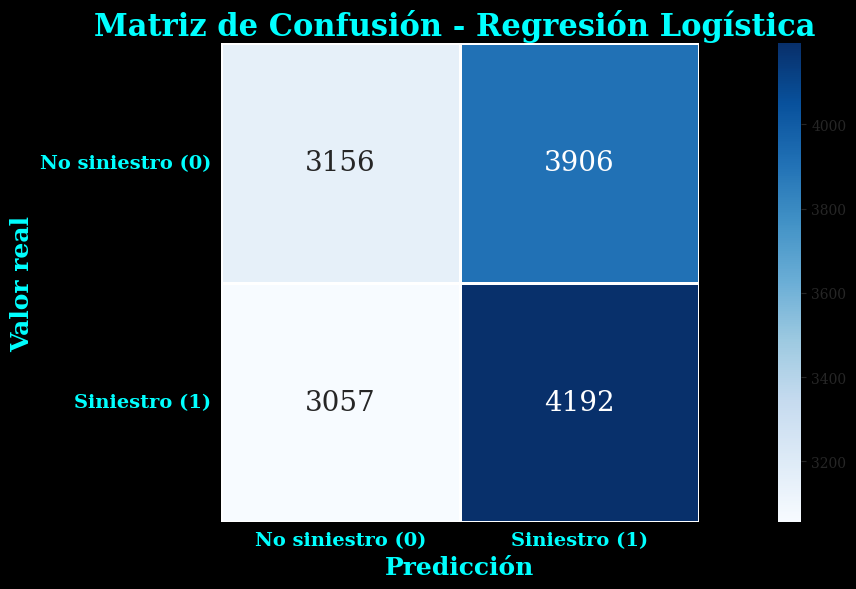

In [ ]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test,predicciones)

# Crear el heatmap con mejor formato
plt.figure(figsize=(16,6), facecolor="black")
plt.rcParams['font.family'] = 'DejaVu Serif'
#Matriz de confusión
sns.heatmap(
    cm,
    annot=True,
    fmt="g",
    cmap='Blues',
    linewidths=1,
    linecolor='white',
    square=True,
    annot_kws={"size": 20}
    )

#Ejes
plt.xticks(fontsize=14, color='cyan',fontweight='bold')
plt.yticks(fontsize=14, color='cyan',fontweight='bold')

plt.xticks([0.5, 1.5], ['No siniestro (0)', 'Siniestro (1)'])
plt.yticks([0.5, 1.5], ['No siniestro (0)', 'Siniestro (1)'], rotation=0)
#Titulo
plt.title('Matriz de Confusión - Regresión Logística ',
          fontsize = 22, color = 'cyan',fontweight='bold')

plt.xlabel('Predicción', fontsize=18,
           color='cyan',fontweight='bold')
plt.ylabel('Valor real', fontsize=18,
           color='cyan',fontweight='bold')

#Mostrar gráfico
plt.tight_layout()
plt.show()

---
## **Curva ROC**📊
---

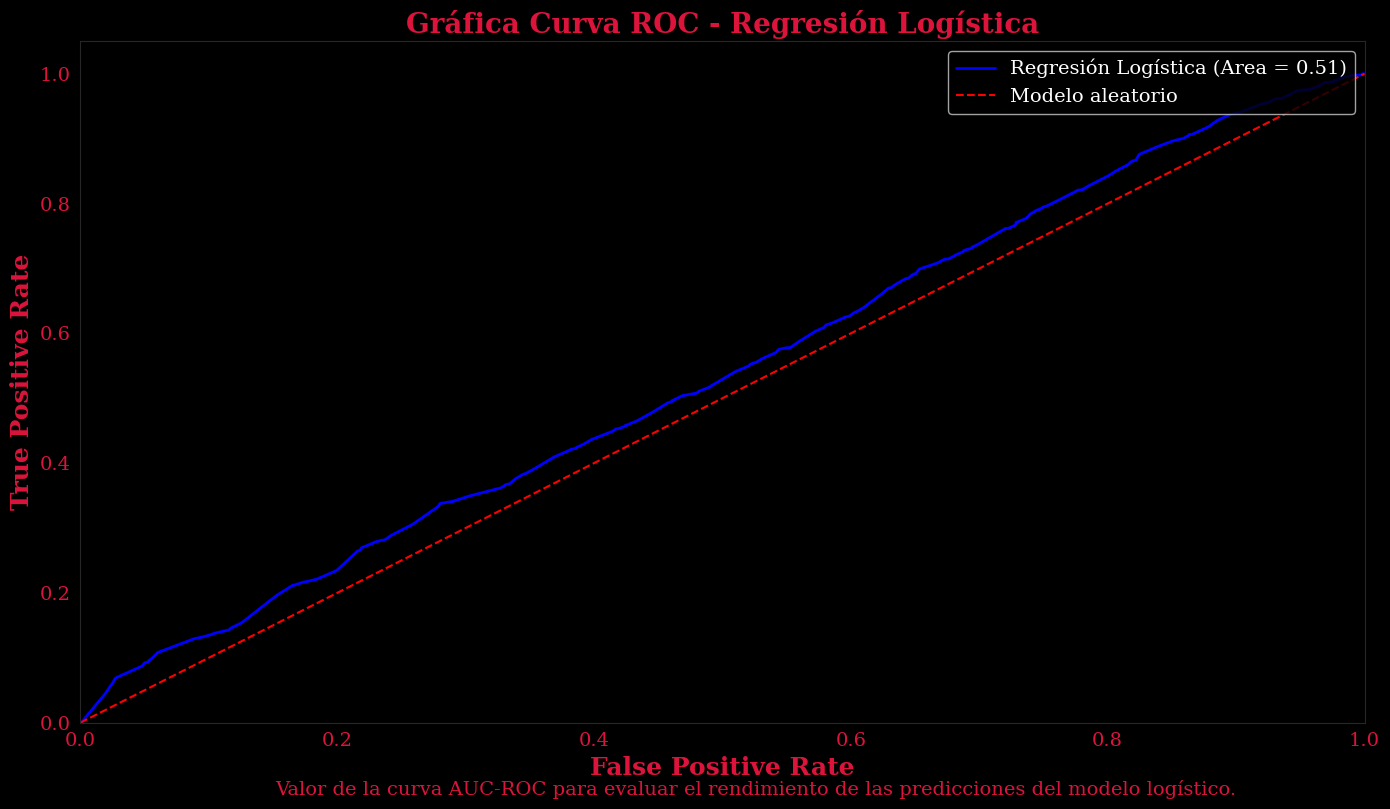

In [ ]:
#Area bajo la curva
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))

#Cálculo de FPR (False Positive Rate) y TPR (True Positive Rate)
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

# Gráfica con fondo negro completo
fig, ax = plt.subplots(figsize=(14, 8), facecolor='black')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Fondo del área de la gráfica también negro
ax.set_facecolor('black')

# Curva ROC
ax.plot(fpr_lr, tpr_lr,
        color='blue', linewidth=2,
        linestyle='solid',
         label='Regresión Logística (Area = %0.2f)' % logit_roc_auc)

# Línea base aleatoria
ax.plot([0, 1], [0, 1], 'r--', label='Modelo aleatorio')

# Límites de los ejes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# Leyenda con estilo
ax.legend(loc="upper right", fontsize=14,
          facecolor='black', labelcolor='white')

# Título y etiquetas con color crimson (rojito elegante)
ax.set_title('Gráfica Curva ROC - Regresión Logística',
             fontsize=20, color='crimson', fontweight='bold')
ax.set_xlabel('False Positive Rate', fontsize=18,
              color='crimson', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=18,
              color='crimson', fontweight='bold')

# Ejes
ax.tick_params(axis='x', colors='crimson', labelsize=14)
ax.tick_params(axis='y', colors='crimson', labelsize=14)

# Texto interpretativo debajo
fig.text(0.2, 0.0,
         "Valor de la curva AUC-ROC para evaluar "
         "el rendimiento de las predicciones del modelo logístico.",
         fontsize=14, color='crimson')
#Mostrar gráfico
plt.tight_layout()
plt.show()


---
# **Random Forest Classifier** 🌲
---

---
## **Oversampling** 📈
---

In [ ]:
x = dml.loc[:, dml.columns != "is_claim"]
y = dml["is_claim"]

os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
columns = x_train.columns

In [ ]:
os_data_x, os_data_y = os.fit_resample(x_train, y_train)
os_data_x = pd.DataFrame(data = os_data_x, columns = columns)
os_data_y = pd.DataFrame(data = os_data_y, columns = ["is_claim"])

In [ ]:
os_data_x.shape

(71552, 85)

<ipython-input-120-d0628ed9d96e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafica=sns.countplot(x='is_claim',data=os_data_y,palette=colors,edgecolor='white')


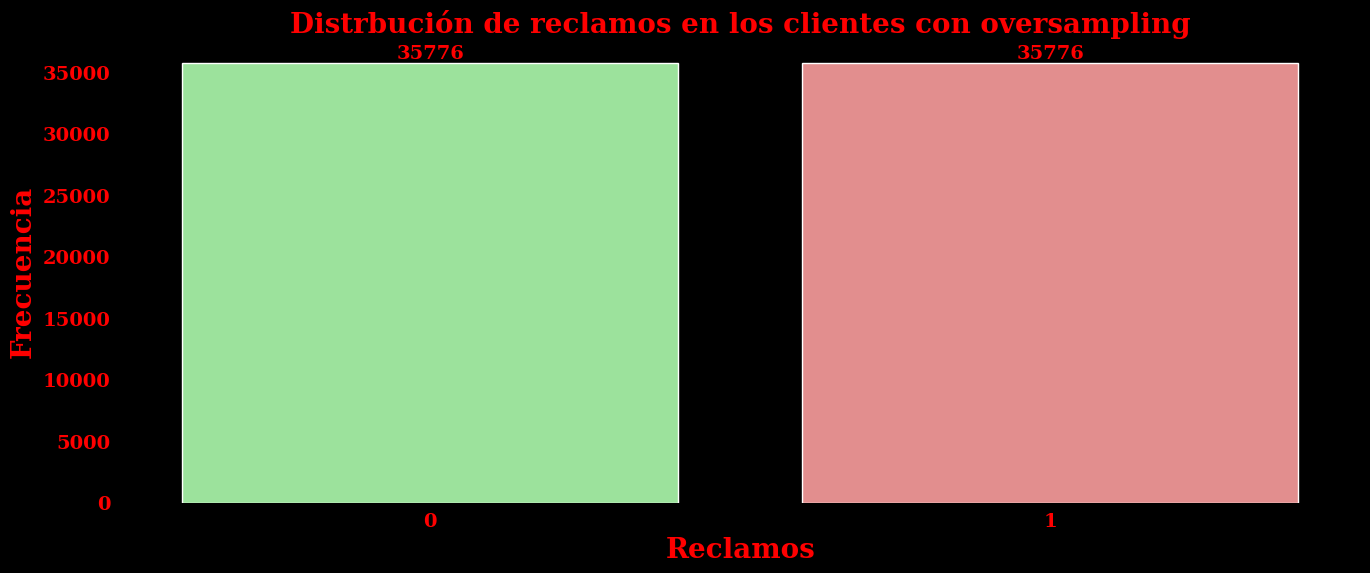

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16,6), facecolor="black")
#Tipo de letra
plt.rcParams['font.family'] = 'DejaVu Serif'
#Revisamos la proporción de reclamos
#x-->Variable a graficar
#data-->Dattos
#color-->Color de las barras
#edgecolor-->Color del borde de las barras
# Creamos una paleta de colores
colors = ['lightgreen', 'lightcoral']
#Width-->Grosor de barras
grafica=sns.countplot(x='is_claim',data=os_data_y,palette=colors,edgecolor='white')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Reclamos',fontsize = 20,
           color = 'red',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Frecuencia',fontsize = 20,
           color = 'red',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='red',fontweight='bold')
plt.yticks(fontsize=14, color='red',fontweight='bold')
#Agregar el titulo con tamaño y color personalizados
#fontweight='bold'-->Negritas
plt.title('Distrbución de reclamos en los clientes con oversampling',
          fontsize = 20,
          color = 'red',fontweight='bold')
#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=14,
                      color='red',fontweight='bold')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")
# Eliminar bordes de la gráfica
#Borde superior
plt.gca().spines['top'].set_visible(False)
#Borde derecho
plt.gca().spines['right'].set_visible(False)
#Borde izquierdo
plt.gca().spines['left'].set_visible(False)
#Borde inferior
plt.gca().spines['bottom'].set_visible(False)
# Mostrar el gráfico
plt.show()

In [ ]:
dml = dml.columns.values.tolist()
y = ["is_claim"]
x = [i for i in dml if i not in y]

In [ ]:
print(y, x)

['is_claim'] ['age_of_car', 'population_density', 'make', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_camera', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'area_cluster_C11', 'area_cluster_C12', 'area_cluster_C13', 'area_cluster_C14', 'area_cluster_C15', 'area_cluster_C16', 'area_cluster_C18', 'area_cluster_C19', 'area_cluster_C2', 'area_cluster_C20', 'area_cluster_C21', 'area_cluster_C22', 'area_cluster_C3', 'area_cluster_C4', 'area_cluster_C5', 'area_cluster_C6', 'area_cluster_C7', 'area_cluster_C8', 'area_cluster_C9', 'segment_B1', 'segment_B2', 'segment_C1', 'segment_C2', 'segment_Utility', 'model_M10', 'mod

In [ ]:
x = os_data_x
y = os_data_y

In [ ]:
x.head()

age_of_car  population_density  make  airbags  is_esc  \
0           4                6112     1        2       0   
1           5                7788     5        2       0   
2           8               27003     3        6       1   
3           2               27003     3        6       1   
4           1                4076     1        2       0   

   is_adjustable_steering  is_tpms  is_parking_camera  displacement  cylinder  \
0                       0        0                  0           796         3   
1                       1        0                  1          1498         4   
2                       1        1                  1          1493         4   
3                       1        1                  1          1493         4   
4                       0        0                  0           796         3   

   gear_box  turning_radius  length  width  height  gross_weight  \
0         5              46    3445   1515    1475          1185   
1         5              49    3995   1695    1501          1051   
2         6              52    4300   1790    1635          1720   
3         6              52    4300   1790    1635          1720   
4         5              46    3445   1515    1475          1185   

   is_front_fog_lights  is_rear_window_wiper  is_rear_window_washer  \
0                    0                     0                      0   
1                    1                     0                      0   
2                    1                     1                      1   
3                    1                     1                      1   
4                    0                     0                      0   

   is_rear_window_defogger  is_brake_assist  is_power_door_locks  \
0                        0                0                    0   
1                        1                0                    1   
2                        1                1                    1   
3                        1                1                    1   
4                        0                0                    0   

   is_central_locking  is_power_steering  is_driver_seat_height_adjustable  \
0                   0                  1                                 0   
1                   1                  1                                 1   
2                   1                  1                                 1   
3                   1                  1                                 1   
4                   0                  1                                 0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1            0   
1                              1       1               1            4   
2                              0       1               1            3   
3                              0       1               1            3   
4                              0       0               1            0   

   area_cluster_C11  area_cluster_C12  area_cluster_C13  area_cluster_C14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 1   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   area_cluster_C15  area_cluster_C16  area_cluster_C18  area_cluster_C19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   area_cluster_C2  area_cluster_C20  area_cluster_C21  area_cluster_C22  \


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
x_train.shape

(50086, 85)

In [ ]:
x_test.shape

(21466, 85)

In [ ]:
y_test.shape

(21466, 1)

---
## **Entrenamiento del modelo** 💪
---

In [ ]:
#Modelo Bosques Aleatorios
rfc = RandomForestClassifier(random_state=0)

#Entrenar modelo
rfc.fit(x_train, y_train)

#Predicciones
yrfc_pred = rfc.predict(x_test)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


---
## **Métricas del modelo** ♾️
---

In [ ]:
#Impirmir resultados
print("Accuracy:", accuracy_score(y_test, yrfc_pred))
print("Reporte de Clasificación Modelo Random Forest:")
print(classification_report(y_test, yrfc_pred))

Accuracy: 0.6484673437063263
Reporte de Clasificación Modelo Random Forest:
              precision    recall  f1-score   support

           0       0.65      0.61      0.63     10613
           1       0.64      0.68      0.66     10853

    accuracy                           0.65     21466
   macro avg       0.65      0.65      0.65     21466
weighted avg       0.65      0.65      0.65     21466



---
## **Matriz de confusión**🕵️
---

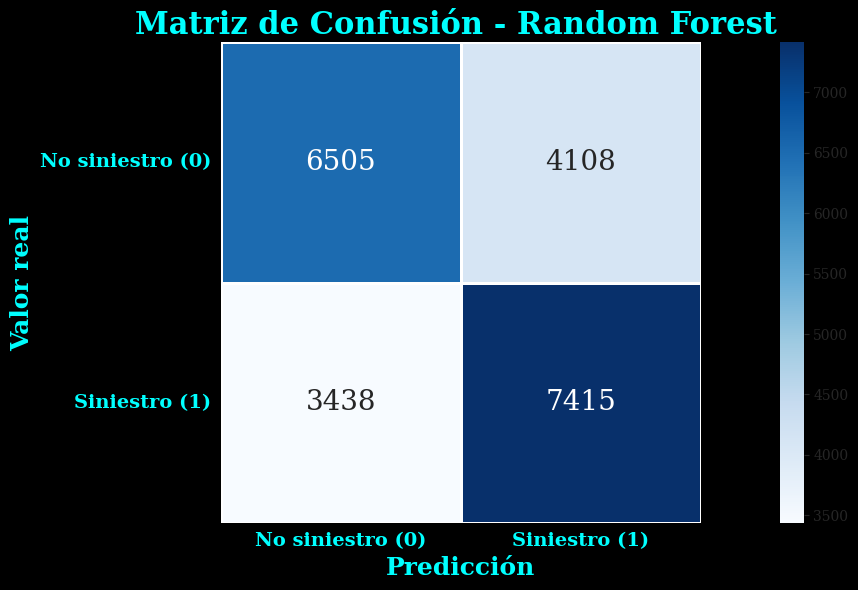

In [ ]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, yrfc_pred)

# Crear el heatmap con mejor formato
plt.figure(figsize=(16,6), facecolor="black")
plt.rcParams['font.family'] = 'DejaVu Serif'
#Matriz de confusión
sns.heatmap(
    cm,
    annot=True,
    fmt="g",
    cmap='Blues',
    linewidths=1,
    linecolor='white',
    square=True,
    annot_kws={"size": 20}
    )

#Ejes
plt.xticks(fontsize=14, color='cyan',fontweight='bold')
plt.yticks(fontsize=14, color='cyan',fontweight='bold')

plt.xticks([0.5, 1.5], ['No siniestro (0)', 'Siniestro (1)'])
plt.yticks([0.5, 1.5], ['No siniestro (0)', 'Siniestro (1)'], rotation=0)
#Titulo
plt.title('Matriz de Confusión - Random Forest ',
          fontsize = 22, color = 'cyan',fontweight='bold')

plt.xlabel('Predicción', fontsize=18,
           color='cyan',fontweight='bold')
plt.ylabel('Valor real', fontsize=18,
           color='cyan',fontweight='bold')

#Mostrar gráfico
plt.tight_layout()
plt.show()

---
## **Curva ROC**📊
---

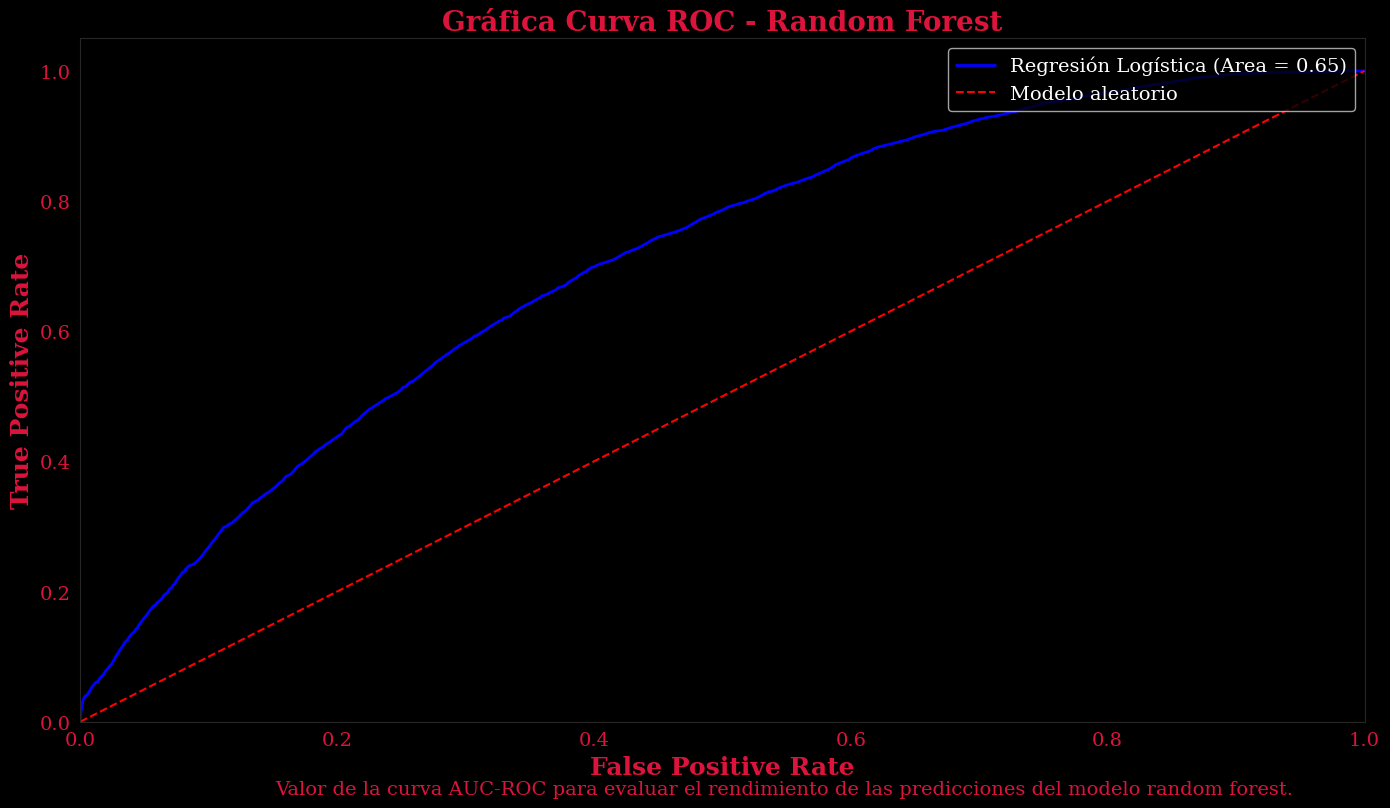

In [ ]:
#Area bajo la curva
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(x_test))

#Cálculo de FPR (False Positive Rate) y TPR (True Positive Rate)
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:,1])

# Gráfica con fondo negro completo
fig, ax = plt.subplots(figsize=(14, 8), facecolor='black')
plt.rcParams['font.family'] = 'DejaVu Serif'

# Fondo del área de la gráfica también negro
ax.set_facecolor('black')

# Curva ROC
ax.plot(fpr_rfc, tpr_rfc,
        color='blue', linewidth=2,
        linestyle='solid',
         label='Regresión Logística (Area = %0.2f)' % rfc_roc_auc)

# Línea base aleatoria
ax.plot([0, 1], [0, 1], 'r--', label='Modelo aleatorio')

# Límites de los ejes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# Leyenda con estilo
ax.legend(loc="upper right", fontsize=14,
          facecolor='black', labelcolor='white')

# Título y etiquetas con color crimson (rojito elegante)
ax.set_title('Gráfica Curva ROC - Random Forest',
             fontsize=20, color='crimson', fontweight='bold')
ax.set_xlabel('False Positive Rate', fontsize=18,
              color='crimson', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=18,
              color='crimson', fontweight='bold')

# Ejes
ax.tick_params(axis='x', colors='crimson', labelsize=14)
ax.tick_params(axis='y', colors='crimson', labelsize=14)

# Texto interpretativo debajo
fig.text(0.2, 0.0,
         "Valor de la curva AUC-ROC para evaluar "
         "el rendimiento de las predicciones "
         "del modelo random forest.",
         fontsize=14, color='crimson')
#Mostrar gráfico
plt.tight_layout()
plt.show()


---
# **Conclusiones**📌
---

Las métricas del modelo (precisión: 0.55, recall: 0.59, F1-score: 0.54) y valor de la curva ROC (0.56) implican que el desempeño del modelo es aceptable pero mejorable. El modelo de regresión no es óptimo para este tipo de datos debido al exceso de variables categóricas como el tipo de combustible, clúster de la ciudad, tipo de motor, etc. además de asumir relaciones lineales que no necesariamente se cumplen en un contexto tan complejo

El modelo random forest classifier con métricas cercanas a 0.95 para precisión, recall, F1-score y ROC a pesar de eso tiene ciertas desventajas tiene menor interpretabilidad, es un modelo más lento, no extrapola los datos de manera tan precisa y es propenso a tener sobreajustes

En resumen, se creó un modelo de regresión logística y machine learning (random forest classifier) para predecir la probabilidad que tiene un auto de sufrir un siniestro donde se identificó como variables más relevantes a la edad del carro, ncap rating, densidad de población y el modelo del auto, finalmente acorde los resultados obtenidos, las métricas los modelos de machine learning como random forest classifier tienen mayor confiabilidad que los de regresión logística.

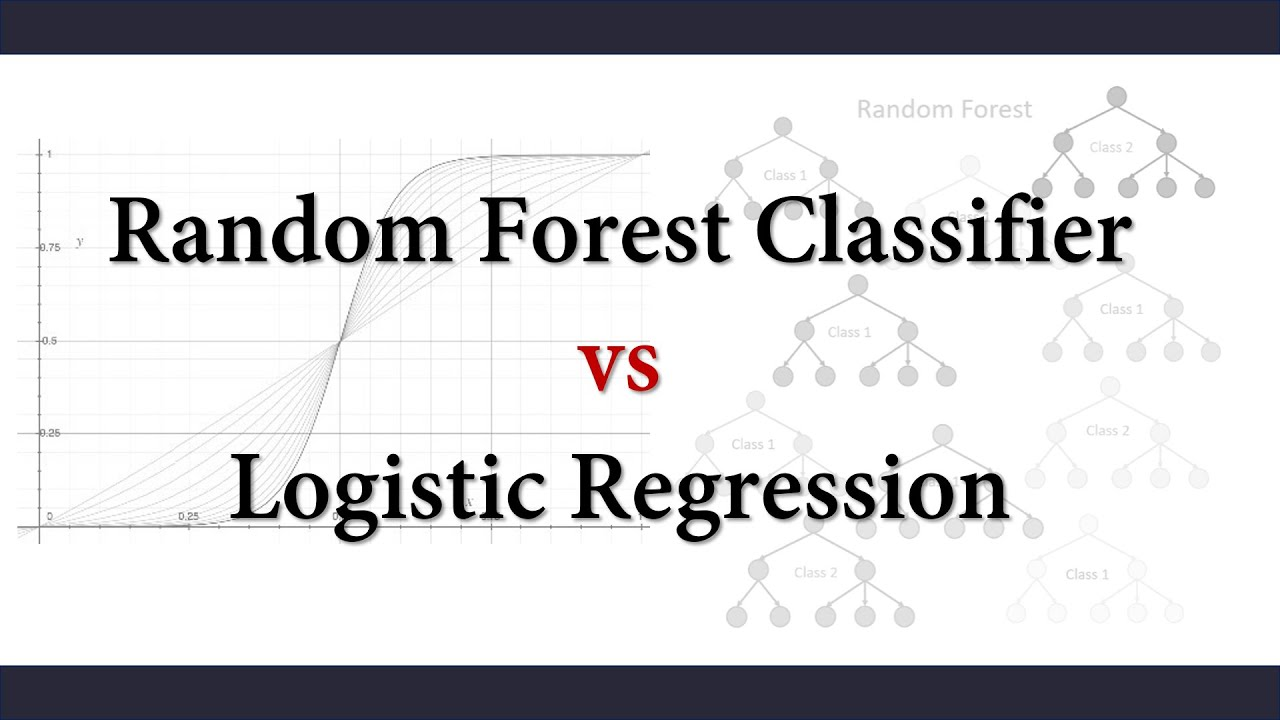

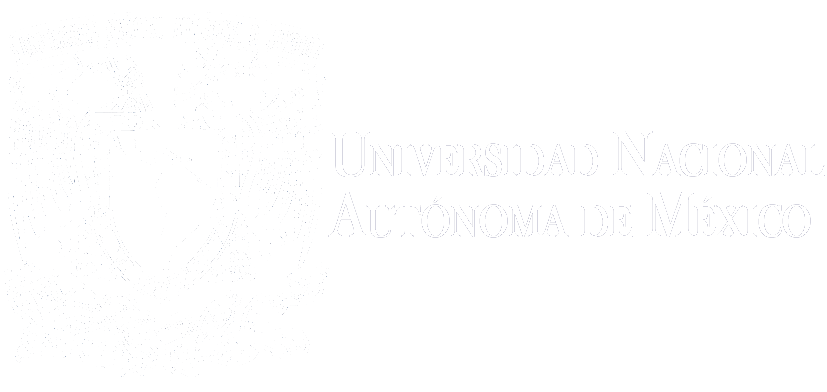

Codigo elaborado por Morales Francisco [LinkedIn](https://www.linkedin.com/in/francisco-morales-actuario/)